### Data Visualization with Index Variables and Location Limitations

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/home/aveb7tacoma/engr697/data/wildfire_weather_clean_indexes3.csv")

# Display basic info about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (123, 23)

First few rows:


,Date,Max_Temp_F,Avg_Temp_F,Min_Temp_F,Max_Humidity_,Avg_Humidity_,Min_Humidity_,Max_Wind_Speed_mph,Avg_Wind_Speed_mph,Min_Wind_Speed_mph,...,PM25_ugm3,CO2_ppm,yn,City,Climate,NOx_ppb,dryness_index,dispersion_ratio,PressureAnomaly1,pm2.5 difference
0,10/1/2017,85,67.0,51,68,39.7,16,12,7.2,0,...,4.8,0.3,0,Santa Rosa,BSk,8.6,40.4,98.6,-0.2,0.0
1,10/2/2017,81,66.4,55,59,31.5,9,16,9.3,5,...,7.2,0.3,0,Santa Rosa,BSk,14.4,45.5,114.9,-0.3,-2.4
2,10/3/2017,82,61.1,41,86,44.7,11,15,5.0,0,...,5.7,0.3,0,Santa Rosa,BSk,16.6,33.8,167.6,-0.2,1.5
3,10/4/2017,80,58.4,40,85,50.8,15,8,2.8,0,...,5.2,0.3,0,Santa Rosa,BSk,15.7,28.7,269.0,0.0,0.5
4,10/5/2017,84,59.4,40,89,51.3,12,12,2.3,0,...,4.4,0.4,0,Santa Rosa,BSk,14.8,28.9,275.0,-0.1,0.8


In [161]:
# Clean up column names and separate data by locations
# First, let's clean up the column names to remove weird symbols and units
column_mapping = {
    'Date': 'Date',
    'Max_Temp_F': 'Max_Temp_F',
    'Avg_Temp_F': 'Avg_Temp_F', 
    'Min_Temp_F': 'Min_Temp_F',
    'Max_Humidity_': 'Max_Humidity_Percent',
    'Avg_Humidity_': 'Avg_Humidity_Percent',
    'Min_Humidity_': 'Min_Humidity_Percent',
    'Max_Wind_Speed_mph': 'Max_Wind_Speed_mph',
    'Avg_Wind_Speed_mph': 'Avg_Wind_Speed_mph',
    'Min_Wind_Speed_mph': 'Min_Wind_Speed_mph',
    'Max_Pressure_in': 'Max_Pressure_in',
    'Avg_Pressure_in': 'Avg_Pressure_in',
    'Min_Pressure_in': 'Min_Pressure_in',
    'City': 'City',
    'Climate': 'Climate',
    'PM25_ugm3': 'PM25_ug_m3',
    'CO2_ppm': 'CO2_ppm',
    'NOx_ppb': 'NOx_ppb',
    'Station': 'Station',
    'yn': 'Wildfire_Event',
    'dryness_index': 'dryness_index',
    'dispersion_ratio': 'dispersion_ratio',
    'PressureAnomaly1': 'PressureAnomaly1',
    'pm2.5 difference': 'pm25_difference'
}

# Apply the column mapping
df_clean = df.rename(columns=column_mapping)

print("Cleaned column names:")
print(df_clean.columns.tolist())


Cleaned column names:
['Date', 'Max_Temp_F', 'Avg_Temp_F', 'Min_Temp_F', 'Max_Humidity_Percent', 'Avg_Humidity_Percent', 'Min_Humidity_Percent', 'Max_Wind_Speed_mph', 'Avg_Wind_Speed_mph', 'Min_Wind_Speed_mph', 'Max_Pressure_in', 'Avg_Pressure_in', 'Min_Pressure_in', 'PM25_ug_m3', 'CO2_ppm', 'Wildfire_Event', 'City', 'Climate', 'NOx_ppb', 'dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']


In [162]:
# Explore unique locations in the dataset
print("Unique locations in the dataset:")
print(df_clean['City'].value_counts())
print(f"\nTotal unique locations: {df_clean['City'].nunique()}")

# Check for any missing values in the City column
print(f"Missing values in City column: {df_clean['City'].isnull().sum()}")


Unique locations in the dataset:
City
Santa Rosa        31
Palisades/LA      31
Dixie             31
Paradise/Butte    30
Name: count, dtype: int64

Total unique locations: 4
Missing values in City column: 0


In [163]:
# Separate data by location categories
location_data = {}

# Get unique locations
unique_locations = df_clean['City'].unique()

for location in unique_locations:
    if pd.notna(location):  # Skip NaN values
        location_data[location] = df_clean[df_clean['City'] == location].copy()
        print(f"{location}: {len(location_data[location])} records")

# Display the separated datasets
print(f"\nTotal locations separated: {len(location_data)}")

# Create individual dataframes for each location
santa_rosa = location_data['Santa Rosa']
palisades_la = location_data['Palisades/LA']
paradise_butte = location_data['Paradise/Butte']
dixie = location_data['Dixie ']  # Note: there's a trailing space in the original data

print(f"\nIndividual location dataframes created:")
print(f"Santa Rosa: {len(santa_rosa)} records")
print(f"Palisades/LA: {len(palisades_la)} records")
print(f"Paradise/Butte: {len(paradise_butte)} records")
print(f"Dixie: {len(dixie)} records")


Santa Rosa: 31 records
Palisades/LA: 31 records
Paradise/Butte: 30 records
Dixie : 31 records

Total locations separated: 4

Individual location dataframes created:
Santa Rosa: 31 records
Palisades/LA: 31 records
Paradise/Butte: 30 records
Dixie: 31 records


In [164]:
# Display summary information for each location
print("=== LOCATION SUMMARY STATISTICS ===")

locations = [
    ('Santa Rosa', santa_rosa),
    ('Palisades/LA', palisades_la), 
    ('Paradise/Butte', paradise_butte),
    ('Dixie', dixie)
]

for location_name, location_df in locations:
    print(f"\n--- {location_name.upper()} ---")
    print(f"Records: {len(location_df)}")
    print(f"Date range: {location_df['Date'].min()} to {location_df['Date'].max()}")
    print(f"PM2.5 range: {location_df['PM25_ug_m3'].min():.1f} to {location_df['PM25_ug_m3'].max():.1f}")
    print(f"Wildfire events: {location_df['Wildfire_Event'].sum()} ({location_df['Wildfire_Event'].sum()/len(location_df)*100:.1f}%)")
    print(f"Climate type: {location_df['Climate'].iloc[0] if len(location_df) > 0 else 'N/A'}")


=== LOCATION SUMMARY STATISTICS ===

--- SANTA ROSA ---
Records: 31
Date range: 10/1/2017 to 10/9/2017
PM2.5 range: 2.3 to 81.8
Wildfire events: 24 (77.4%)
Climate type: BSk

--- PALISADES/LA ---
Records: 31
Date range: 1/1/2025 to 1/9/2025
PM2.5 range: 7.4 to 93.0
Wildfire events: 25 (80.6%)
Climate type: Csa

--- PARADISE/BUTTE ---
Records: 30
Date range: 11/1/2018 to 11/9/2018
PM2.5 range: 4.9 to 417.1
Wildfire events: 18 (60.0%)
Climate type: Csa

--- DIXIE ---
Records: 31
Date range: 7/1/2021 to 7/9/2021
PM2.5 range: 4.0 to 325.6
Wildfire events: 19 (61.3%)
Climate type: Csb


Santa Rosa data summary:
Total records: 31
No fire events: 7
Fire events: 24


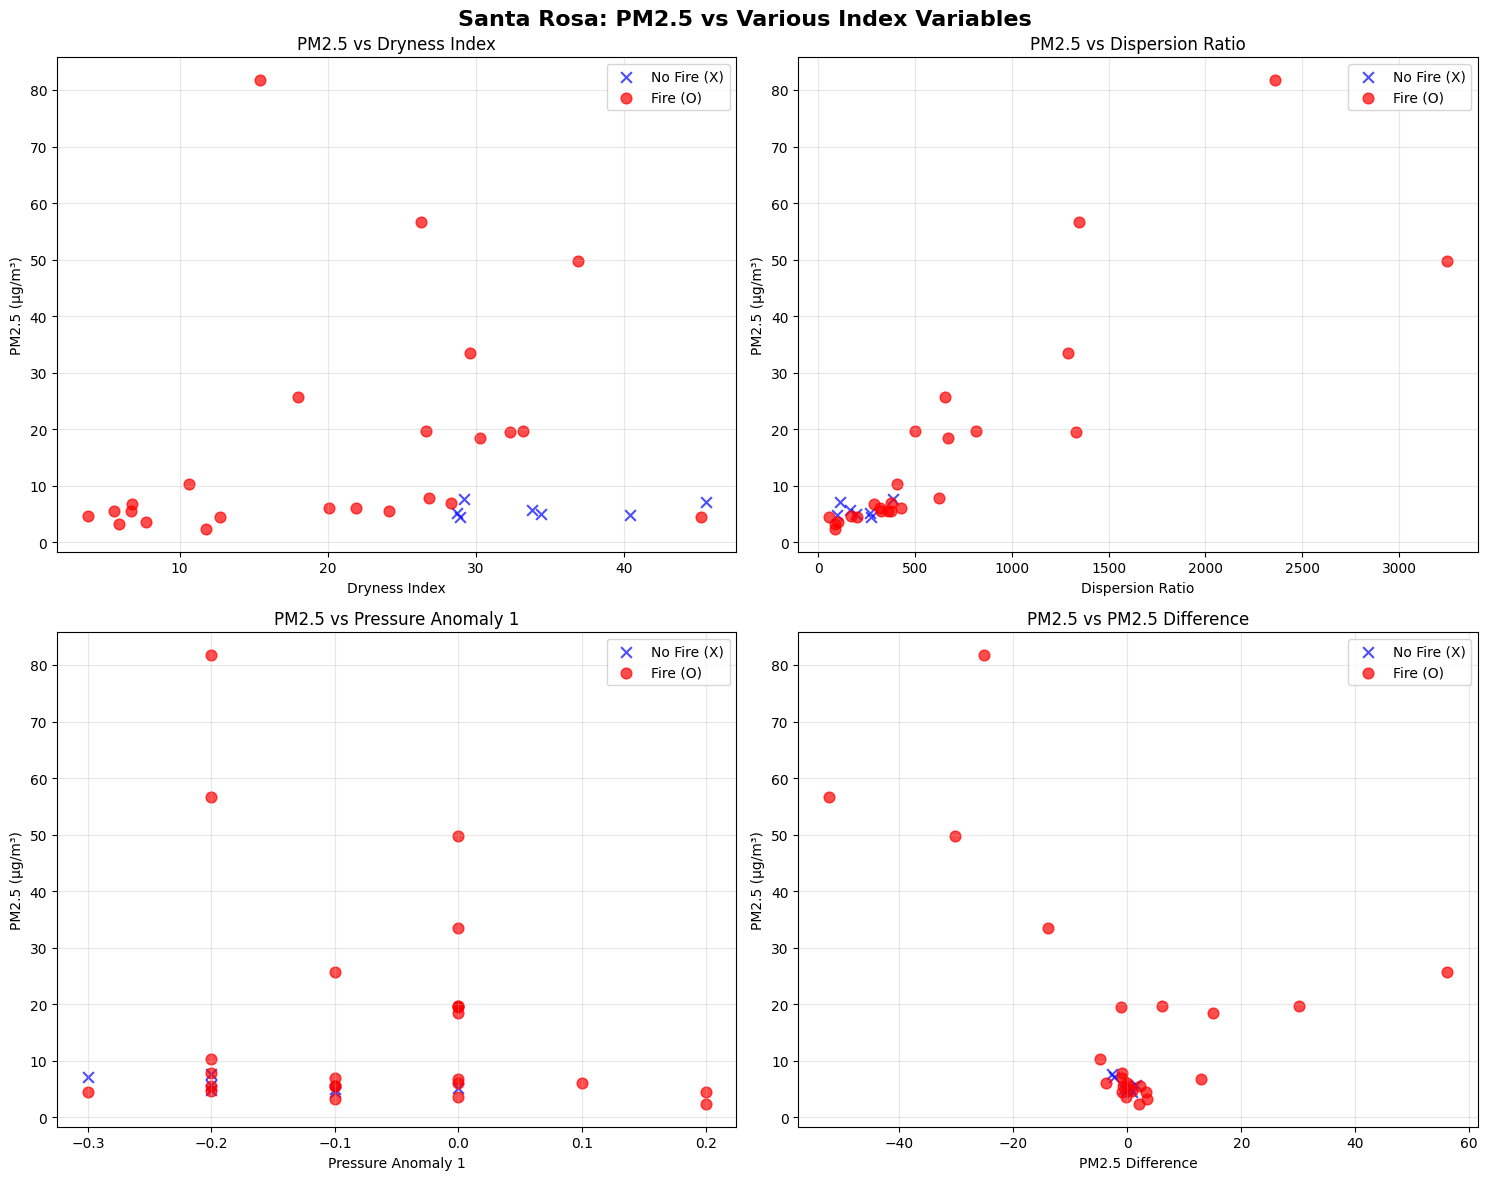

In [165]:
# Create separate scatter plots for Santa Rosa data: PM2.5 vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Santa Rosa: PM2.5 vs Various Index Variables', fontsize=16, fontweight='bold')

# Separate data by fire events for Santa Rosa
santa_rosa_no_fire = santa_rosa[santa_rosa['Wildfire_Event'] == 0]
santa_rosa_fire = santa_rosa[santa_rosa['Wildfire_Event'] == 1]

print(f"Santa Rosa data summary:")
print(f"Total records: {len(santa_rosa)}")
print(f"No fire events: {len(santa_rosa_no_fire)}")
print(f"Fire events: {len(santa_rosa_fire)}")

# Plot 1: PM2.5 vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(santa_rosa_no_fire['dryness_index '], santa_rosa_no_fire['PM25_ug_m3'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(santa_rosa_fire['dryness_index '], santa_rosa_fire['PM25_ug_m3'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('PM2.5 (μg/m³)')
ax1.set_title('PM2.5 vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: PM2.5 vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(santa_rosa_no_fire['dispersion_ratio'], santa_rosa_no_fire['PM25_ug_m3'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(santa_rosa_fire['dispersion_ratio'], santa_rosa_fire['PM25_ug_m3'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('PM2.5 (μg/m³)')
ax2.set_title('PM2.5 vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: PM2.5 vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(santa_rosa_no_fire['PressureAnomaly1'], santa_rosa_no_fire['PM25_ug_m3'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(santa_rosa_fire['PressureAnomaly1'], santa_rosa_fire['PM25_ug_m3'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('PM2.5 (μg/m³)')
ax3.set_title('PM2.5 vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: PM2.5 vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(santa_rosa_no_fire['pm25_difference'], santa_rosa_no_fire['PM25_ug_m3'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(santa_rosa_fire['pm25_difference'], santa_rosa_fire['PM25_ug_m3'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('PM2.5 (μg/m³)')
ax4.set_title('PM2.5 vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [166]:
# Add correlation analysis and summary statistics for Santa Rosa
print("\n=== SANTA ROSA CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = santa_rosa['PM25_ug_m3'].corr(santa_rosa[var])
    print(f"PM2.5 vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR SANTA ROSA ===")
print("PM2.5 levels:")
print(f"  No Fire - Mean: {santa_rosa_no_fire['PM25_ug_m3'].mean():.2f}, Std: {santa_rosa_no_fire['PM25_ug_m3'].std():.2f}")
print(f"  Fire    - Mean: {santa_rosa_fire['PM25_ug_m3'].mean():.2f}, Std: {santa_rosa_fire['PM25_ug_m3'].std():.2f}")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {santa_rosa_no_fire[var].mean():.2f}, Std: {santa_rosa_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {santa_rosa_fire[var].mean():.2f}, Std: {santa_rosa_fire[var].std():.2f}")

# Show date ranges for fire vs no-fire events
print(f"\n=== DATE RANGES ===")
print(f"No Fire Events: {santa_rosa_no_fire['Date'].min()} to {santa_rosa_no_fire['Date'].max()}")
print(f"Fire Events: {santa_rosa_fire['Date'].min()} to {santa_rosa_fire['Date'].max()}")



=== SANTA ROSA CORRELATION ANALYSIS ===
PM2.5 vs dryness_index: r = 0.098
PM2.5 vs dispersion_ratio: r = 0.868
PM2.5 vs PressureAnomaly1: r = -0.096
PM2.5 vs pm25_difference: r = -0.473

=== FIRE vs NO-FIRE STATISTICS FOR SANTA ROSA ===
PM2.5 levels:
  No Fire - Mean: 5.71, Std: 1.26
  Fire    - Mean: 16.99, Std: 20.05

dryness_index:
  No Fire - Mean: 34.41, Std: 6.45
  Fire    - Mean: 20.28, Std: 11.55

dispersion_ratio:
  No Fire - Mean: 215.36, Std: 101.28
  Fire    - Mean: 684.03, Std: 765.19

PressureAnomaly1:
  No Fire - Mean: -0.16, Std: 0.10
  Fire    - Mean: -0.06, Std: 0.13

pm25_difference:
  No Fire - Mean: -0.41, Std: 1.60
  Fire    - Mean: -0.11, Std: 19.83

=== DATE RANGES ===
No Fire Events: 10/1/2017 to 10/7/2017
Fire Events: 10/10/2017 to 10/9/2017


Santa Rosa NOx_ppb data summary:
Total records: 31
No fire events: 7
Fire events: 24
NOx_ppb range: 3.70 to 29.20


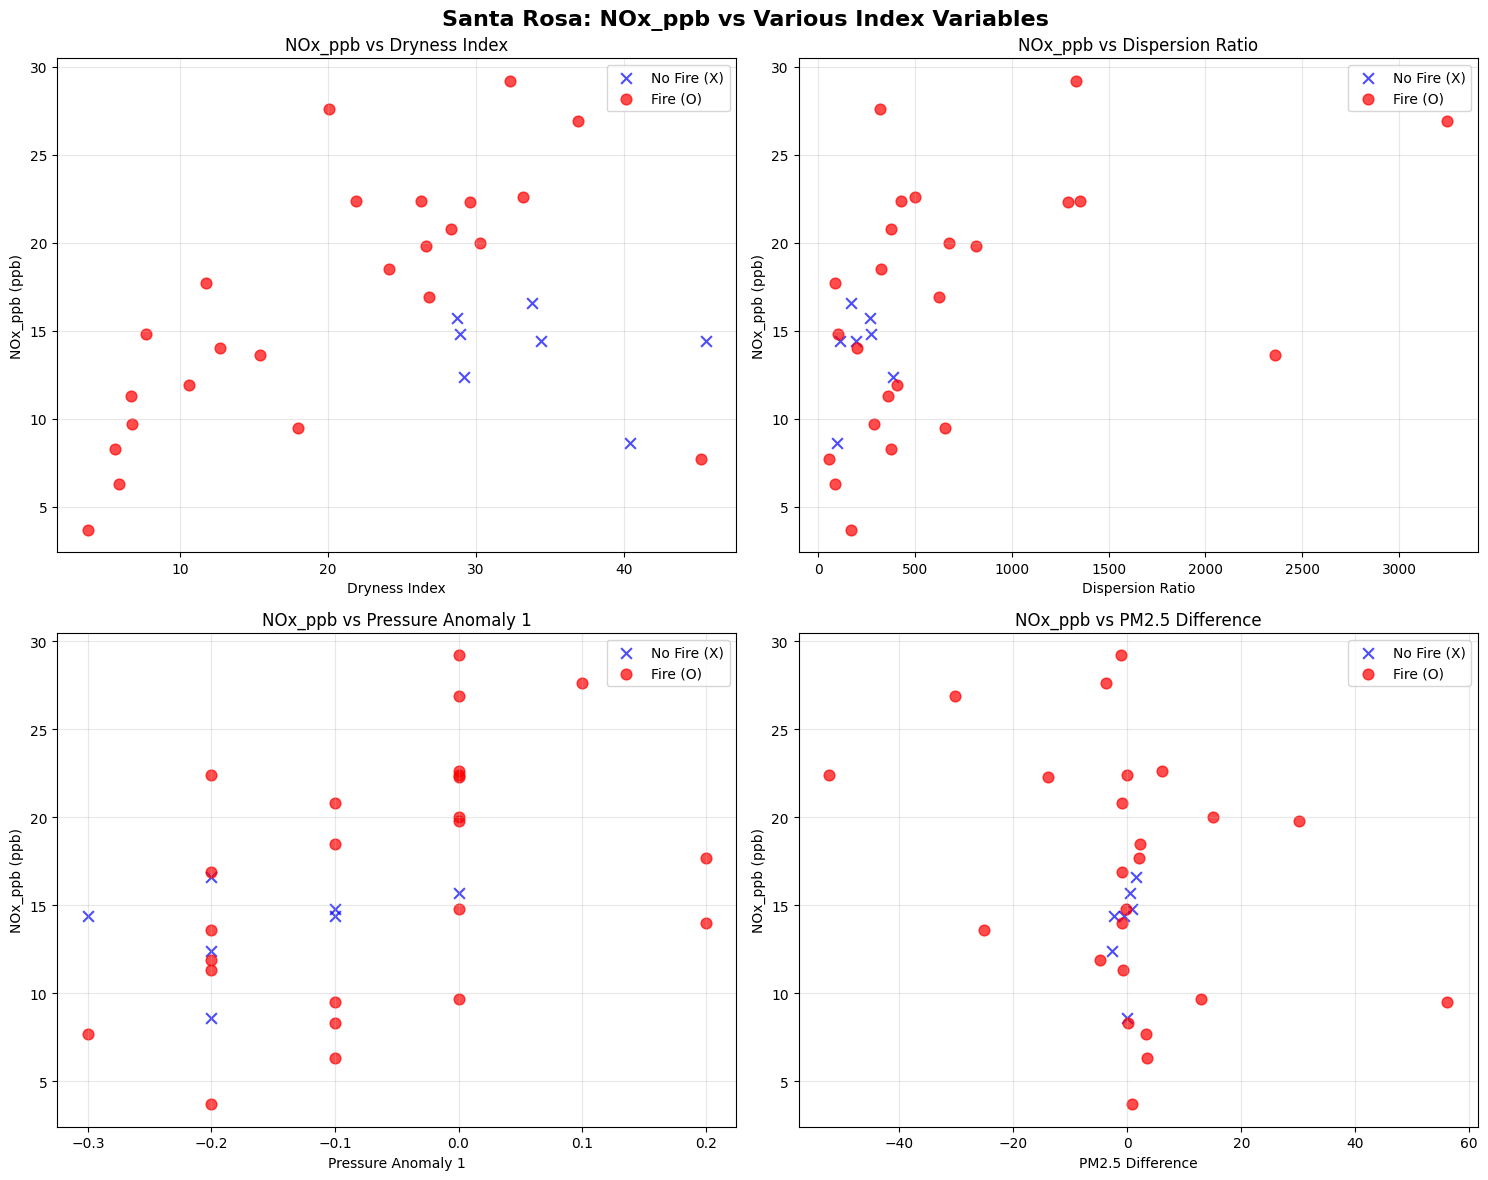

In [167]:
# Create separate scatter plots for Santa Rosa data: NOx_ppb vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Santa Rosa: NOx_ppb vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Santa Rosa NOx_ppb data summary:")
print(f"Total records: {len(santa_rosa)}")
print(f"No fire events: {len(santa_rosa_no_fire)}")
print(f"Fire events: {len(santa_rosa_fire)}")
print(f"NOx_ppb range: {santa_rosa['NOx_ppb'].min():.2f} to {santa_rosa['NOx_ppb'].max():.2f}")

# Plot 1: NOx_ppb vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(santa_rosa_no_fire['dryness_index '], santa_rosa_no_fire['NOx_ppb'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(santa_rosa_fire['dryness_index '], santa_rosa_fire['NOx_ppb'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('NOx_ppb (ppb)')
ax1.set_title('NOx_ppb vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: NOx_ppb vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(santa_rosa_no_fire['dispersion_ratio'], santa_rosa_no_fire['NOx_ppb'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(santa_rosa_fire['dispersion_ratio'], santa_rosa_fire['NOx_ppb'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('NOx_ppb (ppb)')
ax2.set_title('NOx_ppb vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: NOx_ppb vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(santa_rosa_no_fire['PressureAnomaly1'], santa_rosa_no_fire['NOx_ppb'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(santa_rosa_fire['PressureAnomaly1'], santa_rosa_fire['NOx_ppb'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('NOx_ppb (ppb)')
ax3.set_title('NOx_ppb vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: NOx_ppb vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(santa_rosa_no_fire['pm25_difference'], santa_rosa_no_fire['NOx_ppb'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(santa_rosa_fire['pm25_difference'], santa_rosa_fire['NOx_ppb'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('NOx_ppb (ppb)')
ax4.set_title('NOx_ppb vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [168]:
# Add correlation analysis and summary statistics for Santa Rosa NOx_ppb
print("\n=== SANTA ROSA NOx_ppb CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = santa_rosa['NOx_ppb'].corr(santa_rosa[var])
    print(f"NOx_ppb vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR SANTA ROSA NOx_ppb ===")
print("NOx_ppb levels:")
print(f"  No Fire - Mean: {santa_rosa_no_fire['NOx_ppb'].mean():.2f}, Std: {santa_rosa_no_fire['NOx_ppb'].std():.2f}")
print(f"  Fire    - Mean: {santa_rosa_fire['NOx_ppb'].mean():.2f}, Std: {santa_rosa_fire['NOx_ppb'].std():.2f}")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {santa_rosa_no_fire[var].mean():.2f}, Std: {santa_rosa_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {santa_rosa_fire[var].mean():.2f}, Std: {santa_rosa_fire[var].std():.2f}")

# Compare PM2.5 and NOx_ppb correlations
print(f"\n=== COMPARISON: PM2.5 vs NOx_ppb CORRELATIONS ===")
print(f"PM2.5 vs NOx_ppb correlation: {santa_rosa['PM25_ug_m3'].corr(santa_rosa['NOx_ppb']):.3f}")

# Show NOx_ppb ranges for fire vs no-fire events
print(f"\n=== NOx_ppb RANGES ===")
print(f"No Fire Events - Min: {santa_rosa_no_fire['NOx_ppb'].min():.2f}, Max: {santa_rosa_no_fire['NOx_ppb'].max():.2f}")
print(f"Fire Events - Min: {santa_rosa_fire['NOx_ppb'].min():.2f}, Max: {santa_rosa_fire['NOx_ppb'].max():.2f}")



=== SANTA ROSA NOx_ppb CORRELATION ANALYSIS ===
NOx_ppb vs dryness_index: r = 0.379
NOx_ppb vs dispersion_ratio: r = 0.478
NOx_ppb vs PressureAnomaly1: r = 0.460
NOx_ppb vs pm25_difference: r = -0.301

=== FIRE vs NO-FIRE STATISTICS FOR SANTA ROSA NOx_ppb ===
NOx_ppb levels:
  No Fire - Mean: 13.84, Std: 2.65
  Fire    - Mean: 16.58, Std: 7.08

dryness_index:
  No Fire - Mean: 34.41, Std: 6.45
  Fire    - Mean: 20.28, Std: 11.55

dispersion_ratio:
  No Fire - Mean: 215.36, Std: 101.28
  Fire    - Mean: 684.03, Std: 765.19

PressureAnomaly1:
  No Fire - Mean: -0.16, Std: 0.10
  Fire    - Mean: -0.06, Std: 0.13

pm25_difference:
  No Fire - Mean: -0.41, Std: 1.60
  Fire    - Mean: -0.11, Std: 19.83

=== COMPARISON: PM2.5 vs NOx_ppb CORRELATIONS ===
PM2.5 vs NOx_ppb correlation: 0.312

=== NOx_ppb RANGES ===
No Fire Events - Min: 8.60, Max: 16.60
Fire Events - Min: 3.70, Max: 29.20


Santa Rosa Average Humidity data summary:
Total records: 31
No fire events: 7
Fire events: 24
Avg Humidity range: 5.3% to 92.8%


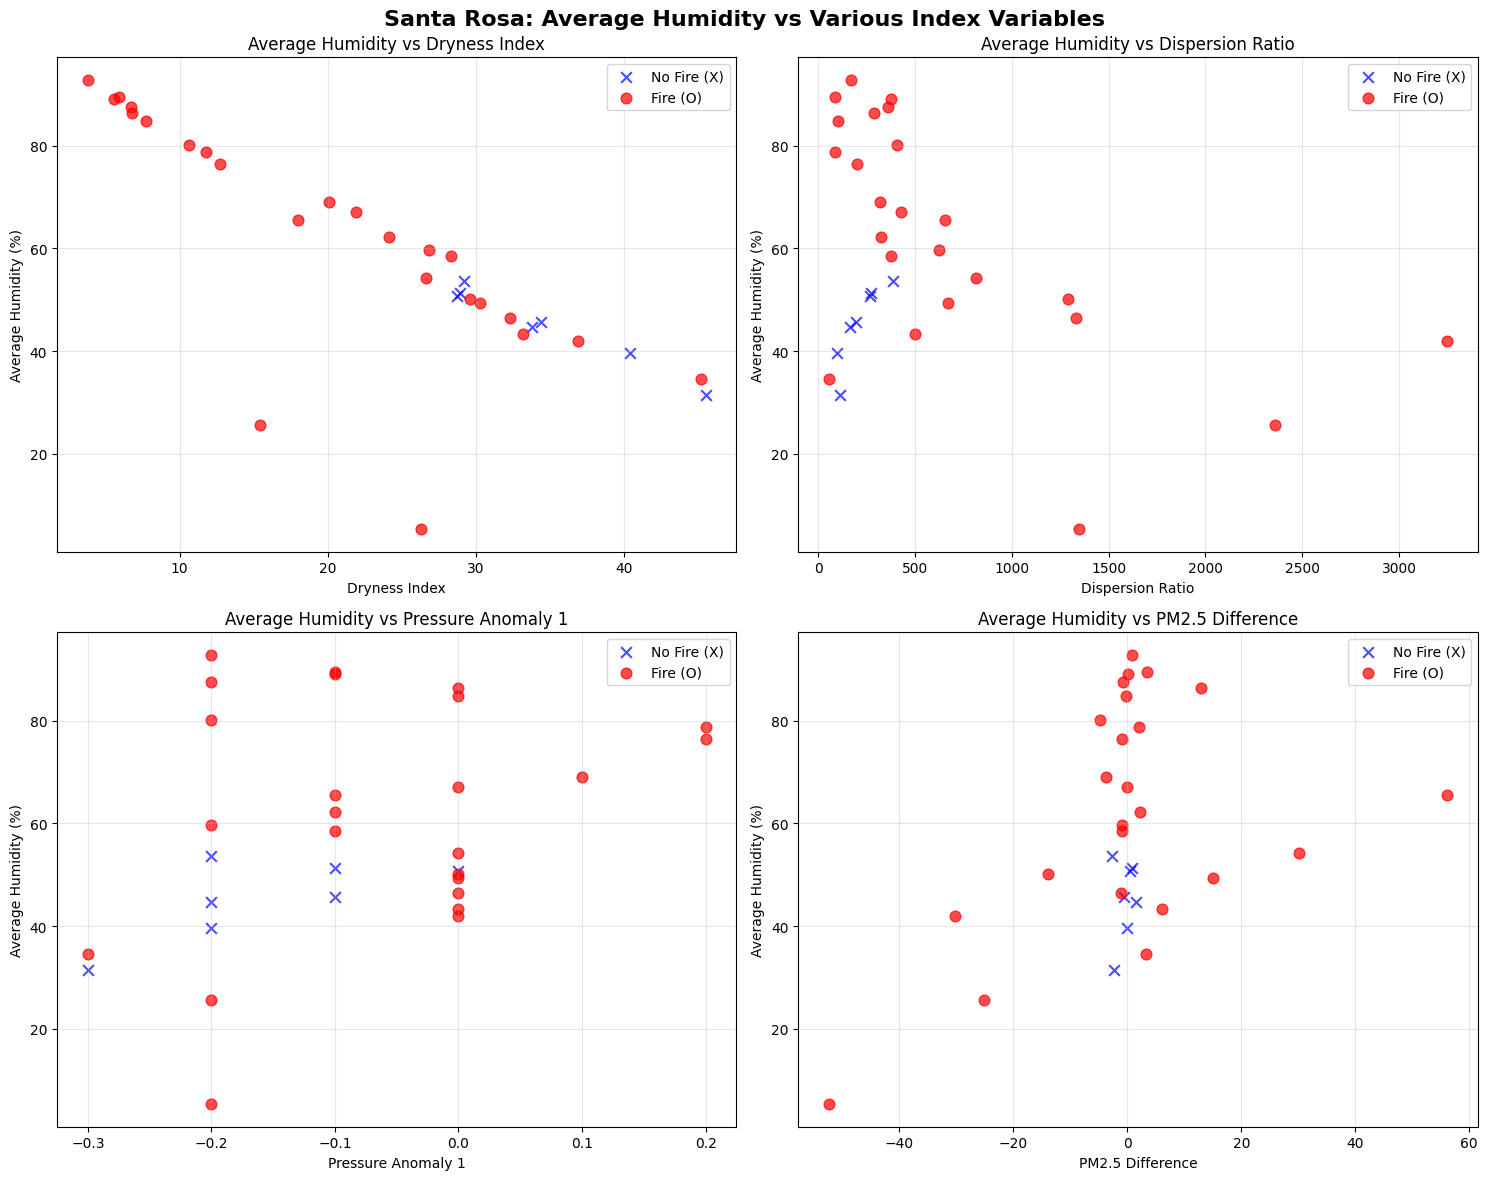

In [169]:
# Create separate scatter plots for Santa Rosa data: Avg_Humidity_Percent vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Santa Rosa: Average Humidity vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Santa Rosa Average Humidity data summary:")
print(f"Total records: {len(santa_rosa)}")
print(f"No fire events: {len(santa_rosa_no_fire)}")
print(f"Fire events: {len(santa_rosa_fire)}")
print(f"Avg Humidity range: {santa_rosa['Avg_Humidity_Percent'].min():.1f}% to {santa_rosa['Avg_Humidity_Percent'].max():.1f}%")

# Plot 1: Avg_Humidity_Percent vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(santa_rosa_no_fire['dryness_index '], santa_rosa_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(santa_rosa_fire['dryness_index '], santa_rosa_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('Average Humidity (%)')
ax1.set_title('Average Humidity vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Avg_Humidity_Percent vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(santa_rosa_no_fire['dispersion_ratio'], santa_rosa_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(santa_rosa_fire['dispersion_ratio'], santa_rosa_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('Average Humidity (%)')
ax2.set_title('Average Humidity vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Avg_Humidity_Percent vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(santa_rosa_no_fire['PressureAnomaly1'], santa_rosa_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(santa_rosa_fire['PressureAnomaly1'], santa_rosa_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('Average Humidity (%)')
ax3.set_title('Average Humidity vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Avg_Humidity_Percent vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(santa_rosa_no_fire['pm25_difference'], santa_rosa_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(santa_rosa_fire['pm25_difference'], santa_rosa_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('Average Humidity (%)')
ax4.set_title('Average Humidity vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [170]:
# Add correlation analysis and summary statistics for Santa Rosa Average Humidity
print("\n=== SANTA ROSA AVERAGE HUMIDITY CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = santa_rosa['Avg_Humidity_Percent'].corr(santa_rosa[var])
    print(f"Avg_Humidity_Percent vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR SANTA ROSA AVERAGE HUMIDITY ===")
print("Average Humidity levels:")
print(f"  No Fire - Mean: {santa_rosa_no_fire['Avg_Humidity_Percent'].mean():.1f}%, Std: {santa_rosa_no_fire['Avg_Humidity_Percent'].std():.1f}%")
print(f"  Fire    - Mean: {santa_rosa_fire['Avg_Humidity_Percent'].mean():.1f}%, Std: {santa_rosa_fire['Avg_Humidity_Percent'].std():.1f}%")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {santa_rosa_no_fire[var].mean():.2f}, Std: {santa_rosa_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {santa_rosa_fire[var].mean():.2f}, Std: {santa_rosa_fire[var].std():.2f}")

# Compare humidity with other variables
print(f"\n=== COMPARISON: HUMIDITY vs OTHER VARIABLES ===")
print(f"Avg_Humidity vs PM2.5 correlation: {santa_rosa['Avg_Humidity_Percent'].corr(santa_rosa['PM25_ug_m3']):.3f}")
print(f"Avg_Humidity vs NOx_ppb correlation: {santa_rosa['Avg_Humidity_Percent'].corr(santa_rosa['NOx_ppb']):.3f}")

# Show humidity ranges for fire vs no-fire events
print(f"\n=== AVERAGE HUMIDITY RANGES ===")
print(f"No Fire Events - Min: {santa_rosa_no_fire['Avg_Humidity_Percent'].min():.1f}%, Max: {santa_rosa_no_fire['Avg_Humidity_Percent'].max():.1f}%")
print(f"Fire Events - Min: {santa_rosa_fire['Avg_Humidity_Percent'].min():.1f}%, Max: {santa_rosa_fire['Avg_Humidity_Percent'].max():.1f}%")

# Check if there's a relationship between humidity and dryness index
print(f"\n=== HUMIDITY vs DRYNESS RELATIONSHIP ===")
print(f"Expected: Higher humidity should correlate with lower dryness index")
print(f"Actual correlation: {santa_rosa['Avg_Humidity_Percent'].corr(santa_rosa['dryness_index ']):.3f}")
if santa_rosa['Avg_Humidity_Percent'].corr(santa_rosa['dryness_index ']) < 0:
    print("✓ As expected: Higher humidity correlates with lower dryness index")
else:
    print("⚠ Unexpected: Higher humidity does not correlate with lower dryness index")



=== SANTA ROSA AVERAGE HUMIDITY CORRELATION ANALYSIS ===
Avg_Humidity_Percent vs dryness_index: r = -0.803
Avg_Humidity_Percent vs dispersion_ratio: r = -0.438
Avg_Humidity_Percent vs PressureAnomaly1: r = 0.325
Avg_Humidity_Percent vs pm25_difference: r = 0.414

=== FIRE vs NO-FIRE STATISTICS FOR SANTA ROSA AVERAGE HUMIDITY ===
Average Humidity levels:
  No Fire - Mean: 45.3%, Std: 7.7%
  Fire    - Mean: 62.4%, Std: 22.6%

dryness_index:
  No Fire - Mean: 34.41, Std: 6.45
  Fire    - Mean: 20.28, Std: 11.55

dispersion_ratio:
  No Fire - Mean: 215.36, Std: 101.28
  Fire    - Mean: 684.03, Std: 765.19

PressureAnomaly1:
  No Fire - Mean: -0.16, Std: 0.10
  Fire    - Mean: -0.06, Std: 0.13

pm25_difference:
  No Fire - Mean: -0.41, Std: 1.60
  Fire    - Mean: -0.11, Std: 19.83

=== COMPARISON: HUMIDITY vs OTHER VARIABLES ===
Avg_Humidity vs PM2.5 correlation: -0.576
Avg_Humidity vs NOx_ppb correlation: -0.397

=== AVERAGE HUMIDITY RANGES ===
No Fire Events - Min: 31.5%, Max: 53.6%
Fire

Santa Rosa Average Wind Speed data summary:
Total records: 31
No fire events: 7
Fire events: 24
Avg Wind Speed range: 1.8 to 11.3 mph


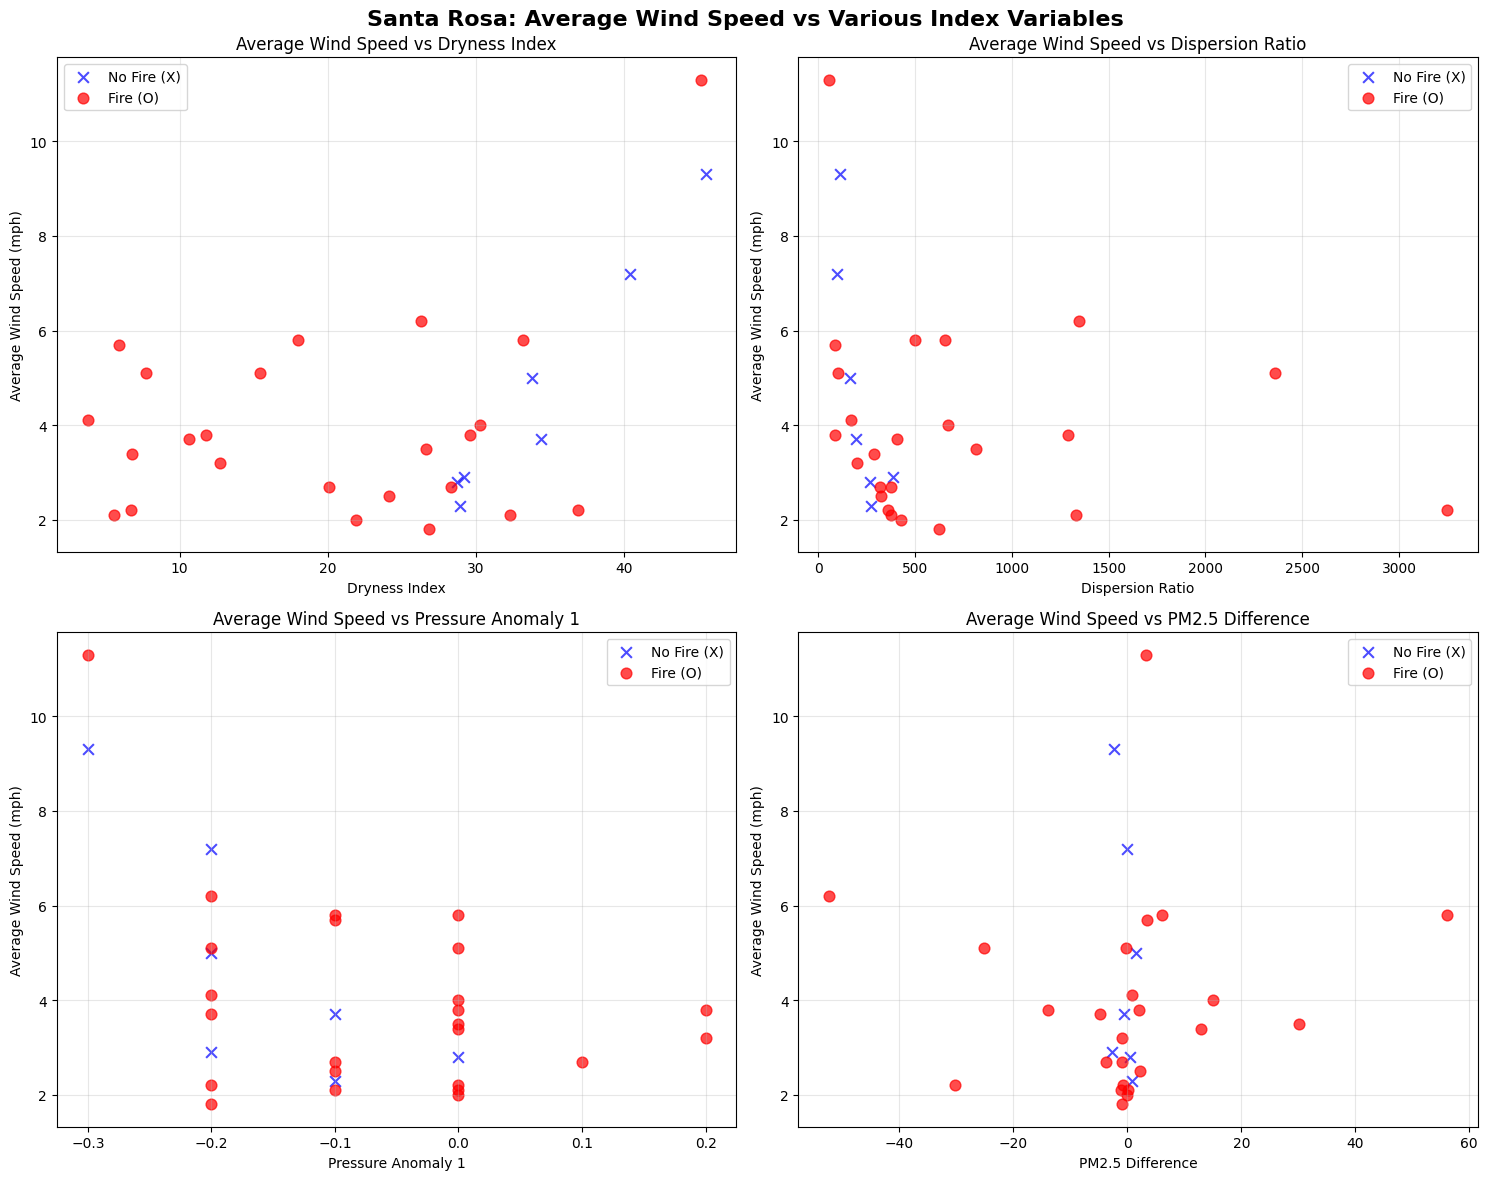

In [171]:
# Create separate scatter plots for Santa Rosa data: Avg_Wind_Speed_mph vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Santa Rosa: Average Wind Speed vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Santa Rosa Average Wind Speed data summary:")
print(f"Total records: {len(santa_rosa)}")
print(f"No fire events: {len(santa_rosa_no_fire)}")
print(f"Fire events: {len(santa_rosa_fire)}")
print(f"Avg Wind Speed range: {santa_rosa['Avg_Wind_Speed_mph'].min():.1f} to {santa_rosa['Avg_Wind_Speed_mph'].max():.1f} mph")

# Plot 1: Avg_Wind_Speed_mph vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(santa_rosa_no_fire['dryness_index '], santa_rosa_no_fire['Avg_Wind_Speed_mph'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(santa_rosa_fire['dryness_index '], santa_rosa_fire['Avg_Wind_Speed_mph'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('Average Wind Speed (mph)')
ax1.set_title('Average Wind Speed vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Avg_Wind_Speed_mph vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(santa_rosa_no_fire['dispersion_ratio'], santa_rosa_no_fire['Avg_Wind_Speed_mph'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(santa_rosa_fire['dispersion_ratio'], santa_rosa_fire['Avg_Wind_Speed_mph'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('Average Wind Speed (mph)')
ax2.set_title('Average Wind Speed vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Avg_Wind_Speed_mph vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(santa_rosa_no_fire['PressureAnomaly1'], santa_rosa_no_fire['Avg_Wind_Speed_mph'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(santa_rosa_fire['PressureAnomaly1'], santa_rosa_fire['Avg_Wind_Speed_mph'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('Average Wind Speed (mph)')
ax3.set_title('Average Wind Speed vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Avg_Wind_Speed_mph vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(santa_rosa_no_fire['pm25_difference'], santa_rosa_no_fire['Avg_Wind_Speed_mph'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(santa_rosa_fire['pm25_difference'], santa_rosa_fire['Avg_Wind_Speed_mph'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('Average Wind Speed (mph)')
ax4.set_title('Average Wind Speed vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [172]:
# Add correlation analysis and summary statistics for Santa Rosa Average Wind Speed
print("\n=== SANTA ROSA AVERAGE WIND SPEED CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = santa_rosa['Avg_Wind_Speed_mph'].corr(santa_rosa[var])
    print(f"Avg_Wind_Speed_mph vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR SANTA ROSA AVERAGE WIND SPEED ===")
print("Average Wind Speed levels:")
print(f"  No Fire - Mean: {santa_rosa_no_fire['Avg_Wind_Speed_mph'].mean():.1f} mph, Std: {santa_rosa_no_fire['Avg_Wind_Speed_mph'].std():.1f} mph")
print(f"  Fire    - Mean: {santa_rosa_fire['Avg_Wind_Speed_mph'].mean():.1f} mph, Std: {santa_rosa_fire['Avg_Wind_Speed_mph'].std():.1f} mph")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {santa_rosa_no_fire[var].mean():.2f}, Std: {santa_rosa_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {santa_rosa_fire[var].mean():.2f}, Std: {santa_rosa_fire[var].std():.2f}")

# Compare wind speed with other variables
print(f"\n=== COMPARISON: WIND SPEED vs OTHER VARIABLES ===")
print(f"Avg_Wind_Speed vs PM2.5 correlation: {santa_rosa['Avg_Wind_Speed_mph'].corr(santa_rosa['PM25_ug_m3']):.3f}")
print(f"Avg_Wind_Speed vs NOx_ppb correlation: {santa_rosa['Avg_Wind_Speed_mph'].corr(santa_rosa['NOx_ppb']):.3f}")
print(f"Avg_Wind_Speed vs Avg_Humidity correlation: {santa_rosa['Avg_Wind_Speed_mph'].corr(santa_rosa['Avg_Humidity_Percent']):.3f}")

# Show wind speed ranges for fire vs no-fire events
print(f"\n=== AVERAGE WIND SPEED RANGES ===")
print(f"No Fire Events - Min: {santa_rosa_no_fire['Avg_Wind_Speed_mph'].min():.1f} mph, Max: {santa_rosa_no_fire['Avg_Wind_Speed_mph'].max():.1f} mph")
print(f"Fire Events - Min: {santa_rosa_fire['Avg_Wind_Speed_mph'].min():.1f} mph, Max: {santa_rosa_fire['Avg_Wind_Speed_mph'].max():.1f} mph")

# Check wind speed patterns during fire events
print(f"\n=== WIND SPEED FIRE PATTERNS ===")
if santa_rosa_fire['Avg_Wind_Speed_mph'].mean() > santa_rosa_no_fire['Avg_Wind_Speed_mph'].mean():
    print("✓ Fire events tend to occur during higher wind speeds")
    print(f"  Difference: {santa_rosa_fire['Avg_Wind_Speed_mph'].mean() - santa_rosa_no_fire['Avg_Wind_Speed_mph'].mean():.1f} mph higher during fires")
else:
    print("⚠ Fire events tend to occur during lower wind speeds")
    print(f"  Difference: {santa_rosa_no_fire['Avg_Wind_Speed_mph'].mean() - santa_rosa_fire['Avg_Wind_Speed_mph'].mean():.1f} mph lower during fires")

# Check relationship with dispersion ratio (wind should help dispersion)
print(f"\n=== WIND vs DISPERSION RELATIONSHIP ===")
wind_disp_corr = santa_rosa['Avg_Wind_Speed_mph'].corr(santa_rosa['dispersion_ratio'])
print(f"Expected: Higher wind speed should correlate with higher dispersion ratio")
print(f"Actual correlation: {wind_disp_corr:.3f}")
if wind_disp_corr > 0:
    print("✓ As expected: Higher wind speed correlates with higher dispersion ratio")
else:
    print("⚠ Unexpected: Higher wind speed does not correlate with higher dispersion ratio")



=== SANTA ROSA AVERAGE WIND SPEED CORRELATION ANALYSIS ===
Avg_Wind_Speed_mph vs dryness_index: r = 0.388
Avg_Wind_Speed_mph vs dispersion_ratio: r = -0.188
Avg_Wind_Speed_mph vs PressureAnomaly1: r = -0.468
Avg_Wind_Speed_mph vs pm25_difference: r = 0.030

=== FIRE vs NO-FIRE STATISTICS FOR SANTA ROSA AVERAGE WIND SPEED ===
Average Wind Speed levels:
  No Fire - Mean: 4.7 mph, Std: 2.6 mph
  Fire    - Mean: 3.9 mph, Std: 2.1 mph

dryness_index:
  No Fire - Mean: 34.41, Std: 6.45
  Fire    - Mean: 20.28, Std: 11.55

dispersion_ratio:
  No Fire - Mean: 215.36, Std: 101.28
  Fire    - Mean: 684.03, Std: 765.19

PressureAnomaly1:
  No Fire - Mean: -0.16, Std: 0.10
  Fire    - Mean: -0.06, Std: 0.13

pm25_difference:
  No Fire - Mean: -0.41, Std: 1.60
  Fire    - Mean: -0.11, Std: 19.83

=== COMPARISON: WIND SPEED vs OTHER VARIABLES ===
Avg_Wind_Speed vs PM2.5 correlation: 0.073
Avg_Wind_Speed vs NOx_ppb correlation: -0.358
Avg_Wind_Speed vs Avg_Humidity correlation: -0.412

=== AVERAGE W

Santa Rosa Average Temperature data summary:
Total records: 31
No fire events: 7
Fire events: 24
Avg Temperature range: 20.7°F to 69.0°F


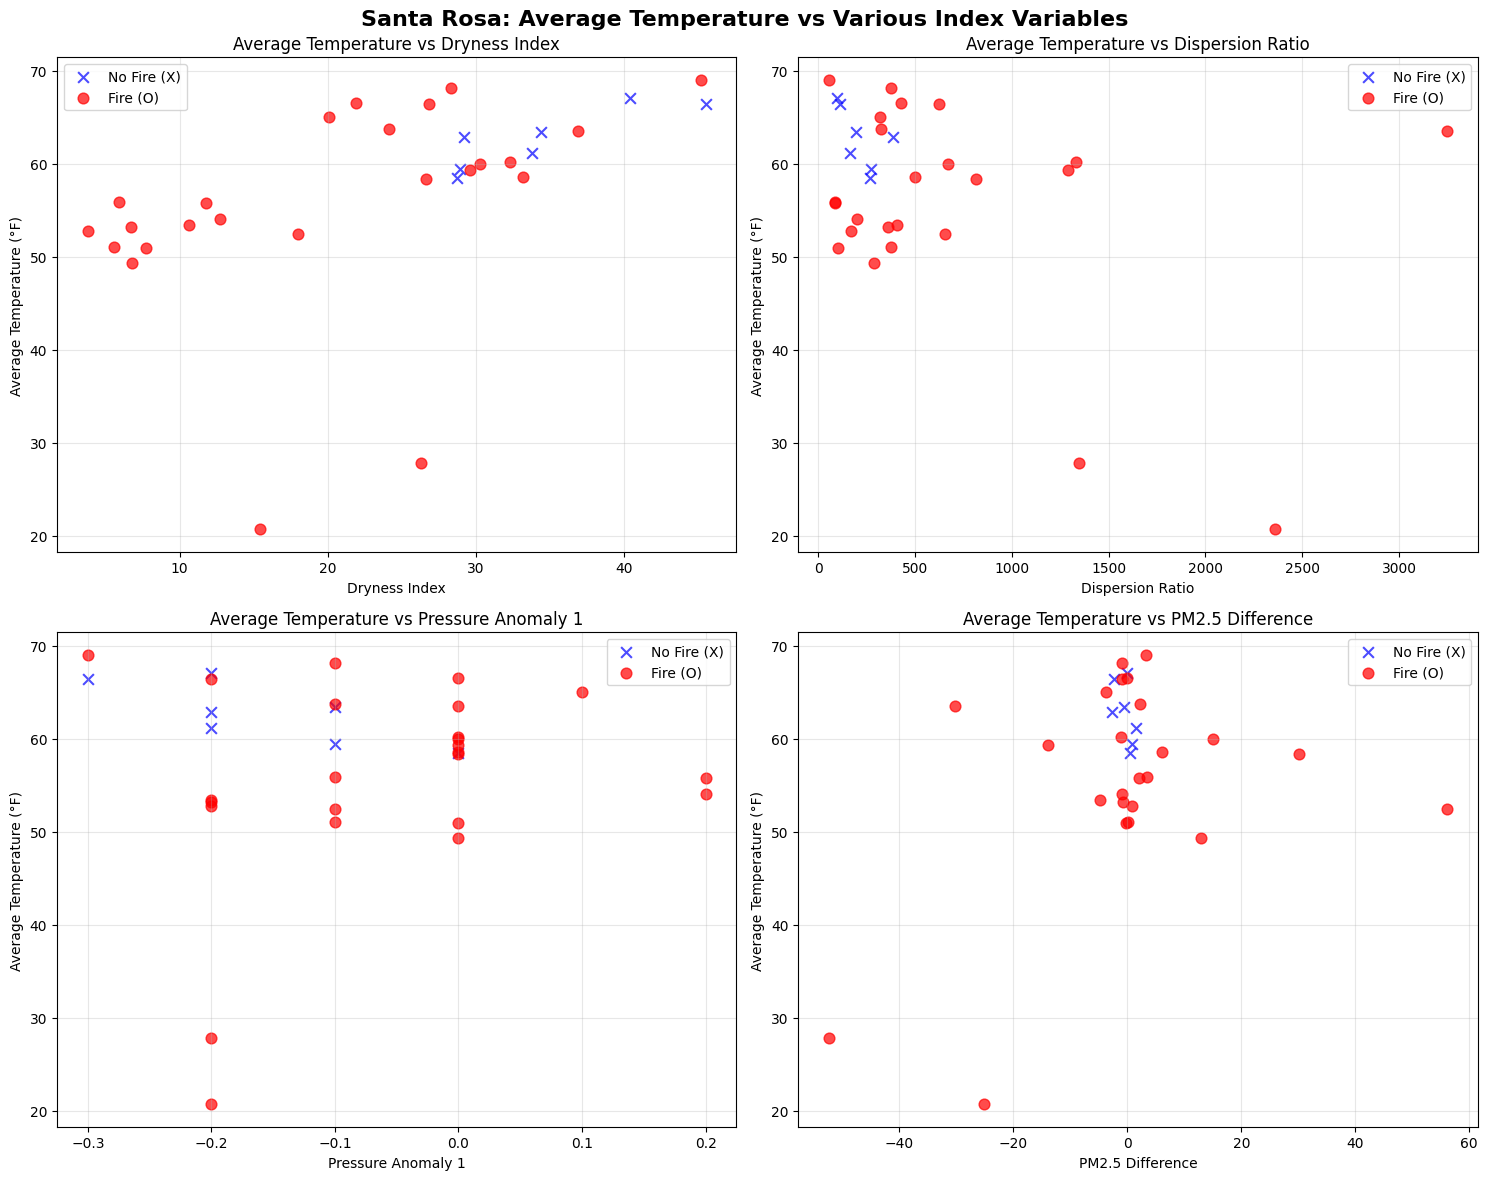

In [173]:
# Create separate scatter plots for Santa Rosa data: Avg_Temp_F vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Santa Rosa: Average Temperature vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Santa Rosa Average Temperature data summary:")
print(f"Total records: {len(santa_rosa)}")
print(f"No fire events: {len(santa_rosa_no_fire)}")
print(f"Fire events: {len(santa_rosa_fire)}")
print(f"Avg Temperature range: {santa_rosa['Avg_Temp_F'].min():.1f}°F to {santa_rosa['Avg_Temp_F'].max():.1f}°F")

# Plot 1: Avg_Temp_F vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(santa_rosa_no_fire['dryness_index '], santa_rosa_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(santa_rosa_fire['dryness_index '], santa_rosa_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('Average Temperature (°F)')
ax1.set_title('Average Temperature vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Avg_Temp_F vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(santa_rosa_no_fire['dispersion_ratio'], santa_rosa_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(santa_rosa_fire['dispersion_ratio'], santa_rosa_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('Average Temperature (°F)')
ax2.set_title('Average Temperature vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Avg_Temp_F vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(santa_rosa_no_fire['PressureAnomaly1'], santa_rosa_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(santa_rosa_fire['PressureAnomaly1'], santa_rosa_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('Average Temperature (°F)')
ax3.set_title('Average Temperature vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Avg_Temp_F vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(santa_rosa_no_fire['pm25_difference'], santa_rosa_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(santa_rosa_fire['pm25_difference'], santa_rosa_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('Average Temperature (°F)')
ax4.set_title('Average Temperature vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [174]:
# Add correlation analysis and summary statistics for Santa Rosa Average Temperature
print("\n=== SANTA ROSA AVERAGE TEMPERATURE CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = santa_rosa['Avg_Temp_F'].corr(santa_rosa[var])
    print(f"Avg_Temp_F vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR SANTA ROSA AVERAGE TEMPERATURE ===")
print("Average Temperature levels:")
print(f"  No Fire - Mean: {santa_rosa_no_fire['Avg_Temp_F'].mean():.1f}°F, Std: {santa_rosa_no_fire['Avg_Temp_F'].std():.1f}°F")
print(f"  Fire    - Mean: {santa_rosa_fire['Avg_Temp_F'].mean():.1f}°F, Std: {santa_rosa_fire['Avg_Temp_F'].std():.1f}°F")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {santa_rosa_no_fire[var].mean():.2f}, Std: {santa_rosa_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {santa_rosa_fire[var].mean():.2f}, Std: {santa_rosa_fire[var].std():.2f}")

# Compare temperature with other variables
print(f"\n=== COMPARISON: TEMPERATURE vs OTHER VARIABLES ===")
print(f"Avg_Temp vs PM2.5 correlation: {santa_rosa['Avg_Temp_F'].corr(santa_rosa['PM25_ug_m3']):.3f}")
print(f"Avg_Temp vs NOx_ppb correlation: {santa_rosa['Avg_Temp_F'].corr(santa_rosa['NOx_ppb']):.3f}")
print(f"Avg_Temp vs Avg_Humidity correlation: {santa_rosa['Avg_Temp_F'].corr(santa_rosa['Avg_Humidity_Percent']):.3f}")
print(f"Avg_Temp vs Avg_Wind_Speed correlation: {santa_rosa['Avg_Temp_F'].corr(santa_rosa['Avg_Wind_Speed_mph']):.3f}")

# Show temperature ranges for fire vs no-fire events
print(f"\n=== AVERAGE TEMPERATURE RANGES ===")
print(f"No Fire Events - Min: {santa_rosa_no_fire['Avg_Temp_F'].min():.1f}°F, Max: {santa_rosa_no_fire['Avg_Temp_F'].max():.1f}°F")
print(f"Fire Events - Min: {santa_rosa_fire['Avg_Temp_F'].min():.1f}°F, Max: {santa_rosa_fire['Avg_Temp_F'].max():.1f}°F")

# Check temperature patterns during fire events
print(f"\n=== TEMPERATURE FIRE PATTERNS ===")
if santa_rosa_fire['Avg_Temp_F'].mean() > santa_rosa_no_fire['Avg_Temp_F'].mean():
    print("✓ Fire events tend to occur during higher temperatures")
    print(f"  Difference: {santa_rosa_fire['Avg_Temp_F'].mean() - santa_rosa_no_fire['Avg_Temp_F'].mean():.1f}°F higher during fires")
else:
    print("⚠ Fire events tend to occur during lower temperatures")
    print(f"  Difference: {santa_rosa_no_fire['Avg_Temp_F'].mean() - santa_rosa_fire['Avg_Temp_F'].mean():.1f}°F lower during fires")

# Check relationship with dryness index (temperature should increase dryness)
print(f"\n=== TEMPERATURE vs DRYNESS RELATIONSHIP ===")
temp_dry_corr = santa_rosa['Avg_Temp_F'].corr(santa_rosa['dryness_index '])
print(f"Expected: Higher temperature should correlate with higher dryness index")
print(f"Actual correlation: {temp_dry_corr:.3f}")
if temp_dry_corr > 0:
    print("✓ As expected: Higher temperature correlates with higher dryness index")
else:
    print("⚠ Unexpected: Higher temperature does not correlate with higher dryness index")

# Check relationship with humidity (temperature should decrease humidity)
print(f"\n=== TEMPERATURE vs HUMIDITY RELATIONSHIP ===")
temp_hum_corr = santa_rosa['Avg_Temp_F'].corr(santa_rosa['Avg_Humidity_Percent'])
print(f"Expected: Higher temperature should correlate with lower humidity")
print(f"Actual correlation: {temp_hum_corr:.3f}")
if temp_hum_corr < 0:
    print("✓ As expected: Higher temperature correlates with lower humidity")
else:
    print("⚠ Unexpected: Higher temperature does not correlate with lower humidity")



=== SANTA ROSA AVERAGE TEMPERATURE CORRELATION ANALYSIS ===
Avg_Temp_F vs dryness_index: r = 0.485
Avg_Temp_F vs dispersion_ratio: r = -0.376
Avg_Temp_F vs PressureAnomaly1: r = 0.055
Avg_Temp_F vs pm25_difference: r = 0.353

=== FIRE vs NO-FIRE STATISTICS FOR SANTA ROSA AVERAGE TEMPERATURE ===
Average Temperature levels:
  No Fire - Mean: 62.7°F, Std: 3.3°F
  Fire    - Mean: 55.7°F, Std: 11.3°F

dryness_index:
  No Fire - Mean: 34.41, Std: 6.45
  Fire    - Mean: 20.28, Std: 11.55

dispersion_ratio:
  No Fire - Mean: 215.36, Std: 101.28
  Fire    - Mean: 684.03, Std: 765.19

PressureAnomaly1:
  No Fire - Mean: -0.16, Std: 0.10
  Fire    - Mean: -0.06, Std: 0.13

pm25_difference:
  No Fire - Mean: -0.41, Std: 1.60
  Fire    - Mean: -0.11, Std: 19.83

=== COMPARISON: TEMPERATURE vs OTHER VARIABLES ===
Avg_Temp vs PM2.5 correlation: -0.681
Avg_Temp vs NOx_ppb correlation: 0.147
Avg_Temp vs Avg_Humidity correlation: 0.114
Avg_Temp vs Avg_Wind_Speed correlation: -0.039

=== AVERAGE TEMPERA

Palisades/LA data summary:
Total records: 31
No fire events: 6
Fire events: 25
PM2.5 range: 7.4 to 93.0 μg/m³


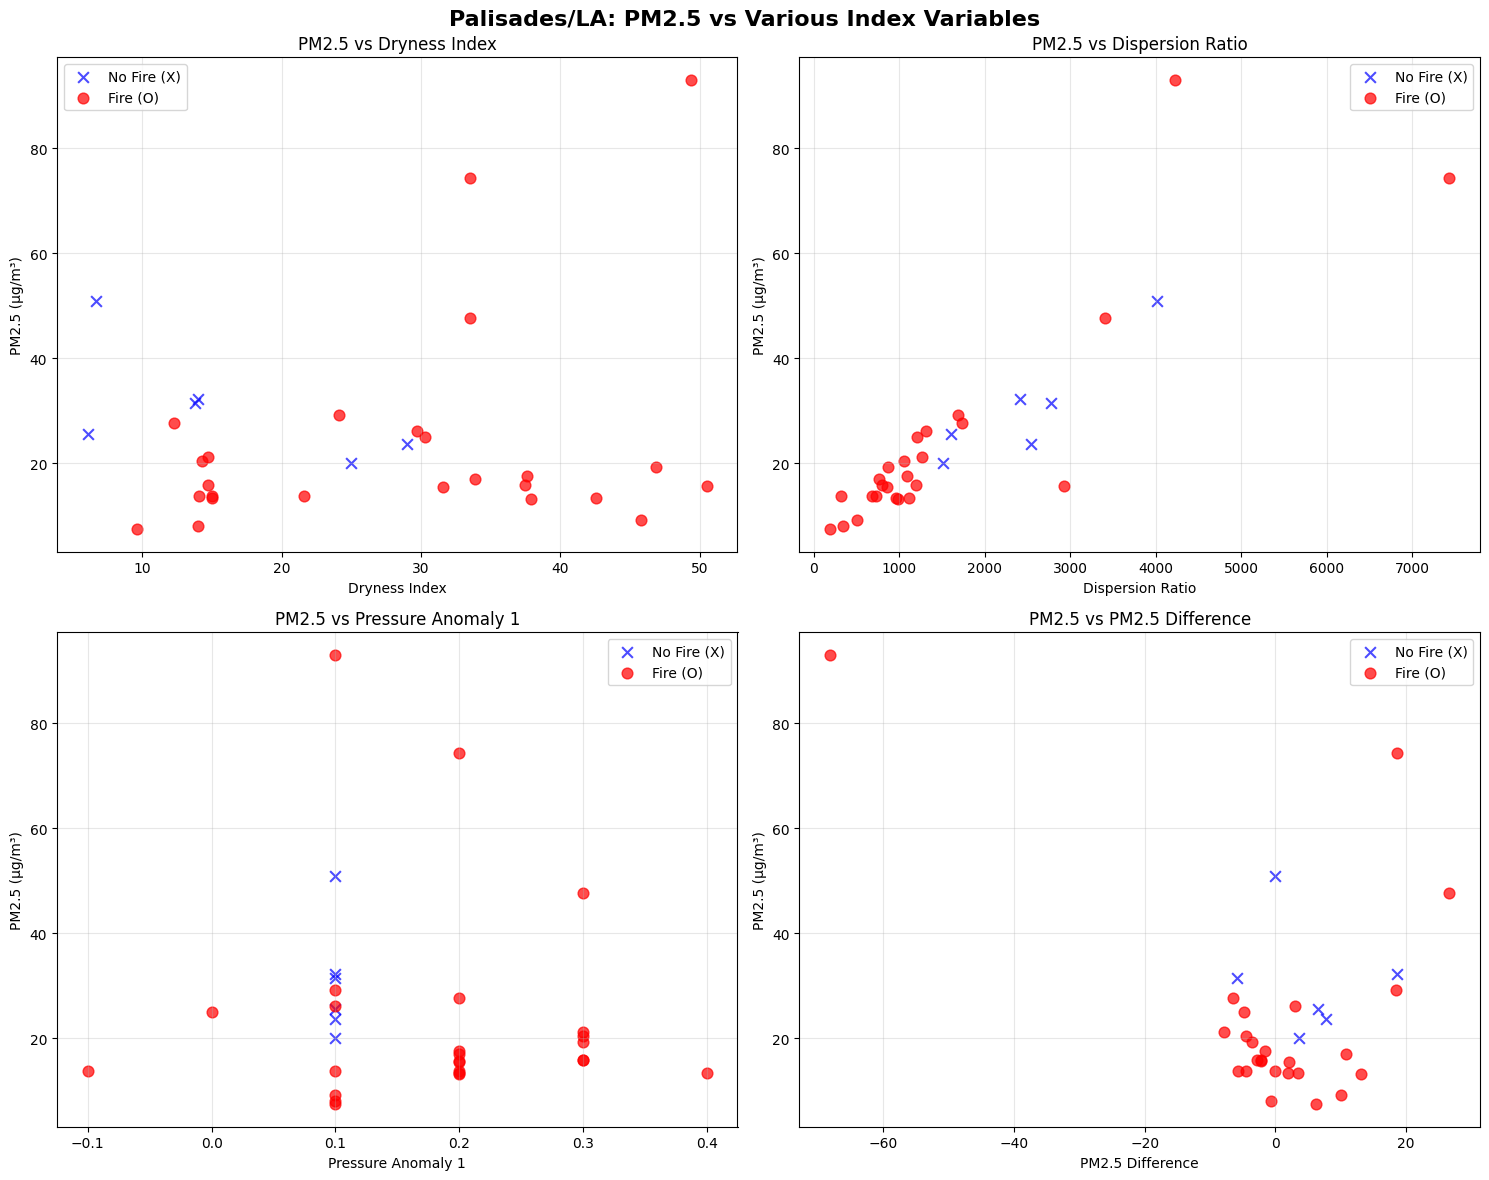

In [175]:
# Create separate scatter plots for Palisades/LA data: PM2.5 vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Palisades/LA: PM2.5 vs Various Index Variables', fontsize=16, fontweight='bold')

# Separate data by fire events for Palisades/LA
palisades_la_no_fire = palisades_la[palisades_la['Wildfire_Event'] == 0]
palisades_la_fire = palisades_la[palisades_la['Wildfire_Event'] == 1]

print(f"Palisades/LA data summary:")
print(f"Total records: {len(palisades_la)}")
print(f"No fire events: {len(palisades_la_no_fire)}")
print(f"Fire events: {len(palisades_la_fire)}")
print(f"PM2.5 range: {palisades_la['PM25_ug_m3'].min():.1f} to {palisades_la['PM25_ug_m3'].max():.1f} μg/m³")

# Plot 1: PM2.5 vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(palisades_la_no_fire['dryness_index '], palisades_la_no_fire['PM25_ug_m3'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(palisades_la_fire['dryness_index '], palisades_la_fire['PM25_ug_m3'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('PM2.5 (μg/m³)')
ax1.set_title('PM2.5 vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: PM2.5 vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(palisades_la_no_fire['dispersion_ratio'], palisades_la_no_fire['PM25_ug_m3'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(palisades_la_fire['dispersion_ratio'], palisades_la_fire['PM25_ug_m3'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('PM2.5 (μg/m³)')
ax2.set_title('PM2.5 vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: PM2.5 vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(palisades_la_no_fire['PressureAnomaly1'], palisades_la_no_fire['PM25_ug_m3'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(palisades_la_fire['PressureAnomaly1'], palisades_la_fire['PM25_ug_m3'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('PM2.5 (μg/m³)')
ax3.set_title('PM2.5 vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: PM2.5 vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(palisades_la_no_fire['pm25_difference'], palisades_la_no_fire['PM25_ug_m3'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(palisades_la_fire['pm25_difference'], palisades_la_fire['PM25_ug_m3'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('PM2.5 (μg/m³)')
ax4.set_title('PM2.5 vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [176]:
# Add correlation analysis and summary statistics for Palisades/LA PM2.5
print("\n=== PALISADES/LA PM2.5 CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = palisades_la['PM25_ug_m3'].corr(palisades_la[var])
    print(f"PM2.5 vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR PALISADES/LA PM2.5 ===")
print("PM2.5 levels:")
print(f"  No Fire - Mean: {palisades_la_no_fire['PM25_ug_m3'].mean():.2f}, Std: {palisades_la_no_fire['PM25_ug_m3'].std():.2f}")
print(f"  Fire    - Mean: {palisades_la_fire['PM25_ug_m3'].mean():.2f}, Std: {palisades_la_fire['PM25_ug_m3'].std():.2f}")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {palisades_la_no_fire[var].mean():.2f}, Std: {palisades_la_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {palisades_la_fire[var].mean():.2f}, Std: {palisades_la_fire[var].std():.2f}")

# Compare with Santa Rosa
print(f"\n=== COMPARISON: PALISADES/LA vs SANTA ROSA PM2.5 ===")
print(f"Palisades/LA PM2.5 mean: {palisades_la['PM25_ug_m3'].mean():.2f}")
print(f"Santa Rosa PM2.5 mean: {santa_rosa['PM25_ug_m3'].mean():.2f}")
print(f"Difference: {palisades_la['PM25_ug_m3'].mean() - santa_rosa['PM25_ug_m3'].mean():.2f}")

# Show PM2.5 ranges for fire vs no-fire events
print(f"\n=== PALISADES/LA PM2.5 RANGES ===")
print(f"No Fire Events - Min: {palisades_la_no_fire['PM25_ug_m3'].min():.1f}, Max: {palisades_la_no_fire['PM25_ug_m3'].max():.1f}")
print(f"Fire Events - Min: {palisades_la_fire['PM25_ug_m3'].min():.1f}, Max: {palisades_la_fire['PM25_ug_m3'].max():.1f}")

# Check fire event percentage
fire_percentage = (len(palisades_la_fire) / len(palisades_la)) * 100
print(f"\nFire event percentage in Palisades/LA: {fire_percentage:.1f}%")

# Compare fire percentages between locations
santa_rosa_fire_pct = (len(santa_rosa_fire) / len(santa_rosa)) * 100
print(f"Fire event percentage in Santa Rosa: {santa_rosa_fire_pct:.1f}%")
print(f"Difference: {fire_percentage - santa_rosa_fire_pct:.1f} percentage points")



=== PALISADES/LA PM2.5 CORRELATION ANALYSIS ===
PM2.5 vs dryness_index: r = 0.164
PM2.5 vs dispersion_ratio: r = 0.863
PM2.5 vs PressureAnomaly1: r = -0.078
PM2.5 vs pm25_difference: r = -0.377

=== FIRE vs NO-FIRE STATISTICS FOR PALISADES/LA PM2.5 ===
PM2.5 levels:
  No Fire - Mean: 30.65, Std: 10.94
  Fire    - Mean: 23.46, Std: 20.12

dryness_index:
  No Fire - Mean: 15.77, Std: 9.41
  Fire    - Mean: 28.40, Std: 13.16

dispersion_ratio:
  No Fire - Mean: 2475.13, Std: 914.21
  Fire    - Mean: 1506.80, Std: 1557.27

PressureAnomaly1:
  No Fire - Mean: 0.10, Std: 0.00
  Fire    - Mean: 0.18, Std: 0.11

pm25_difference:
  No Fire - Mean: 5.13, Std: 8.26
  Fire    - Mean: -0.01, Std: 16.74

=== COMPARISON: PALISADES/LA vs SANTA ROSA PM2.5 ===
Palisades/LA PM2.5 mean: 24.85
Santa Rosa PM2.5 mean: 14.44
Difference: 10.41

=== PALISADES/LA PM2.5 RANGES ===
No Fire Events - Min: 20.1, Max: 50.9
Fire Events - Min: 7.4, Max: 93.0

Fire event percentage in Palisades/LA: 80.6%
Fire event perc

Palisades/LA NOx_ppb data summary:
Total records: 31
No fire events: 6
Fire events: 25
NOx_ppb range: 0.01 to 0.18 ppb


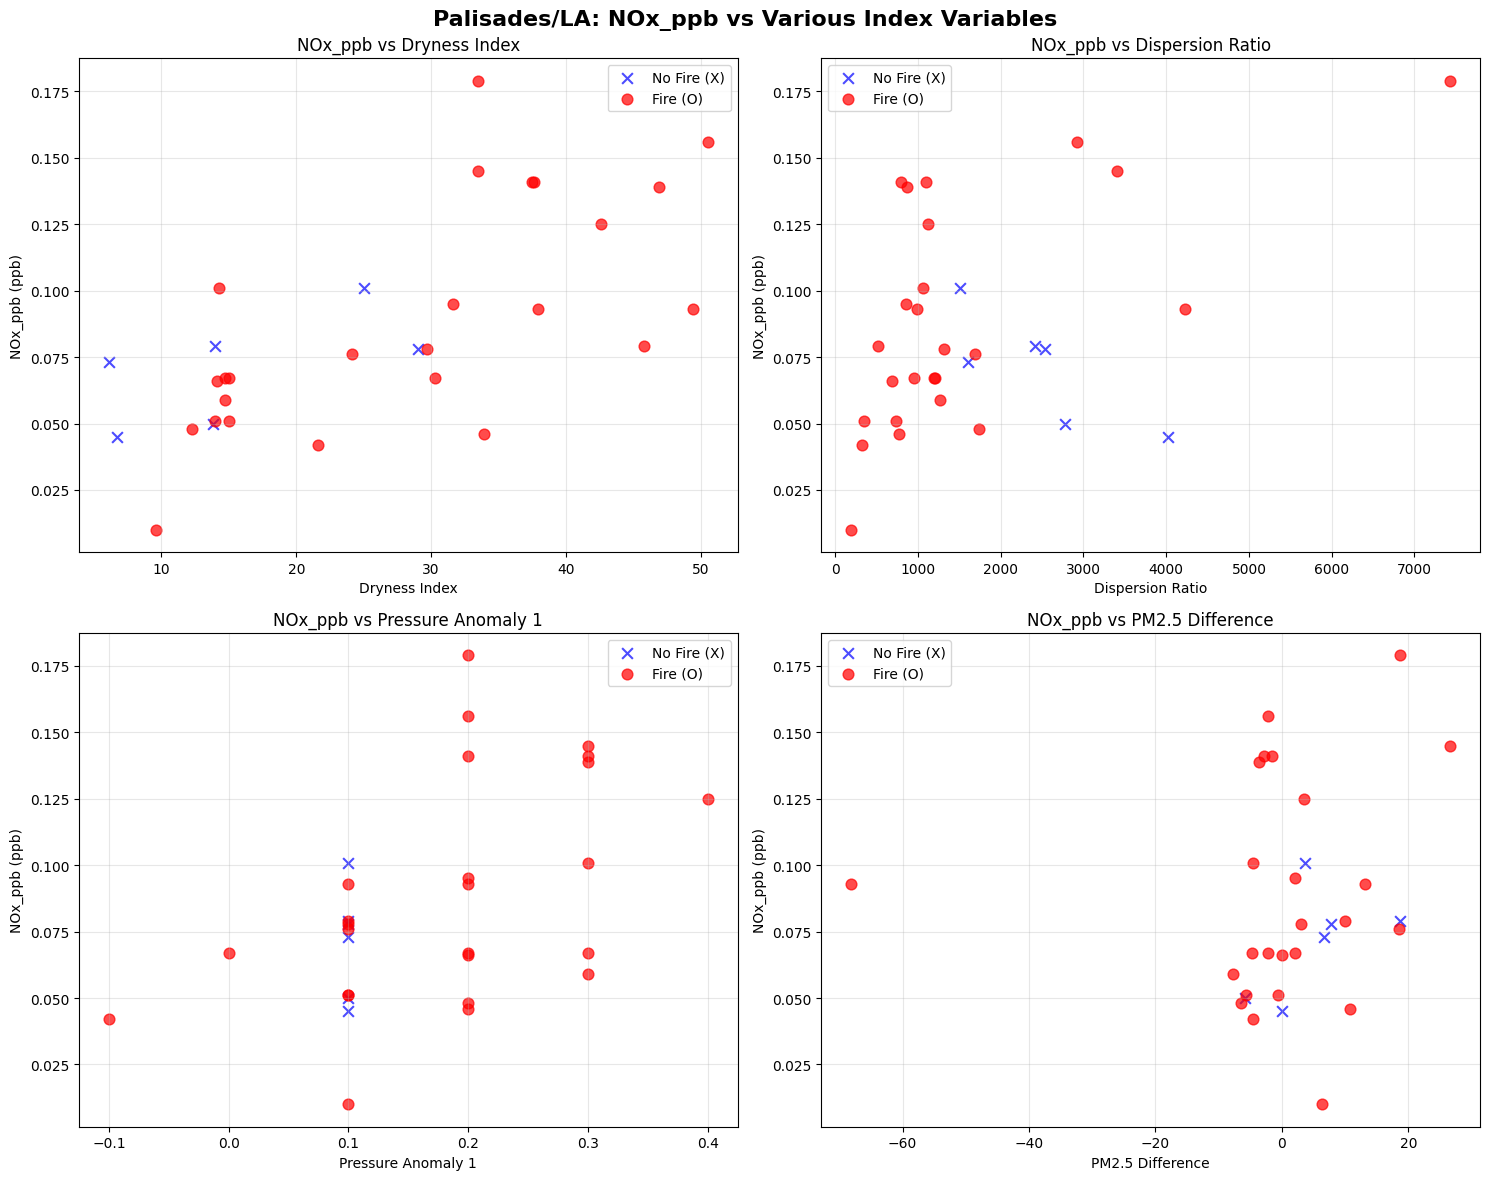

In [177]:
# Create separate scatter plots for Palisades/LA data: NOx_ppb vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Palisades/LA: NOx_ppb vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Palisades/LA NOx_ppb data summary:")
print(f"Total records: {len(palisades_la)}")
print(f"No fire events: {len(palisades_la_no_fire)}")
print(f"Fire events: {len(palisades_la_fire)}")
print(f"NOx_ppb range: {palisades_la['NOx_ppb'].min():.2f} to {palisades_la['NOx_ppb'].max():.2f} ppb")

# Plot 1: NOx_ppb vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(palisades_la_no_fire['dryness_index '], palisades_la_no_fire['NOx_ppb'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(palisades_la_fire['dryness_index '], palisades_la_fire['NOx_ppb'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('NOx_ppb (ppb)')
ax1.set_title('NOx_ppb vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: NOx_ppb vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(palisades_la_no_fire['dispersion_ratio'], palisades_la_no_fire['NOx_ppb'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(palisades_la_fire['dispersion_ratio'], palisades_la_fire['NOx_ppb'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('NOx_ppb (ppb)')
ax2.set_title('NOx_ppb vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: NOx_ppb vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(palisades_la_no_fire['PressureAnomaly1'], palisades_la_no_fire['NOx_ppb'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(palisades_la_fire['PressureAnomaly1'], palisades_la_fire['NOx_ppb'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('NOx_ppb (ppb)')
ax3.set_title('NOx_ppb vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: NOx_ppb vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(palisades_la_no_fire['pm25_difference'], palisades_la_no_fire['NOx_ppb'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(palisades_la_fire['pm25_difference'], palisades_la_fire['NOx_ppb'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('NOx_ppb (ppb)')
ax4.set_title('NOx_ppb vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [178]:
# Add correlation analysis and summary statistics for Palisades/LA NOx_ppb
print("\n=== PALISADES/LA NOx_ppb CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = palisades_la['NOx_ppb'].corr(palisades_la[var])
    print(f"NOx_ppb vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR PALISADES/LA NOx_ppb ===")
print("NOx_ppb levels:")
print(f"  No Fire - Mean: {palisades_la_no_fire['NOx_ppb'].mean():.2f}, Std: {palisades_la_no_fire['NOx_ppb'].std():.2f}")
print(f"  Fire    - Mean: {palisades_la_fire['NOx_ppb'].mean():.2f}, Std: {palisades_la_fire['NOx_ppb'].std():.2f}")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {palisades_la_no_fire[var].mean():.2f}, Std: {palisades_la_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {palisades_la_fire[var].mean():.2f}, Std: {palisades_la_fire[var].std():.2f}")

# Compare with Santa Rosa
print(f"\n=== COMPARISON: PALISADES/LA vs SANTA ROSA NOx_ppb ===")
print(f"Palisades/LA NOx_ppb mean: {palisades_la['NOx_ppb'].mean():.2f}")
print(f"Santa Rosa NOx_ppb mean: {santa_rosa['NOx_ppb'].mean():.2f}")
print(f"Difference: {palisades_la['NOx_ppb'].mean() - santa_rosa['NOx_ppb'].mean():.2f}")

# Compare NOx_ppb and PM2.5 correlations
print(f"\n=== COMPARISON: NOx_ppb vs PM2.5 CORRELATIONS IN PALISADES/LA ===")
print(f"PM2.5 vs NOx_ppb correlation: {palisades_la['PM25_ug_m3'].corr(palisades_la['NOx_ppb']):.3f}")

# Show NOx_ppb ranges for fire vs no-fire events
print(f"\n=== PALISADES/LA NOx_ppb RANGES ===")
print(f"No Fire Events - Min: {palisades_la_no_fire['NOx_ppb'].min():.2f}, Max: {palisades_la_no_fire['NOx_ppb'].max():.2f}")
print(f"Fire Events - Min: {palisades_la_fire['NOx_ppb'].min():.2f}, Max: {palisades_la_fire['NOx_ppb'].max():.2f}")

# Check if NOx_ppb patterns are similar to PM2.5
print(f"\n=== NOx_ppb vs PM2.5 PATTERN COMPARISON ===")
pm25_fire_diff = palisades_la_fire['PM25_ug_m3'].mean() - palisades_la_no_fire['PM25_ug_m3'].mean()
nox_fire_diff = palisades_la_fire['NOx_ppb'].mean() - palisades_la_no_fire['NOx_ppb'].mean()
print(f"PM2.5 fire vs no-fire difference: {pm25_fire_diff:.2f}")
print(f"NOx_ppb fire vs no-fire difference: {nox_fire_diff:.2f}")

if (pm25_fire_diff > 0 and nox_fire_diff > 0) or (pm25_fire_diff < 0 and nox_fire_diff < 0):
    print("✓ NOx_ppb and PM2.5 show similar fire vs no-fire patterns")
else:
    print("⚠ NOx_ppb and PM2.5 show different fire vs no-fire patterns")



=== PALISADES/LA NOx_ppb CORRELATION ANALYSIS ===
NOx_ppb vs dryness_index: r = 0.676
NOx_ppb vs dispersion_ratio: r = 0.444
NOx_ppb vs PressureAnomaly1: r = 0.508
NOx_ppb vs pm25_difference: r = 0.121

=== FIRE vs NO-FIRE STATISTICS FOR PALISADES/LA NOx_ppb ===
NOx_ppb levels:
  No Fire - Mean: 0.07, Std: 0.02
  Fire    - Mean: 0.09, Std: 0.04

dryness_index:
  No Fire - Mean: 15.77, Std: 9.41
  Fire    - Mean: 28.40, Std: 13.16

dispersion_ratio:
  No Fire - Mean: 2475.13, Std: 914.21
  Fire    - Mean: 1506.80, Std: 1557.27

PressureAnomaly1:
  No Fire - Mean: 0.10, Std: 0.00
  Fire    - Mean: 0.18, Std: 0.11

pm25_difference:
  No Fire - Mean: 5.13, Std: 8.26
  Fire    - Mean: -0.01, Std: 16.74

=== COMPARISON: PALISADES/LA vs SANTA ROSA NOx_ppb ===
Palisades/LA NOx_ppb mean: 0.09
Santa Rosa NOx_ppb mean: 15.96
Difference: -15.88

=== COMPARISON: NOx_ppb vs PM2.5 CORRELATIONS IN PALISADES/LA ===
PM2.5 vs NOx_ppb correlation: 0.280

=== PALISADES/LA NOx_ppb RANGES ===
No Fire Events

Palisades/LA Average Humidity data summary:
Total records: 31
No fire events: 6
Fire events: 25
Avg Humidity range: 18.2% to 88.8%


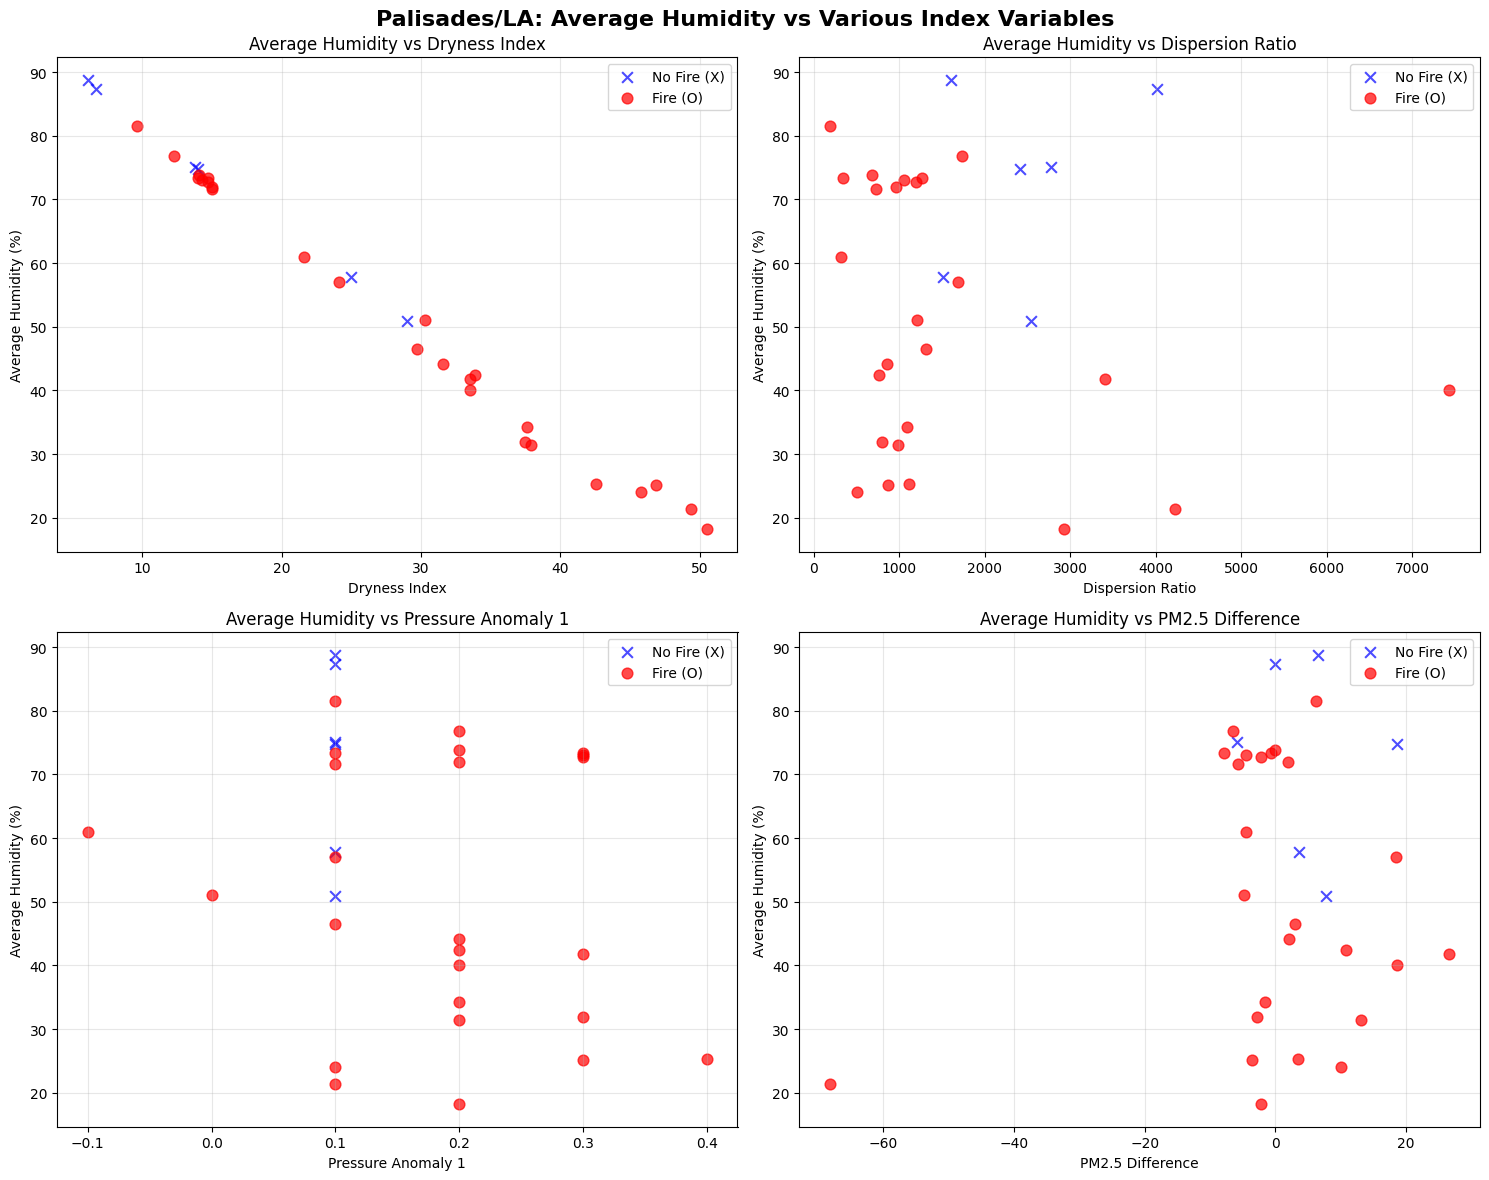

In [179]:
# Create separate scatter plots for Palisades/LA data: Avg_Humidity_Percent vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Palisades/LA: Average Humidity vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Palisades/LA Average Humidity data summary:")
print(f"Total records: {len(palisades_la)}")
print(f"No fire events: {len(palisades_la_no_fire)}")
print(f"Fire events: {len(palisades_la_fire)}")
print(f"Avg Humidity range: {palisades_la['Avg_Humidity_Percent'].min():.1f}% to {palisades_la['Avg_Humidity_Percent'].max():.1f}%")

# Plot 1: Avg_Humidity_Percent vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(palisades_la_no_fire['dryness_index '], palisades_la_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(palisades_la_fire['dryness_index '], palisades_la_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('Average Humidity (%)')
ax1.set_title('Average Humidity vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Avg_Humidity_Percent vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(palisades_la_no_fire['dispersion_ratio'], palisades_la_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(palisades_la_fire['dispersion_ratio'], palisades_la_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('Average Humidity (%)')
ax2.set_title('Average Humidity vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Avg_Humidity_Percent vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(palisades_la_no_fire['PressureAnomaly1'], palisades_la_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(palisades_la_fire['PressureAnomaly1'], palisades_la_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('Average Humidity (%)')
ax3.set_title('Average Humidity vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Avg_Humidity_Percent vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(palisades_la_no_fire['pm25_difference'], palisades_la_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(palisades_la_fire['pm25_difference'], palisades_la_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('Average Humidity (%)')
ax4.set_title('Average Humidity vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [180]:
# Add correlation analysis and summary statistics for Palisades/LA Average Humidity
print("\n=== PALISADES/LA AVERAGE HUMIDITY CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = palisades_la['Avg_Humidity_Percent'].corr(palisades_la[var])
    print(f"Avg_Humidity_Percent vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR PALISADES/LA AVERAGE HUMIDITY ===")
print("Average Humidity levels:")
print(f"  No Fire - Mean: {palisades_la_no_fire['Avg_Humidity_Percent'].mean():.1f}%, Std: {palisades_la_no_fire['Avg_Humidity_Percent'].std():.1f}%")
print(f"  Fire    - Mean: {palisades_la_fire['Avg_Humidity_Percent'].mean():.1f}%, Std: {palisades_la_fire['Avg_Humidity_Percent'].std():.1f}%")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {palisades_la_no_fire[var].mean():.2f}, Std: {palisades_la_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {palisades_la_fire[var].mean():.2f}, Std: {palisades_la_fire[var].std():.2f}")

# Compare with Santa Rosa
print(f"\n=== COMPARISON: PALISADES/LA vs SANTA ROSA AVERAGE HUMIDITY ===")
print(f"Palisades/LA Avg Humidity mean: {palisades_la['Avg_Humidity_Percent'].mean():.1f}%")
print(f"Santa Rosa Avg Humidity mean: {santa_rosa['Avg_Humidity_Percent'].mean():.1f}%")
print(f"Difference: {palisades_la['Avg_Humidity_Percent'].mean() - santa_rosa['Avg_Humidity_Percent'].mean():.1f}%")

# Compare humidity with other variables
print(f"\n=== COMPARISON: HUMIDITY vs OTHER VARIABLES IN PALISADES/LA ===")
print(f"Avg_Humidity vs PM2.5 correlation: {palisades_la['Avg_Humidity_Percent'].corr(palisades_la['PM25_ug_m3']):.3f}")
print(f"Avg_Humidity vs NOx_ppb correlation: {palisades_la['Avg_Humidity_Percent'].corr(palisades_la['NOx_ppb']):.3f}")

# Show humidity ranges for fire vs no-fire events
print(f"\n=== PALISADES/LA AVERAGE HUMIDITY RANGES ===")
print(f"No Fire Events - Min: {palisades_la_no_fire['Avg_Humidity_Percent'].min():.1f}%, Max: {palisades_la_no_fire['Avg_Humidity_Percent'].max():.1f}%")
print(f"Fire Events - Min: {palisades_la_fire['Avg_Humidity_Percent'].min():.1f}%, Max: {palisades_la_fire['Avg_Humidity_Percent'].max():.1f}%")

# Check relationship with dryness index (humidity should decrease dryness)
print(f"\n=== HUMIDITY vs DRYNESS RELATIONSHIP IN PALISADES/LA ===")
hum_dry_corr = palisades_la['Avg_Humidity_Percent'].corr(palisades_la['dryness_index '])
print(f"Expected: Higher humidity should correlate with lower dryness index")
print(f"Actual correlation: {hum_dry_corr:.3f}")
if hum_dry_corr < 0:
    print("✓ As expected: Higher humidity correlates with lower dryness index")
else:
    print("⚠ Unexpected: Higher humidity does not correlate with lower dryness index")

# Compare humidity patterns between locations
print(f"\n=== HUMIDITY PATTERN COMPARISON: PALISADES/LA vs SANTA ROSA ===")
palisades_hum_fire_diff = palisades_la_fire['Avg_Humidity_Percent'].mean() - palisades_la_no_fire['Avg_Humidity_Percent'].mean()
santa_rosa_hum_fire_diff = santa_rosa_fire['Avg_Humidity_Percent'].mean() - santa_rosa_no_fire['Avg_Humidity_Percent'].mean()
print(f"Palisades/LA humidity fire vs no-fire difference: {palisades_hum_fire_diff:.1f}%")
print(f"Santa Rosa humidity fire vs no-fire difference: {santa_rosa_hum_fire_diff:.1f}%")

if (palisades_hum_fire_diff > 0 and santa_rosa_hum_fire_diff > 0) or (palisades_hum_fire_diff < 0 and santa_rosa_hum_fire_diff < 0):
    print("✓ Both locations show similar humidity fire vs no-fire patterns")
else:
    print("⚠ Locations show different humidity fire vs no-fire patterns")



=== PALISADES/LA AVERAGE HUMIDITY CORRELATION ANALYSIS ===
Avg_Humidity_Percent vs dryness_index: r = -0.995
Avg_Humidity_Percent vs dispersion_ratio: r = -0.133
Avg_Humidity_Percent vs PressureAnomaly1: r = -0.265
Avg_Humidity_Percent vs pm25_difference: r = 0.121

=== FIRE vs NO-FIRE STATISTICS FOR PALISADES/LA AVERAGE HUMIDITY ===
Average Humidity levels:
  No Fire - Mean: 72.5%, Std: 15.4%
  Fire    - Mean: 50.6%, Std: 20.9%

dryness_index:
  No Fire - Mean: 15.77, Std: 9.41
  Fire    - Mean: 28.40, Std: 13.16

dispersion_ratio:
  No Fire - Mean: 2475.13, Std: 914.21
  Fire    - Mean: 1506.80, Std: 1557.27

PressureAnomaly1:
  No Fire - Mean: 0.10, Std: 0.00
  Fire    - Mean: 0.18, Std: 0.11

pm25_difference:
  No Fire - Mean: 5.13, Std: 8.26
  Fire    - Mean: -0.01, Std: 16.74

=== COMPARISON: PALISADES/LA vs SANTA ROSA AVERAGE HUMIDITY ===
Palisades/LA Avg Humidity mean: 54.8%
Santa Rosa Avg Humidity mean: 58.6%
Difference: -3.8%

=== COMPARISON: HUMIDITY vs OTHER VARIABLES IN P

Palisades/LA Average Temperature data summary:
Total records: 31
No fire events: 6
Fire events: 25
Avg Temperature range: 52.2°F to 62.9°F


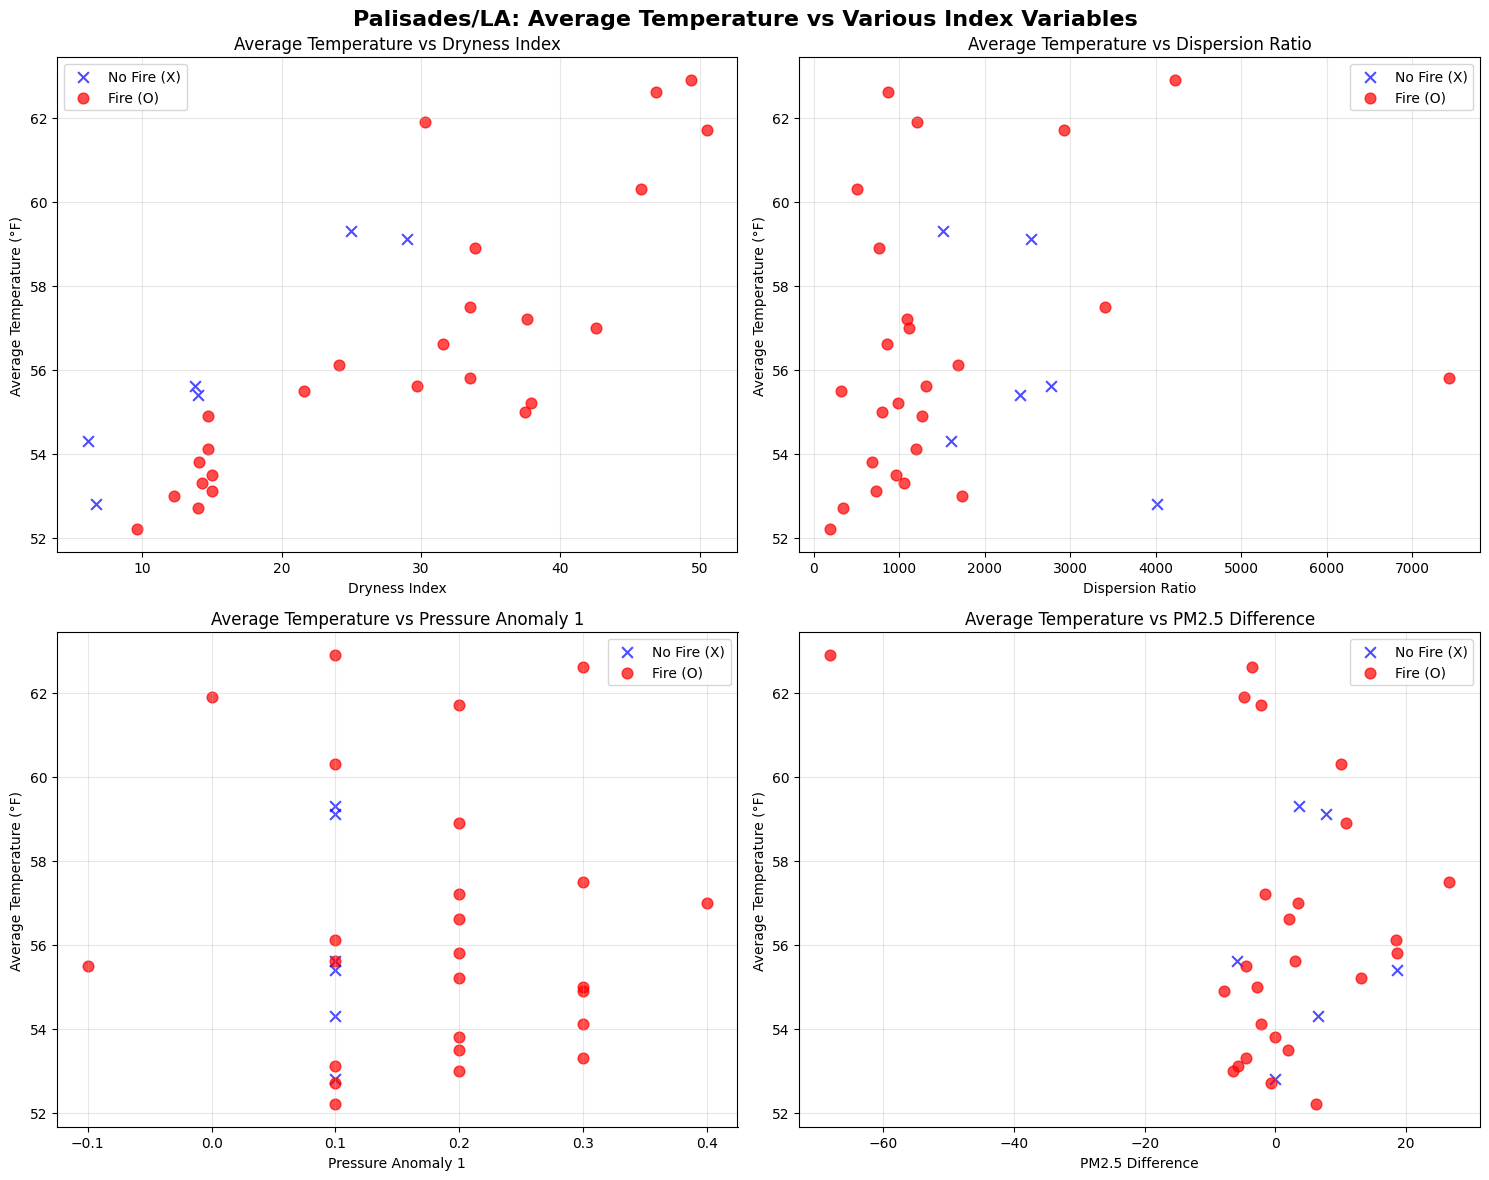

In [181]:
# Create separate scatter plots for Palisades/LA data: Avg_Temp_F vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Palisades/LA: Average Temperature vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Palisades/LA Average Temperature data summary:")
print(f"Total records: {len(palisades_la)}")
print(f"No fire events: {len(palisades_la_no_fire)}")
print(f"Fire events: {len(palisades_la_fire)}")
print(f"Avg Temperature range: {palisades_la['Avg_Temp_F'].min():.1f}°F to {palisades_la['Avg_Temp_F'].max():.1f}°F")

# Plot 1: Avg_Temp_F vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(palisades_la_no_fire['dryness_index '], palisades_la_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(palisades_la_fire['dryness_index '], palisades_la_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('Average Temperature (°F)')
ax1.set_title('Average Temperature vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Avg_Temp_F vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(palisades_la_no_fire['dispersion_ratio'], palisades_la_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(palisades_la_fire['dispersion_ratio'], palisades_la_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('Average Temperature (°F)')
ax2.set_title('Average Temperature vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Avg_Temp_F vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(palisades_la_no_fire['PressureAnomaly1'], palisades_la_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(palisades_la_fire['PressureAnomaly1'], palisades_la_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('Average Temperature (°F)')
ax3.set_title('Average Temperature vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Avg_Temp_F vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(palisades_la_no_fire['pm25_difference'], palisades_la_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(palisades_la_fire['pm25_difference'], palisades_la_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('Average Temperature (°F)')
ax4.set_title('Average Temperature vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [182]:
# Add correlation analysis and summary statistics for Palisades/LA Average Temperature
print("\n=== PALISADES/LA AVERAGE TEMPERATURE CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = palisades_la['Avg_Temp_F'].corr(palisades_la[var])
    print(f"Avg_Temp_F vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR PALISADES/LA AVERAGE TEMPERATURE ===")
print("Average Temperature levels:")
print(f"  No Fire - Mean: {palisades_la_no_fire['Avg_Temp_F'].mean():.1f}°F, Std: {palisades_la_no_fire['Avg_Temp_F'].std():.1f}°F")
print(f"  Fire    - Mean: {palisades_la_fire['Avg_Temp_F'].mean():.1f}°F, Std: {palisades_la_fire['Avg_Temp_F'].std():.1f}°F")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {palisades_la_no_fire[var].mean():.2f}, Std: {palisades_la_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {palisades_la_fire[var].mean():.2f}, Std: {palisades_la_fire[var].std():.2f}")

# Compare with Santa Rosa
print(f"\n=== COMPARISON: PALISADES/LA vs SANTA ROSA AVERAGE TEMPERATURE ===")
print(f"Palisades/LA Avg Temperature mean: {palisades_la['Avg_Temp_F'].mean():.1f}°F")
print(f"Santa Rosa Avg Temperature mean: {santa_rosa['Avg_Temp_F'].mean():.1f}°F")
print(f"Difference: {palisades_la['Avg_Temp_F'].mean() - santa_rosa['Avg_Temp_F'].mean():.1f}°F")

# Compare temperature with other variables
print(f"\n=== COMPARISON: TEMPERATURE vs OTHER VARIABLES IN PALISADES/LA ===")
print(f"Avg_Temp vs PM2.5 correlation: {palisades_la['Avg_Temp_F'].corr(palisades_la['PM25_ug_m3']):.3f}")
print(f"Avg_Temp vs NOx_ppb correlation: {palisades_la['Avg_Temp_F'].corr(palisades_la['NOx_ppb']):.3f}")
print(f"Avg_Temp vs Avg_Humidity correlation: {palisades_la['Avg_Temp_F'].corr(palisades_la['Avg_Humidity_Percent']):.3f}")

# Show temperature ranges for fire vs no-fire events
print(f"\n=== PALISADES/LA AVERAGE TEMPERATURE RANGES ===")
print(f"No Fire Events - Min: {palisades_la_no_fire['Avg_Temp_F'].min():.1f}°F, Max: {palisades_la_no_fire['Avg_Temp_F'].max():.1f}°F")
print(f"Fire Events - Min: {palisades_la_fire['Avg_Temp_F'].min():.1f}°F, Max: {palisades_la_fire['Avg_Temp_F'].max():.1f}°F")

# Check temperature patterns during fire events
print(f"\n=== TEMPERATURE FIRE PATTERNS IN PALISADES/LA ===")
if palisades_la_fire['Avg_Temp_F'].mean() > palisades_la_no_fire['Avg_Temp_F'].mean():
    print("✓ Fire events tend to occur during higher temperatures")
    print(f"  Difference: {palisades_la_fire['Avg_Temp_F'].mean() - palisades_la_no_fire['Avg_Temp_F'].mean():.1f}°F higher during fires")
else:
    print("⚠ Fire events tend to occur during lower temperatures")
    print(f"  Difference: {palisades_la_no_fire['Avg_Temp_F'].mean() - palisades_la_fire['Avg_Temp_F'].mean():.1f}°F lower during fires")

# Check relationship with dryness index (temperature should increase dryness)
print(f"\n=== TEMPERATURE vs DRYNESS RELATIONSHIP IN PALISADES/LA ===")
temp_dry_corr = palisades_la['Avg_Temp_F'].corr(palisades_la['dryness_index '])
print(f"Expected: Higher temperature should correlate with higher dryness index")
print(f"Actual correlation: {temp_dry_corr:.3f}")
if temp_dry_corr > 0:
    print("✓ As expected: Higher temperature correlates with higher dryness index")
else:
    print("⚠ Unexpected: Higher temperature does not correlate with higher dryness index")

# Check relationship with humidity (temperature should decrease humidity)
print(f"\n=== TEMPERATURE vs HUMIDITY RELATIONSHIP IN PALISADES/LA ===")
temp_hum_corr = palisades_la['Avg_Temp_F'].corr(palisades_la['Avg_Humidity_Percent'])
print(f"Expected: Higher temperature should correlate with lower humidity")
print(f"Actual correlation: {temp_hum_corr:.3f}")
if temp_hum_corr < 0:
    print("✓ As expected: Higher temperature correlates with lower humidity")
else:
    print("⚠ Unexpected: Higher temperature does not correlate with lower humidity")

# Compare temperature patterns between locations
print(f"\n=== TEMPERATURE PATTERN COMPARISON: PALISADES/LA vs SANTA ROSA ===")
palisades_temp_fire_diff = palisades_la_fire['Avg_Temp_F'].mean() - palisades_la_no_fire['Avg_Temp_F'].mean()
santa_rosa_temp_fire_diff = santa_rosa_fire['Avg_Temp_F'].mean() - santa_rosa_no_fire['Avg_Temp_F'].mean()
print(f"Palisades/LA temperature fire vs no-fire difference: {palisades_temp_fire_diff:.1f}°F")
print(f"Santa Rosa temperature fire vs no-fire difference: {santa_rosa_temp_fire_diff:.1f}°F")

if (palisades_temp_fire_diff > 0 and santa_rosa_temp_fire_diff > 0) or (palisades_temp_fire_diff < 0 and santa_rosa_temp_fire_diff < 0):
    print("✓ Both locations show similar temperature fire vs no-fire patterns")
else:
    print("⚠ Locations show different temperature fire vs no-fire patterns")



=== PALISADES/LA AVERAGE TEMPERATURE CORRELATION ANALYSIS ===
Avg_Temp_F vs dryness_index: r = 0.806
Avg_Temp_F vs dispersion_ratio: r = 0.174
Avg_Temp_F vs PressureAnomaly1: r = -0.049
Avg_Temp_F vs pm25_difference: r = -0.269

=== FIRE vs NO-FIRE STATISTICS FOR PALISADES/LA AVERAGE TEMPERATURE ===
Average Temperature levels:
  No Fire - Mean: 56.1°F, Std: 2.6°F
  Fire    - Mean: 56.4°F, Std: 3.3°F

dryness_index:
  No Fire - Mean: 15.77, Std: 9.41
  Fire    - Mean: 28.40, Std: 13.16

dispersion_ratio:
  No Fire - Mean: 2475.13, Std: 914.21
  Fire    - Mean: 1506.80, Std: 1557.27

PressureAnomaly1:
  No Fire - Mean: 0.10, Std: 0.00
  Fire    - Mean: 0.18, Std: 0.11

pm25_difference:
  No Fire - Mean: 5.13, Std: 8.26
  Fire    - Mean: -0.01, Std: 16.74

=== COMPARISON: PALISADES/LA vs SANTA ROSA AVERAGE TEMPERATURE ===
Palisades/LA Avg Temperature mean: 56.4°F
Santa Rosa Avg Temperature mean: 57.2°F
Difference: -0.9°F

=== COMPARISON: TEMPERATURE vs OTHER VARIABLES IN PALISADES/LA ===

Paradise/Butte data summary:
Total records: 30
No fire events: 12
Fire events: 18
PM2.5 range: 4.9 to 417.1 μg/m³


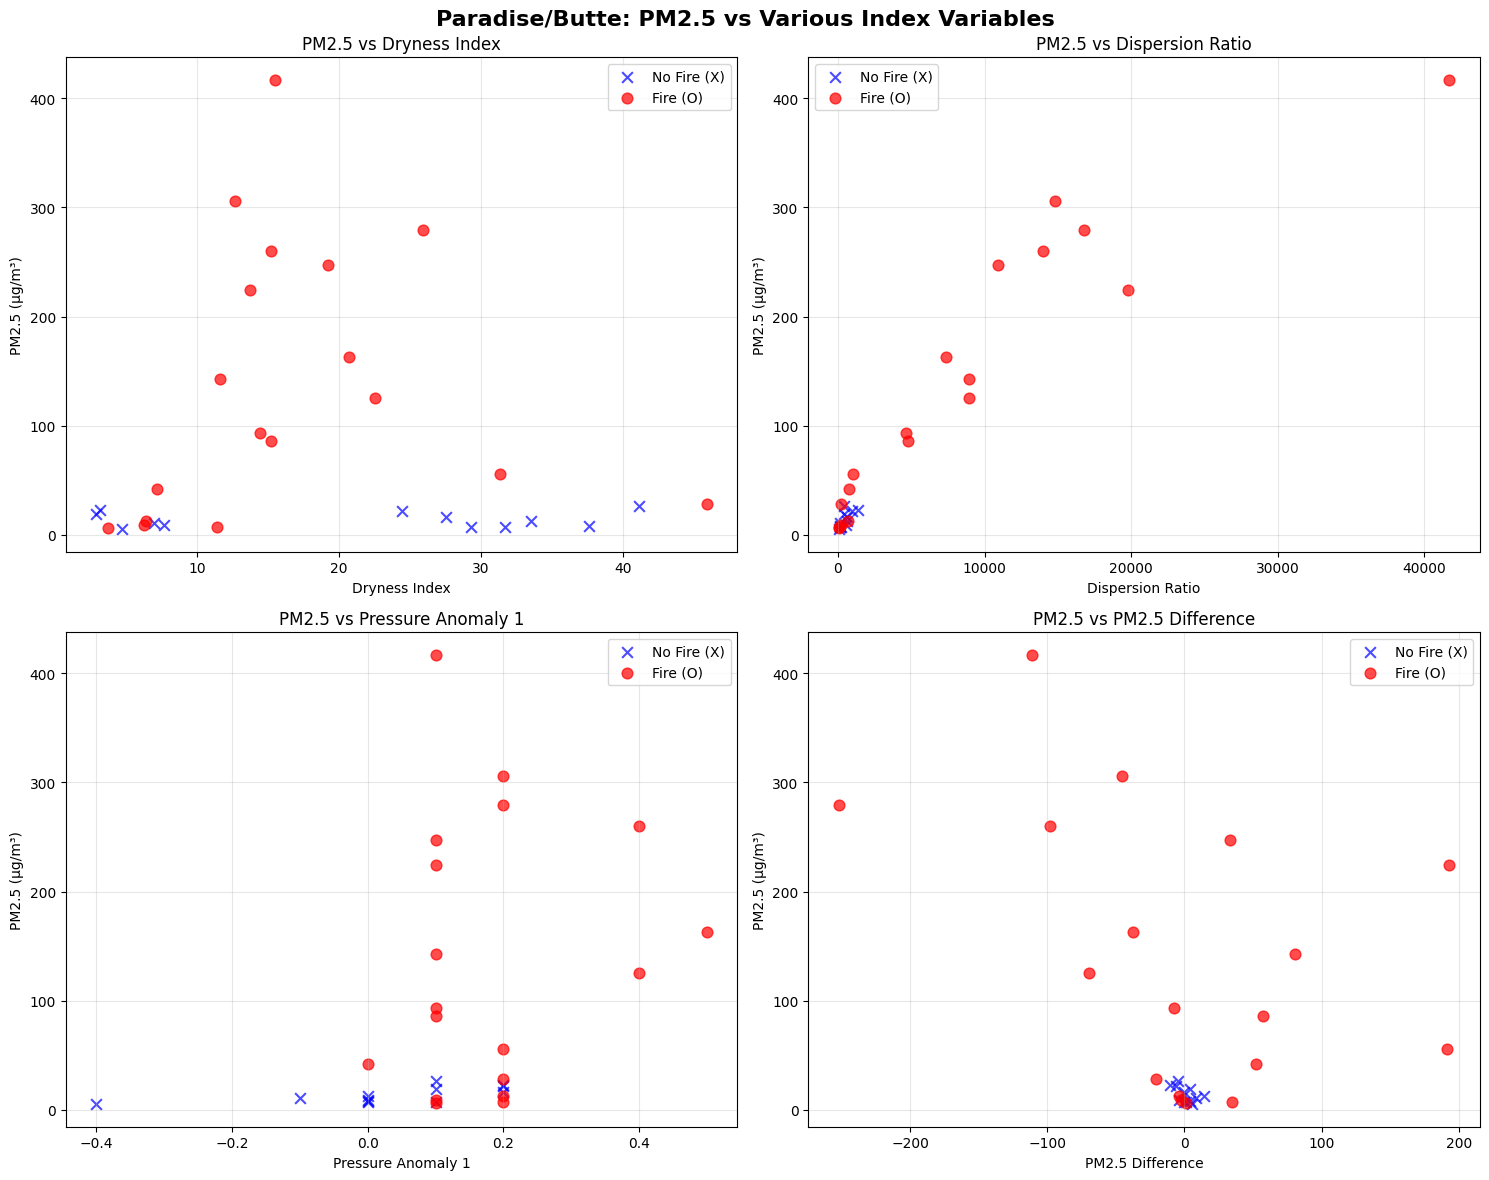

In [183]:
# Create separate scatter plots for Paradise/Butte data: PM2.5 vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Paradise/Butte: PM2.5 vs Various Index Variables', fontsize=16, fontweight='bold')

# Separate data by fire events for Paradise/Butte
paradise_butte_no_fire = paradise_butte[paradise_butte['Wildfire_Event'] == 0]
paradise_butte_fire = paradise_butte[paradise_butte['Wildfire_Event'] == 1]

print(f"Paradise/Butte data summary:")
print(f"Total records: {len(paradise_butte)}")
print(f"No fire events: {len(paradise_butte_no_fire)}")
print(f"Fire events: {len(paradise_butte_fire)}")
print(f"PM2.5 range: {paradise_butte['PM25_ug_m3'].min():.1f} to {paradise_butte['PM25_ug_m3'].max():.1f} μg/m³")

# Plot 1: PM2.5 vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(paradise_butte_no_fire['dryness_index '], paradise_butte_no_fire['PM25_ug_m3'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(paradise_butte_fire['dryness_index '], paradise_butte_fire['PM25_ug_m3'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('PM2.5 (μg/m³)')
ax1.set_title('PM2.5 vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: PM2.5 vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(paradise_butte_no_fire['dispersion_ratio'], paradise_butte_no_fire['PM25_ug_m3'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(paradise_butte_fire['dispersion_ratio'], paradise_butte_fire['PM25_ug_m3'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('PM2.5 (μg/m³)')
ax2.set_title('PM2.5 vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: PM2.5 vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(paradise_butte_no_fire['PressureAnomaly1'], paradise_butte_no_fire['PM25_ug_m3'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(paradise_butte_fire['PressureAnomaly1'], paradise_butte_fire['PM25_ug_m3'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('PM2.5 (μg/m³)')
ax3.set_title('PM2.5 vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: PM2.5 vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(paradise_butte_no_fire['pm25_difference'], paradise_butte_no_fire['PM25_ug_m3'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(paradise_butte_fire['pm25_difference'], paradise_butte_fire['PM25_ug_m3'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('PM2.5 (μg/m³)')
ax4.set_title('PM2.5 vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [184]:
# Add correlation analysis and summary statistics for Paradise/Butte PM2.5
print("\n=== PARADISE/BUTTE PM2.5 CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = paradise_butte['PM25_ug_m3'].corr(paradise_butte[var])
    print(f"PM2.5 vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR PARADISE/BUTTE PM2.5 ===")
print("PM2.5 levels:")
print(f"  No Fire - Mean: {paradise_butte_no_fire['PM25_ug_m3'].mean():.2f}, Std: {paradise_butte_no_fire['PM25_ug_m3'].std():.2f}")
print(f"  Fire    - Mean: {paradise_butte_fire['PM25_ug_m3'].mean():.2f}, Std: {paradise_butte_fire['PM25_ug_m3'].std():.2f}")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {paradise_butte_no_fire[var].mean():.2f}, Std: {paradise_butte_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {paradise_butte_fire[var].mean():.2f}, Std: {paradise_butte_fire[var].std():.2f}")

# Compare with other locations
print(f"\n=== COMPARISON: PARADISE/BUTTE vs OTHER LOCATIONS PM2.5 ===")
print(f"Paradise/Butte PM2.5 mean: {paradise_butte['PM25_ug_m3'].mean():.2f}")
print(f"Santa Rosa PM2.5 mean: {santa_rosa['PM25_ug_m3'].mean():.2f}")
print(f"Palisades/LA PM2.5 mean: {palisades_la['PM25_ug_m3'].mean():.2f}")
print(f"Difference from Santa Rosa: {paradise_butte['PM25_ug_m3'].mean() - santa_rosa['PM25_ug_m3'].mean():.2f}")
print(f"Difference from Palisades/LA: {paradise_butte['PM25_ug_m3'].mean() - palisades_la['PM25_ug_m3'].mean():.2f}")

# Show PM2.5 ranges for fire vs no-fire events
print(f"\n=== PARADISE/BUTTE PM2.5 RANGES ===")
print(f"No Fire Events - Min: {paradise_butte_no_fire['PM25_ug_m3'].min():.1f}, Max: {paradise_butte_no_fire['PM25_ug_m3'].max():.1f}")
print(f"Fire Events - Min: {paradise_butte_fire['PM25_ug_m3'].min():.1f}, Max: {paradise_butte_fire['PM25_ug_m3'].max():.1f}")

# Check fire event percentage
fire_percentage = (len(paradise_butte_fire) / len(paradise_butte)) * 100
print(f"\nFire event percentage in Paradise/Butte: {fire_percentage:.1f}%")

# Compare fire percentages between all locations
santa_rosa_fire_pct = (len(santa_rosa_fire) / len(santa_rosa)) * 100
palisades_la_fire_pct = (len(palisades_la_fire) / len(palisades_la)) * 100
print(f"Fire event percentages:")
print(f"  Santa Rosa: {santa_rosa_fire_pct:.1f}%")
print(f"  Palisades/LA: {palisades_la_fire_pct:.1f}%")
print(f"  Paradise/Butte: {fire_percentage:.1f}%")

# Check if Paradise/Butte has the highest PM2.5 levels during fires
print(f"\n=== FIRE EVENT PM2.5 COMPARISON ===")
fire_means = {
    'Santa Rosa': santa_rosa_fire['PM25_ug_m3'].mean(),
    'Palisades/LA': palisades_la_fire['PM25_ug_m3'].mean(),
    'Paradise/Butte': paradise_butte_fire['PM25_ug_m3'].mean()
}
highest_fire_location = max(fire_means, key=fire_means.get)
print(f"Highest PM2.5 during fire events: {highest_fire_location} ({fire_means[highest_fire_location]:.1f})")
print(f"Paradise/Butte fire PM2.5: {fire_means['Paradise/Butte']:.1f}")
print(f"Santa Rosa fire PM2.5: {fire_means['Santa Rosa']:.1f}")
print(f"Palisades/LA fire PM2.5: {fire_means['Palisades/LA']:.1f}")



=== PARADISE/BUTTE PM2.5 CORRELATION ANALYSIS ===
PM2.5 vs dryness_index: r = -0.049
PM2.5 vs dispersion_ratio: r = 0.934
PM2.5 vs PressureAnomaly1: r = 0.341
PM2.5 vs pm25_difference: r = -0.352

=== FIRE vs NO-FIRE STATISTICS FOR PARADISE/BUTTE PM2.5 ===
PM2.5 levels:
  No Fire - Mean: 13.79, Std: 7.23
  Fire    - Mean: 139.06, Std: 124.02

dryness_index:
  No Fire - Mean: 20.88, Std: 14.63
  Fire    - Mean: 16.60, Std: 10.20

dispersion_ratio:
  No Fire - Mean: 469.01, Std: 389.51
  Fire    - Mean: 8644.89, Std: 10463.40

PressureAnomaly1:
  No Fire - Mean: 0.03, Std: 0.17
  Fire    - Mean: 0.18, Std: 0.13

pm25_difference:
  No Fire - Mean: 1.01, Std: 6.80
  Fire    - Mean: -0.29, Std: 103.72

=== COMPARISON: PARADISE/BUTTE vs OTHER LOCATIONS PM2.5 ===
Paradise/Butte PM2.5 mean: 88.95
Santa Rosa PM2.5 mean: 14.44
Palisades/LA PM2.5 mean: 24.85
Difference from Santa Rosa: 74.51
Difference from Palisades/LA: 64.10

=== PARADISE/BUTTE PM2.5 RANGES ===
No Fire Events - Min: 4.9, Max: 

Paradise/Butte NOx_ppb data summary:
Total records: 30
No fire events: 12
Fire events: 18
NOx_ppb range: 0.00 to 0.06 ppb


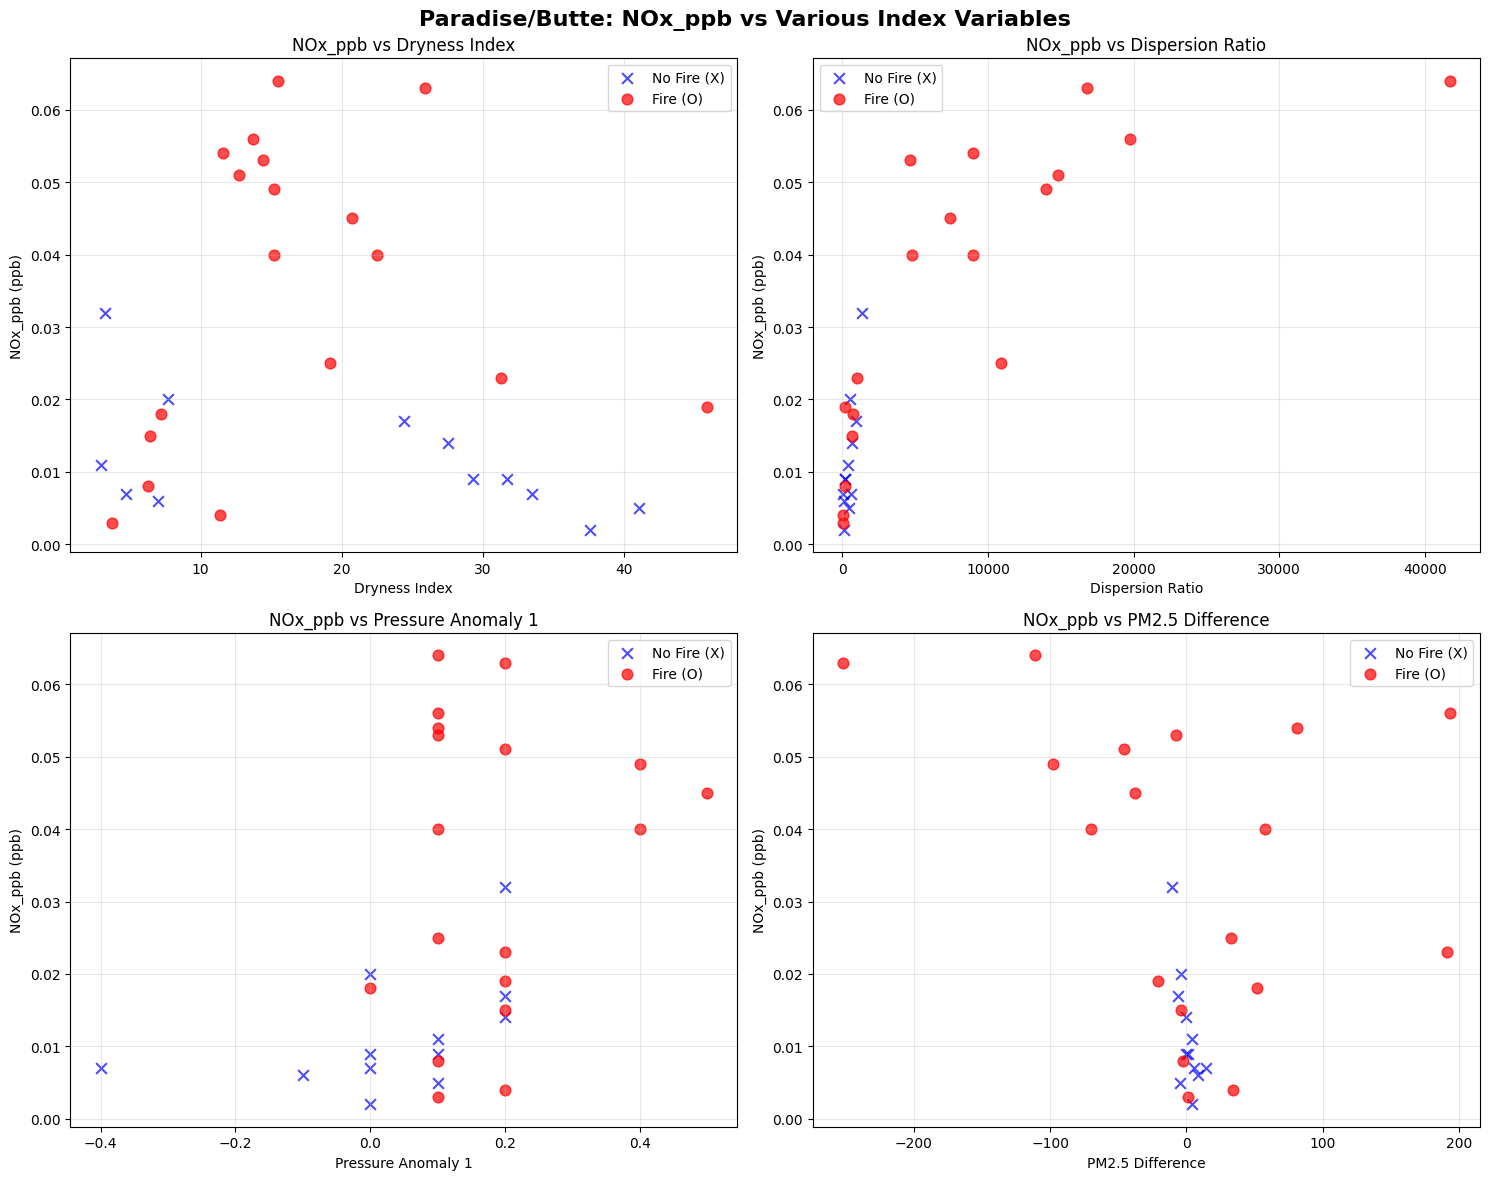

In [185]:
# Create separate scatter plots for Paradise/Butte data: NOx_ppb vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Paradise/Butte: NOx_ppb vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Paradise/Butte NOx_ppb data summary:")
print(f"Total records: {len(paradise_butte)}")
print(f"No fire events: {len(paradise_butte_no_fire)}")
print(f"Fire events: {len(paradise_butte_fire)}")
print(f"NOx_ppb range: {paradise_butte['NOx_ppb'].min():.2f} to {paradise_butte['NOx_ppb'].max():.2f} ppb")

# Plot 1: NOx_ppb vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(paradise_butte_no_fire['dryness_index '], paradise_butte_no_fire['NOx_ppb'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(paradise_butte_fire['dryness_index '], paradise_butte_fire['NOx_ppb'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('NOx_ppb (ppb)')
ax1.set_title('NOx_ppb vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: NOx_ppb vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(paradise_butte_no_fire['dispersion_ratio'], paradise_butte_no_fire['NOx_ppb'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(paradise_butte_fire['dispersion_ratio'], paradise_butte_fire['NOx_ppb'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('NOx_ppb (ppb)')
ax2.set_title('NOx_ppb vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: NOx_ppb vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(paradise_butte_no_fire['PressureAnomaly1'], paradise_butte_no_fire['NOx_ppb'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(paradise_butte_fire['PressureAnomaly1'], paradise_butte_fire['NOx_ppb'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('NOx_ppb (ppb)')
ax3.set_title('NOx_ppb vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: NOx_ppb vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(paradise_butte_no_fire['pm25_difference'], paradise_butte_no_fire['NOx_ppb'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(paradise_butte_fire['pm25_difference'], paradise_butte_fire['NOx_ppb'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('NOx_ppb (ppb)')
ax4.set_title('NOx_ppb vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [186]:
# Add correlation analysis and summary statistics for Paradise/Butte NOx_ppb
print("\n=== PARADISE/BUTTE NOx_ppb CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = paradise_butte['NOx_ppb'].corr(paradise_butte[var])
    print(f"NOx_ppb vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR PARADISE/BUTTE NOx_ppb ===")
print("NOx_ppb levels:")
print(f"  No Fire - Mean: {paradise_butte_no_fire['NOx_ppb'].mean():.2f}, Std: {paradise_butte_no_fire['NOx_ppb'].std():.2f}")
print(f"  Fire    - Mean: {paradise_butte_fire['NOx_ppb'].mean():.2f}, Std: {paradise_butte_fire['NOx_ppb'].std():.2f}")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {paradise_butte_no_fire[var].mean():.2f}, Std: {paradise_butte_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {paradise_butte_fire[var].mean():.2f}, Std: {paradise_butte_fire[var].std():.2f}")

# Compare with other locations
print(f"\n=== COMPARISON: PARADISE/BUTTE vs OTHER LOCATIONS NOx_ppb ===")
print(f"Paradise/Butte NOx_ppb mean: {paradise_butte['NOx_ppb'].mean():.2f}")
print(f"Santa Rosa NOx_ppb mean: {santa_rosa['NOx_ppb'].mean():.2f}")
print(f"Palisades/LA NOx_ppb mean: {palisades_la['NOx_ppb'].mean():.2f}")
print(f"Difference from Santa Rosa: {paradise_butte['NOx_ppb'].mean() - santa_rosa['NOx_ppb'].mean():.2f}")
print(f"Difference from Palisades/LA: {paradise_butte['NOx_ppb'].mean() - palisades_la['NOx_ppb'].mean():.2f}")

# Compare NOx_ppb and PM2.5 correlations
print(f"\n=== COMPARISON: NOx_ppb vs PM2.5 CORRELATIONS IN PARADISE/BUTTE ===")
print(f"PM2.5 vs NOx_ppb correlation: {paradise_butte['PM25_ug_m3'].corr(paradise_butte['NOx_ppb']):.3f}")

# Show NOx_ppb ranges for fire vs no-fire events
print(f"\n=== PARADISE/BUTTE NOx_ppb RANGES ===")
print(f"No Fire Events - Min: {paradise_butte_no_fire['NOx_ppb'].min():.2f}, Max: {paradise_butte_no_fire['NOx_ppb'].max():.2f}")
print(f"Fire Events - Min: {paradise_butte_fire['NOx_ppb'].min():.2f}, Max: {paradise_butte_fire['NOx_ppb'].max():.2f}")

# Check if NOx_ppb patterns are similar to PM2.5
print(f"\n=== NOx_ppb vs PM2.5 PATTERN COMPARISON IN PARADISE/BUTTE ===")
pm25_fire_diff = paradise_butte_fire['PM25_ug_m3'].mean() - paradise_butte_no_fire['PM25_ug_m3'].mean()
nox_fire_diff = paradise_butte_fire['NOx_ppb'].mean() - paradise_butte_no_fire['NOx_ppb'].mean()
print(f"PM2.5 fire vs no-fire difference: {pm25_fire_diff:.2f}")
print(f"NOx_ppb fire vs no-fire difference: {nox_fire_diff:.2f}")

if (pm25_fire_diff > 0 and nox_fire_diff > 0) or (pm25_fire_diff < 0 and nox_fire_diff < 0):
    print("✓ NOx_ppb and PM2.5 show similar fire vs no-fire patterns")
else:
    print("⚠ NOx_ppb and PM2.5 show different fire vs no-fire patterns")

# Compare NOx_ppb patterns across all locations
print(f"\n=== NOx_ppb FIRE EVENT COMPARISON ACROSS LOCATIONS ===")
nox_fire_means = {
    'Santa Rosa': santa_rosa_fire['NOx_ppb'].mean(),
    'Palisades/LA': palisades_la_fire['NOx_ppb'].mean(),
    'Paradise/Butte': paradise_butte_fire['NOx_ppb'].mean()
}
highest_nox_location = max(nox_fire_means, key=nox_fire_means.get)
print(f"Highest NOx_ppb during fire events: {highest_nox_location} ({nox_fire_means[highest_nox_location]:.2f})")
print(f"Paradise/Butte fire NOx_ppb: {nox_fire_means['Paradise/Butte']:.2f}")
print(f"Santa Rosa fire NOx_ppb: {nox_fire_means['Santa Rosa']:.2f}")
print(f"Palisades/LA fire NOx_ppb: {nox_fire_means['Palisades/LA']:.2f}")



=== PARADISE/BUTTE NOx_ppb CORRELATION ANALYSIS ===
NOx_ppb vs dryness_index: r = -0.118
NOx_ppb vs dispersion_ratio: r = 0.788
NOx_ppb vs PressureAnomaly1: r = 0.424
NOx_ppb vs pm25_difference: r = -0.259

=== FIRE vs NO-FIRE STATISTICS FOR PARADISE/BUTTE NOx_ppb ===
NOx_ppb levels:
  No Fire - Mean: 0.01, Std: 0.01
  Fire    - Mean: 0.04, Std: 0.02

dryness_index:
  No Fire - Mean: 20.88, Std: 14.63
  Fire    - Mean: 16.60, Std: 10.20

dispersion_ratio:
  No Fire - Mean: 469.01, Std: 389.51
  Fire    - Mean: 8644.89, Std: 10463.40

PressureAnomaly1:
  No Fire - Mean: 0.03, Std: 0.17
  Fire    - Mean: 0.18, Std: 0.13

pm25_difference:
  No Fire - Mean: 1.01, Std: 6.80
  Fire    - Mean: -0.29, Std: 103.72

=== COMPARISON: PARADISE/BUTTE vs OTHER LOCATIONS NOx_ppb ===
Paradise/Butte NOx_ppb mean: 0.03
Santa Rosa NOx_ppb mean: 15.96
Palisades/LA NOx_ppb mean: 0.09
Difference from Santa Rosa: -15.94
Difference from Palisades/LA: -0.06

=== COMPARISON: NOx_ppb vs PM2.5 CORRELATIONS IN PAR

Paradise/Butte Average Humidity data summary:
Total records: 30
No fire events: 12
Fire events: 18
Avg Humidity range: 22.9% to 94.5%


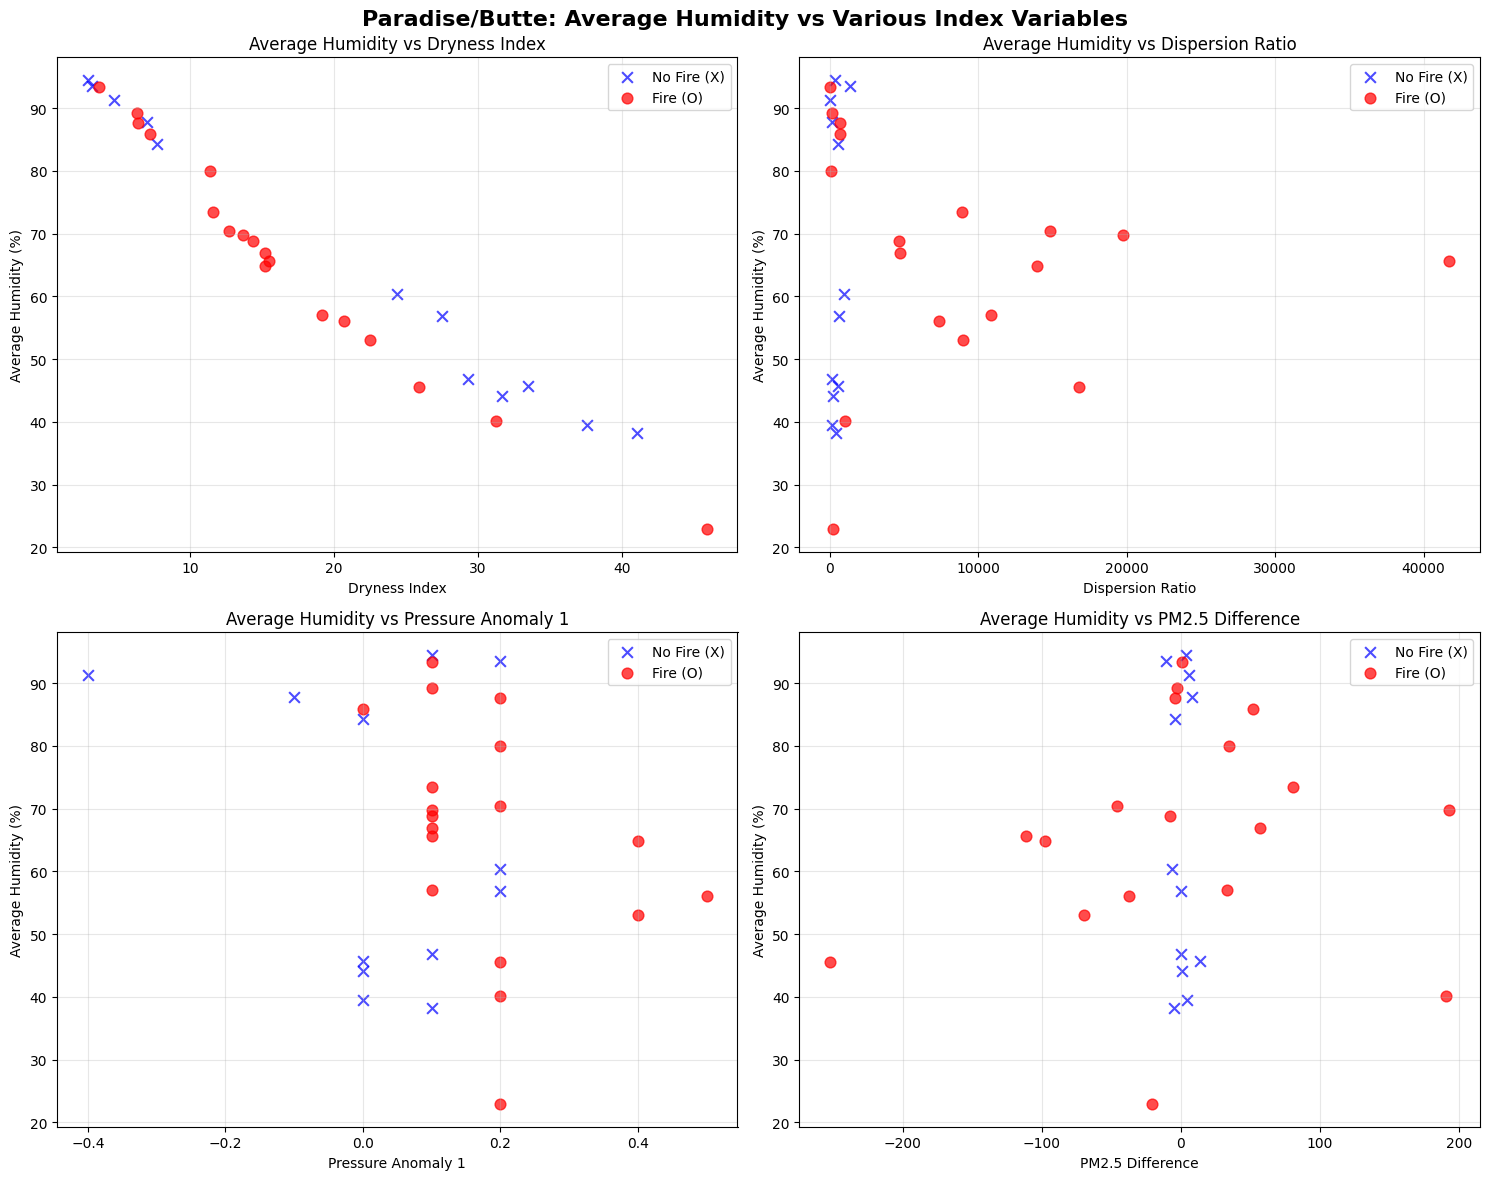

In [187]:
# Create separate scatter plots for Paradise/Butte data: Avg_Humidity_Percent vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Paradise/Butte: Average Humidity vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Paradise/Butte Average Humidity data summary:")
print(f"Total records: {len(paradise_butte)}")
print(f"No fire events: {len(paradise_butte_no_fire)}")
print(f"Fire events: {len(paradise_butte_fire)}")
print(f"Avg Humidity range: {paradise_butte['Avg_Humidity_Percent'].min():.1f}% to {paradise_butte['Avg_Humidity_Percent'].max():.1f}%")

# Plot 1: Avg_Humidity_Percent vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(paradise_butte_no_fire['dryness_index '], paradise_butte_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(paradise_butte_fire['dryness_index '], paradise_butte_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('Average Humidity (%)')
ax1.set_title('Average Humidity vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Avg_Humidity_Percent vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(paradise_butte_no_fire['dispersion_ratio'], paradise_butte_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(paradise_butte_fire['dispersion_ratio'], paradise_butte_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('Average Humidity (%)')
ax2.set_title('Average Humidity vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Avg_Humidity_Percent vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(paradise_butte_no_fire['PressureAnomaly1'], paradise_butte_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(paradise_butte_fire['PressureAnomaly1'], paradise_butte_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('Average Humidity (%)')
ax3.set_title('Average Humidity vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Avg_Humidity_Percent vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(paradise_butte_no_fire['pm25_difference'], paradise_butte_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(paradise_butte_fire['pm25_difference'], paradise_butte_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('Average Humidity (%)')
ax4.set_title('Average Humidity vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [188]:
# Add correlation analysis and summary statistics for Paradise/Butte Average Humidity
print("\n=== PARADISE/BUTTE AVERAGE HUMIDITY CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = paradise_butte['Avg_Humidity_Percent'].corr(paradise_butte[var])
    print(f"Avg_Humidity_Percent vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR PARADISE/BUTTE AVERAGE HUMIDITY ===")
print("Average Humidity levels:")
print(f"  No Fire - Mean: {paradise_butte_no_fire['Avg_Humidity_Percent'].mean():.1f}%, Std: {paradise_butte_no_fire['Avg_Humidity_Percent'].std():.1f}%")
print(f"  Fire    - Mean: {paradise_butte_fire['Avg_Humidity_Percent'].mean():.1f}%, Std: {paradise_butte_fire['Avg_Humidity_Percent'].std():.1f}%")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {paradise_butte_no_fire[var].mean():.2f}, Std: {paradise_butte_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {paradise_butte_fire[var].mean():.2f}, Std: {paradise_butte_fire[var].std():.2f}")

# Compare with other locations
print(f"\n=== COMPARISON: PARADISE/BUTTE vs OTHER LOCATIONS AVERAGE HUMIDITY ===")
print(f"Paradise/Butte Avg Humidity mean: {paradise_butte['Avg_Humidity_Percent'].mean():.1f}%")
print(f"Santa Rosa Avg Humidity mean: {santa_rosa['Avg_Humidity_Percent'].mean():.1f}%")
print(f"Palisades/LA Avg Humidity mean: {palisades_la['Avg_Humidity_Percent'].mean():.1f}%")
print(f"Difference from Santa Rosa: {paradise_butte['Avg_Humidity_Percent'].mean() - santa_rosa['Avg_Humidity_Percent'].mean():.1f}%")
print(f"Difference from Palisades/LA: {paradise_butte['Avg_Humidity_Percent'].mean() - palisades_la['Avg_Humidity_Percent'].mean():.1f}%")

# Compare humidity with other variables
print(f"\n=== COMPARISON: HUMIDITY vs OTHER VARIABLES IN PARADISE/BUTTE ===")
print(f"Avg_Humidity vs PM2.5 correlation: {paradise_butte['Avg_Humidity_Percent'].corr(paradise_butte['PM25_ug_m3']):.3f}")
print(f"Avg_Humidity vs NOx_ppb correlation: {paradise_butte['Avg_Humidity_Percent'].corr(paradise_butte['NOx_ppb']):.3f}")

# Show humidity ranges for fire vs no-fire events
print(f"\n=== PARADISE/BUTTE AVERAGE HUMIDITY RANGES ===")
print(f"No Fire Events - Min: {paradise_butte_no_fire['Avg_Humidity_Percent'].min():.1f}%, Max: {paradise_butte_no_fire['Avg_Humidity_Percent'].max():.1f}%")
print(f"Fire Events - Min: {paradise_butte_fire['Avg_Humidity_Percent'].min():.1f}%, Max: {paradise_butte_fire['Avg_Humidity_Percent'].max():.1f}%")

# Check relationship with dryness index (humidity should decrease dryness)
print(f"\n=== HUMIDITY vs DRYNESS RELATIONSHIP IN PARADISE/BUTTE ===")
hum_dry_corr = paradise_butte['Avg_Humidity_Percent'].corr(paradise_butte['dryness_index '])
print(f"Expected: Higher humidity should correlate with lower dryness index")
print(f"Actual correlation: {hum_dry_corr:.3f}")
if hum_dry_corr < 0:
    print("✓ As expected: Higher humidity correlates with lower dryness index")
else:
    print("⚠ Unexpected: Higher humidity does not correlate with lower dryness index")

# Compare humidity patterns between all locations
print(f"\n=== HUMIDITY PATTERN COMPARISON ACROSS ALL LOCATIONS ===")
hum_fire_diffs = {
    'Santa Rosa': santa_rosa_fire['Avg_Humidity_Percent'].mean() - santa_rosa_no_fire['Avg_Humidity_Percent'].mean(),
    'Palisades/LA': palisades_la_fire['Avg_Humidity_Percent'].mean() - palisades_la_no_fire['Avg_Humidity_Percent'].mean(),
    'Paradise/Butte': paradise_butte_fire['Avg_Humidity_Percent'].mean() - paradise_butte_no_fire['Avg_Humidity_Percent'].mean()
}

print(f"Humidity fire vs no-fire differences:")
for location, diff in hum_fire_diffs.items():
    print(f"  {location}: {diff:.1f}%")

# Check if all locations show similar patterns
all_positive = all(diff > 0 for diff in hum_fire_diffs.values())
all_negative = all(diff < 0 for diff in hum_fire_diffs.values())
if all_positive or all_negative:
    print("✓ All locations show similar humidity fire vs no-fire patterns")
else:
    print("⚠ Locations show different humidity fire vs no-fire patterns")

# Check which location has the most extreme humidity difference
most_extreme_location = max(hum_fire_diffs, key=lambda x: abs(hum_fire_diffs[x]))
print(f"Most extreme humidity fire vs no-fire difference: {most_extreme_location} ({hum_fire_diffs[most_extreme_location]:.1f}%)")



=== PARADISE/BUTTE AVERAGE HUMIDITY CORRELATION ANALYSIS ===
Avg_Humidity_Percent vs dryness_index: r = -0.972
Avg_Humidity_Percent vs dispersion_ratio: r = -0.074
Avg_Humidity_Percent vs PressureAnomaly1: r = -0.275
Avg_Humidity_Percent vs pm25_difference: r = 0.100

=== FIRE vs NO-FIRE STATISTICS FOR PARADISE/BUTTE AVERAGE HUMIDITY ===
Average Humidity levels:
  No Fire - Mean: 65.3%, Std: 23.1%
  Fire    - Mean: 66.1%, Std: 18.4%

dryness_index:
  No Fire - Mean: 20.88, Std: 14.63
  Fire    - Mean: 16.60, Std: 10.20

dispersion_ratio:
  No Fire - Mean: 469.01, Std: 389.51
  Fire    - Mean: 8644.89, Std: 10463.40

PressureAnomaly1:
  No Fire - Mean: 0.03, Std: 0.17
  Fire    - Mean: 0.18, Std: 0.13

pm25_difference:
  No Fire - Mean: 1.01, Std: 6.80
  Fire    - Mean: -0.29, Std: 103.72

=== COMPARISON: PARADISE/BUTTE vs OTHER LOCATIONS AVERAGE HUMIDITY ===
Paradise/Butte Avg Humidity mean: 65.8%
Santa Rosa Avg Humidity mean: 58.6%
Palisades/LA Avg Humidity mean: 54.8%
Difference fro

Paradise/Butte Average Temperature data summary:
Total records: 30
No fire events: 12
Fire events: 18
Avg Temperature range: 43.0°F to 66.6°F


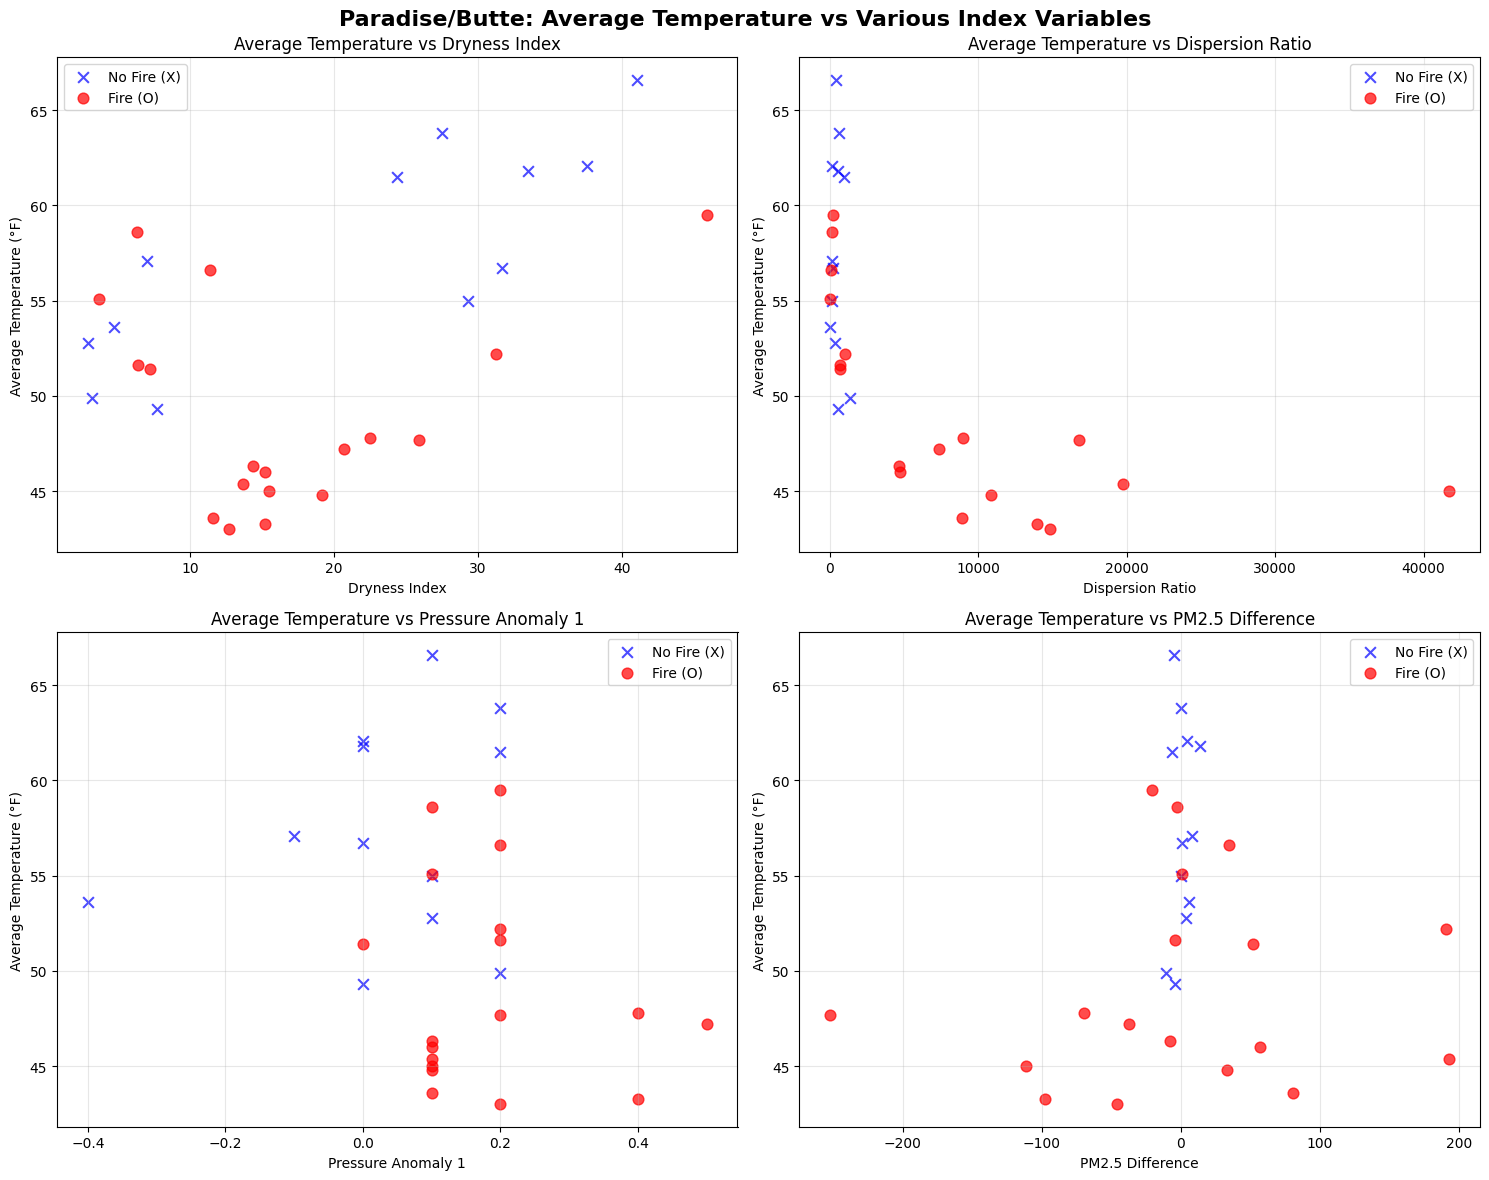

In [189]:
# Create separate scatter plots for Paradise/Butte data: Avg_Temp_F vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Paradise/Butte: Average Temperature vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Paradise/Butte Average Temperature data summary:")
print(f"Total records: {len(paradise_butte)}")
print(f"No fire events: {len(paradise_butte_no_fire)}")
print(f"Fire events: {len(paradise_butte_fire)}")
print(f"Avg Temperature range: {paradise_butte['Avg_Temp_F'].min():.1f}°F to {paradise_butte['Avg_Temp_F'].max():.1f}°F")

# Plot 1: Avg_Temp_F vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(paradise_butte_no_fire['dryness_index '], paradise_butte_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(paradise_butte_fire['dryness_index '], paradise_butte_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('Average Temperature (°F)')
ax1.set_title('Average Temperature vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Avg_Temp_F vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(paradise_butte_no_fire['dispersion_ratio'], paradise_butte_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(paradise_butte_fire['dispersion_ratio'], paradise_butte_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('Average Temperature (°F)')
ax2.set_title('Average Temperature vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Avg_Temp_F vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(paradise_butte_no_fire['PressureAnomaly1'], paradise_butte_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(paradise_butte_fire['PressureAnomaly1'], paradise_butte_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('Average Temperature (°F)')
ax3.set_title('Average Temperature vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Avg_Temp_F vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(paradise_butte_no_fire['pm25_difference'], paradise_butte_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(paradise_butte_fire['pm25_difference'], paradise_butte_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('Average Temperature (°F)')
ax4.set_title('Average Temperature vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [190]:
# Add correlation analysis and summary statistics for Paradise/Butte Average Temperature
print("\n=== PARADISE/BUTTE AVERAGE TEMPERATURE CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = paradise_butte['Avg_Temp_F'].corr(paradise_butte[var])
    print(f"Avg_Temp_F vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR PARADISE/BUTTE AVERAGE TEMPERATURE ===")
print("Average Temperature levels:")
print(f"  No Fire - Mean: {paradise_butte_no_fire['Avg_Temp_F'].mean():.1f}°F, Std: {paradise_butte_no_fire['Avg_Temp_F'].std():.1f}°F")
print(f"  Fire    - Mean: {paradise_butte_fire['Avg_Temp_F'].mean():.1f}°F, Std: {paradise_butte_fire['Avg_Temp_F'].std():.1f}°F")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {paradise_butte_no_fire[var].mean():.2f}, Std: {paradise_butte_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {paradise_butte_fire[var].mean():.2f}, Std: {paradise_butte_fire[var].std():.2f}")

# Compare with other locations
print(f"\n=== COMPARISON: PARADISE/BUTTE vs OTHER LOCATIONS AVERAGE TEMPERATURE ===")
print(f"Paradise/Butte Avg Temperature mean: {paradise_butte['Avg_Temp_F'].mean():.1f}°F")
print(f"Santa Rosa Avg Temperature mean: {santa_rosa['Avg_Temp_F'].mean():.1f}°F")
print(f"Palisades/LA Avg Temperature mean: {palisades_la['Avg_Temp_F'].mean():.1f}°F")
print(f"Difference from Santa Rosa: {paradise_butte['Avg_Temp_F'].mean() - santa_rosa['Avg_Temp_F'].mean():.1f}°F")
print(f"Difference from Palisades/LA: {paradise_butte['Avg_Temp_F'].mean() - palisades_la['Avg_Temp_F'].mean():.1f}°F")

# Compare temperature with other variables
print(f"\n=== COMPARISON: TEMPERATURE vs OTHER VARIABLES IN PARADISE/BUTTE ===")
print(f"Avg_Temp vs PM2.5 correlation: {paradise_butte['Avg_Temp_F'].corr(paradise_butte['PM25_ug_m3']):.3f}")
print(f"Avg_Temp vs NOx_ppb correlation: {paradise_butte['Avg_Temp_F'].corr(paradise_butte['NOx_ppb']):.3f}")
print(f"Avg_Temp vs Avg_Humidity correlation: {paradise_butte['Avg_Temp_F'].corr(paradise_butte['Avg_Humidity_Percent']):.3f}")

# Show temperature ranges for fire vs no-fire events
print(f"\n=== PARADISE/BUTTE AVERAGE TEMPERATURE RANGES ===")
print(f"No Fire Events - Min: {paradise_butte_no_fire['Avg_Temp_F'].min():.1f}°F, Max: {paradise_butte_no_fire['Avg_Temp_F'].max():.1f}°F")
print(f"Fire Events - Min: {paradise_butte_fire['Avg_Temp_F'].min():.1f}°F, Max: {paradise_butte_fire['Avg_Temp_F'].max():.1f}°F")

# Check relationship with dryness index (temperature should increase dryness)
print(f"\n=== TEMPERATURE vs DRYNESS RELATIONSHIP IN PARADISE/BUTTE ===")
temp_dry_corr = paradise_butte['Avg_Temp_F'].corr(paradise_butte['dryness_index '])
print(f"Expected: Higher temperature should correlate with higher dryness index")
print(f"Actual correlation: {temp_dry_corr:.3f}")
if temp_dry_corr > 0:
    print("✓ As expected: Higher temperature correlates with higher dryness index")
else:
    print("⚠ Unexpected: Higher temperature does not correlate with higher dryness index")

# Compare temperature patterns between all locations
print(f"\n=== TEMPERATURE PATTERN COMPARISON ACROSS ALL LOCATIONS ===")
temp_fire_diffs = {
    'Santa Rosa': santa_rosa_fire['Avg_Temp_F'].mean() - santa_rosa_no_fire['Avg_Temp_F'].mean(),
    'Palisades/LA': palisades_la_fire['Avg_Temp_F'].mean() - palisades_la_no_fire['Avg_Temp_F'].mean(),
    'Paradise/Butte': paradise_butte_fire['Avg_Temp_F'].mean() - paradise_butte_no_fire['Avg_Temp_F'].mean()
}

print(f"Temperature fire vs no-fire differences:")
for location, diff in temp_fire_diffs.items():
    print(f"  {location}: {diff:.1f}°F")

# Check if all locations show similar patterns
all_positive = all(diff > 0 for diff in temp_fire_diffs.values())
all_negative = all(diff < 0 for diff in temp_fire_diffs.values())
if all_positive or all_negative:
    print("✓ All locations show similar temperature fire vs no-fire patterns")
else:
    print("⚠ Locations show different temperature fire vs no-fire patterns")

# Check which location has the most extreme temperature difference
most_extreme_location = max(temp_fire_diffs, key=lambda x: abs(temp_fire_diffs[x]))
print(f"Most extreme temperature fire vs no-fire difference: {most_extreme_location} ({temp_fire_diffs[most_extreme_location]:.1f}°F)")

# Check temperature-humidity relationship (should be negative)
print(f"\n=== TEMPERATURE vs HUMIDITY RELATIONSHIP IN PARADISE/BUTTE ===")
temp_hum_corr = paradise_butte['Avg_Temp_F'].corr(paradise_butte['Avg_Humidity_Percent'])
print(f"Expected: Higher temperature should correlate with lower humidity")
print(f"Actual correlation: {temp_hum_corr:.3f}")
if temp_hum_corr < 0:
    print("✓ As expected: Higher temperature correlates with lower humidity")
else:
    print("⚠ Unexpected: Higher temperature does not correlate with lower humidity")

# Check which location has the highest temperatures during fire events
print(f"\n=== FIRE EVENT TEMPERATURE COMPARISON ===")
fire_temp_means = {
    'Santa Rosa': santa_rosa_fire['Avg_Temp_F'].mean(),
    'Palisades/LA': palisades_la_fire['Avg_Temp_F'].mean(),
    'Paradise/Butte': paradise_butte_fire['Avg_Temp_F'].mean()
}
hottest_fire_location = max(fire_temp_means, key=fire_temp_means.get)
print(f"Hottest location during fire events: {hottest_fire_location} ({fire_temp_means[hottest_fire_location]:.1f}°F)")
print(f"Paradise/Butte fire temperature: {fire_temp_means['Paradise/Butte']:.1f}°F")
print(f"Santa Rosa fire temperature: {fire_temp_means['Santa Rosa']:.1f}°F")
print(f"Palisades/LA fire temperature: {fire_temp_means['Palisades/LA']:.1f}°F")



=== PARADISE/BUTTE AVERAGE TEMPERATURE CORRELATION ANALYSIS ===
Avg_Temp_F vs dryness_index: r = 0.473
Avg_Temp_F vs dispersion_ratio: r = -0.612
Avg_Temp_F vs PressureAnomaly1: r = -0.262
Avg_Temp_F vs pm25_difference: r = 0.080

=== FIRE vs NO-FIRE STATISTICS FOR PARADISE/BUTTE AVERAGE TEMPERATURE ===
Average Temperature levels:
  No Fire - Mean: 57.5°F, Std: 5.6°F
  Fire    - Mean: 49.2°F, Std: 5.3°F

dryness_index:
  No Fire - Mean: 20.88, Std: 14.63
  Fire    - Mean: 16.60, Std: 10.20

dispersion_ratio:
  No Fire - Mean: 469.01, Std: 389.51
  Fire    - Mean: 8644.89, Std: 10463.40

PressureAnomaly1:
  No Fire - Mean: 0.03, Std: 0.17
  Fire    - Mean: 0.18, Std: 0.13

pm25_difference:
  No Fire - Mean: 1.01, Std: 6.80
  Fire    - Mean: -0.29, Std: 103.72

=== COMPARISON: PARADISE/BUTTE vs OTHER LOCATIONS AVERAGE TEMPERATURE ===
Paradise/Butte Avg Temperature mean: 52.5°F
Santa Rosa Avg Temperature mean: 57.2°F
Palisades/LA Avg Temperature mean: 56.4°F
Difference from Santa Rosa: -

Paradise/Butte Average Wind Speed data summary:
Total records: 30
No fire events: 12
Fire events: 18
Avg Wind Speed range: 1.4 mph to 20.0 mph


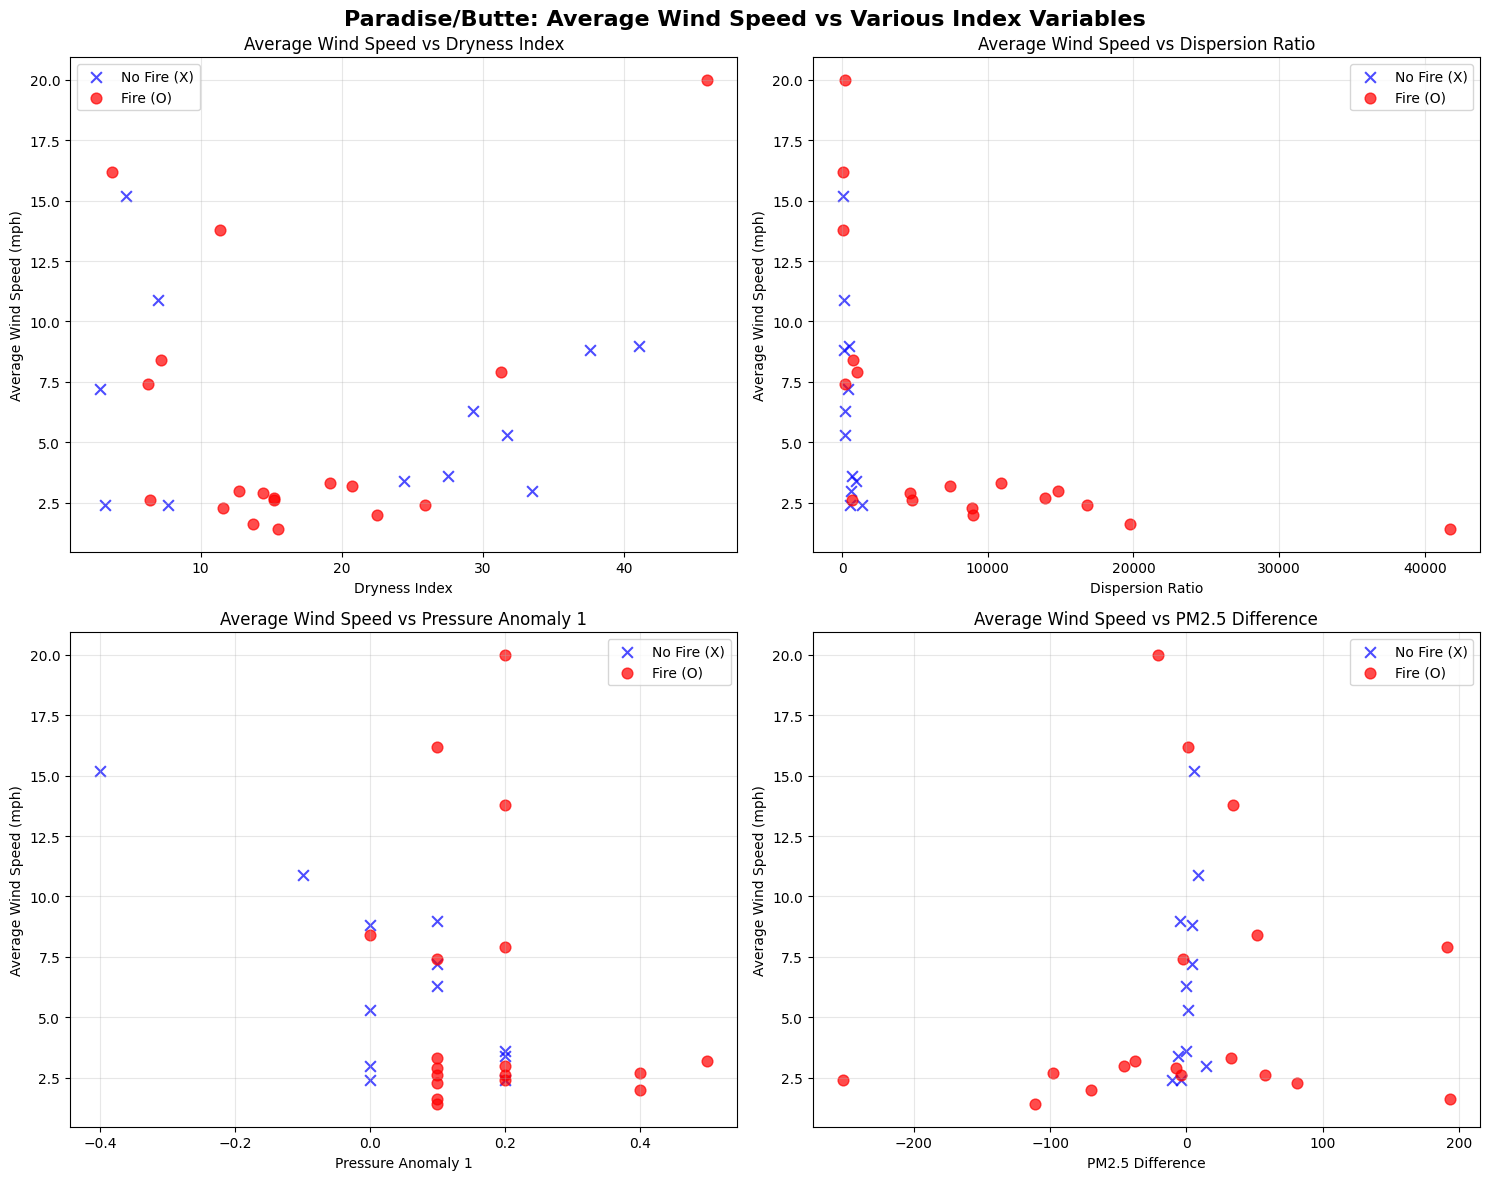

In [191]:
# Create separate scatter plots for Paradise/Butte data: Avg_Wind_Speed_mph vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Paradise/Butte: Average Wind Speed vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Paradise/Butte Average Wind Speed data summary:")
print(f"Total records: {len(paradise_butte)}")
print(f"No fire events: {len(paradise_butte_no_fire)}")
print(f"Fire events: {len(paradise_butte_fire)}")
print(f"Avg Wind Speed range: {paradise_butte['Avg_Wind_Speed_mph'].min():.1f} mph to {paradise_butte['Avg_Wind_Speed_mph'].max():.1f} mph")

# Plot 1: Avg_Wind_Speed_mph vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(paradise_butte_no_fire['dryness_index '], paradise_butte_no_fire['Avg_Wind_Speed_mph'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(paradise_butte_fire['dryness_index '], paradise_butte_fire['Avg_Wind_Speed_mph'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('Average Wind Speed (mph)')
ax1.set_title('Average Wind Speed vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Avg_Wind_Speed_mph vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(paradise_butte_no_fire['dispersion_ratio'], paradise_butte_no_fire['Avg_Wind_Speed_mph'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(paradise_butte_fire['dispersion_ratio'], paradise_butte_fire['Avg_Wind_Speed_mph'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('Average Wind Speed (mph)')
ax2.set_title('Average Wind Speed vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Avg_Wind_Speed_mph vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(paradise_butte_no_fire['PressureAnomaly1'], paradise_butte_no_fire['Avg_Wind_Speed_mph'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(paradise_butte_fire['PressureAnomaly1'], paradise_butte_fire['Avg_Wind_Speed_mph'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('Average Wind Speed (mph)')
ax3.set_title('Average Wind Speed vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Avg_Wind_Speed_mph vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(paradise_butte_no_fire['pm25_difference'], paradise_butte_no_fire['Avg_Wind_Speed_mph'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(paradise_butte_fire['pm25_difference'], paradise_butte_fire['Avg_Wind_Speed_mph'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('Average Wind Speed (mph)')
ax4.set_title('Average Wind Speed vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [192]:
# Add correlation analysis and summary statistics for Paradise/Butte Average Wind Speed
print("\n=== PARADISE/BUTTE AVERAGE WIND SPEED CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = paradise_butte['Avg_Wind_Speed_mph'].corr(paradise_butte[var])
    print(f"Avg_Wind_Speed_mph vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR PARADISE/BUTTE AVERAGE WIND SPEED ===")
print("Average Wind Speed levels:")
print(f"  No Fire - Mean: {paradise_butte_no_fire['Avg_Wind_Speed_mph'].mean():.1f} mph, Std: {paradise_butte_no_fire['Avg_Wind_Speed_mph'].std():.1f} mph")
print(f"  Fire    - Mean: {paradise_butte_fire['Avg_Wind_Speed_mph'].mean():.1f} mph, Std: {paradise_butte_fire['Avg_Wind_Speed_mph'].std():.1f} mph")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {paradise_butte_no_fire[var].mean():.2f}, Std: {paradise_butte_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {paradise_butte_fire[var].mean():.2f}, Std: {paradise_butte_fire[var].std():.2f}")

# Compare with other locations
print(f"\n=== COMPARISON: PARADISE/BUTTE vs OTHER LOCATIONS AVERAGE WIND SPEED ===")
print(f"Paradise/Butte Avg Wind Speed mean: {paradise_butte['Avg_Wind_Speed_mph'].mean():.1f} mph")
print(f"Santa Rosa Avg Wind Speed mean: {santa_rosa['Avg_Wind_Speed_mph'].mean():.1f} mph")
print(f"Palisades/LA Avg Wind Speed mean: {palisades_la['Avg_Wind_Speed_mph'].mean():.1f} mph")
print(f"Difference from Santa Rosa: {paradise_butte['Avg_Wind_Speed_mph'].mean() - santa_rosa['Avg_Wind_Speed_mph'].mean():.1f} mph")
print(f"Difference from Palisades/LA: {paradise_butte['Avg_Wind_Speed_mph'].mean() - palisades_la['Avg_Wind_Speed_mph'].mean():.1f} mph")

# Compare wind speed with other variables
print(f"\n=== COMPARISON: WIND SPEED vs OTHER VARIABLES IN PARADISE/BUTTE ===")
print(f"Avg_Wind_Speed vs PM2.5 correlation: {paradise_butte['Avg_Wind_Speed_mph'].corr(paradise_butte['PM25_ug_m3']):.3f}")
print(f"Avg_Wind_Speed vs NOx_ppb correlation: {paradise_butte['Avg_Wind_Speed_mph'].corr(paradise_butte['NOx_ppb']):.3f}")
print(f"Avg_Wind_Speed vs Avg_Humidity correlation: {paradise_butte['Avg_Wind_Speed_mph'].corr(paradise_butte['Avg_Humidity_Percent']):.3f}")
print(f"Avg_Wind_Speed vs Avg_Temp correlation: {paradise_butte['Avg_Wind_Speed_mph'].corr(paradise_butte['Avg_Temp_F']):.3f}")

# Show wind speed ranges for fire vs no-fire events
print(f"\n=== PARADISE/BUTTE AVERAGE WIND SPEED RANGES ===")
print(f"No Fire Events - Min: {paradise_butte_no_fire['Avg_Wind_Speed_mph'].min():.1f} mph, Max: {paradise_butte_no_fire['Avg_Wind_Speed_mph'].max():.1f} mph")
print(f"Fire Events - Min: {paradise_butte_fire['Avg_Wind_Speed_mph'].min():.1f} mph, Max: {paradise_butte_fire['Avg_Wind_Speed_mph'].max():.1f} mph")

# Check relationship with dispersion ratio (wind speed should increase dispersion)
print(f"\n=== WIND SPEED vs DISPERSION RELATIONSHIP IN PARADISE/BUTTE ===")
wind_disp_corr = paradise_butte['Avg_Wind_Speed_mph'].corr(paradise_butte['dispersion_ratio'])
print(f"Expected: Higher wind speed should correlate with higher dispersion ratio")
print(f"Actual correlation: {wind_disp_corr:.3f}")
if wind_disp_corr > 0:
    print("✓ As expected: Higher wind speed correlates with higher dispersion ratio")
else:
    print("⚠ Unexpected: Higher wind speed does not correlate with higher dispersion ratio")

# Compare wind speed patterns between all locations
print(f"\n=== WIND SPEED PATTERN COMPARISON ACROSS ALL LOCATIONS ===")
wind_fire_diffs = {
    'Santa Rosa': santa_rosa_fire['Avg_Wind_Speed_mph'].mean() - santa_rosa_no_fire['Avg_Wind_Speed_mph'].mean(),
    'Palisades/LA': palisades_la_fire['Avg_Wind_Speed_mph'].mean() - palisades_la_no_fire['Avg_Wind_Speed_mph'].mean(),
    'Paradise/Butte': paradise_butte_fire['Avg_Wind_Speed_mph'].mean() - paradise_butte_no_fire['Avg_Wind_Speed_mph'].mean()
}

print(f"Wind Speed fire vs no-fire differences:")
for location, diff in wind_fire_diffs.items():
    print(f"  {location}: {diff:.1f} mph")

# Check if all locations show similar patterns
all_positive = all(diff > 0 for diff in wind_fire_diffs.values())
all_negative = all(diff < 0 for diff in wind_fire_diffs.values())
if all_positive or all_negative:
    print("✓ All locations show similar wind speed fire vs no-fire patterns")
else:
    print("⚠ Locations show different wind speed fire vs no-fire patterns")

# Check which location has the most extreme wind speed difference
most_extreme_location = max(wind_fire_diffs, key=lambda x: abs(wind_fire_diffs[x]))
print(f"Most extreme wind speed fire vs no-fire difference: {most_extreme_location} ({wind_fire_diffs[most_extreme_location]:.1f} mph)")

# Check which location has the highest wind speeds during fire events
print(f"\n=== FIRE EVENT WIND SPEED COMPARISON ===")
fire_wind_means = {
    'Santa Rosa': santa_rosa_fire['Avg_Wind_Speed_mph'].mean(),
    'Palisades/LA': palisades_la_fire['Avg_Wind_Speed_mph'].mean(),
    'Paradise/Butte': paradise_butte_fire['Avg_Wind_Speed_mph'].mean()
}
windiest_fire_location = max(fire_wind_means, key=fire_wind_means.get)
print(f"Windiest location during fire events: {windiest_fire_location} ({fire_wind_means[windiest_fire_location]:.1f} mph)")
print(f"Paradise/Butte fire wind speed: {fire_wind_means['Paradise/Butte']:.1f} mph")
print(f"Santa Rosa fire wind speed: {fire_wind_means['Santa Rosa']:.1f} mph")
print(f"Palisades/LA fire wind speed: {fire_wind_means['Palisades/LA']:.1f} mph")

# Check wind speed vs PM2.5 relationship (wind should help disperse pollutants)
print(f"\n=== WIND SPEED vs PM2.5 RELATIONSHIP IN PARADISE/BUTTE ===")
wind_pm25_corr = paradise_butte['Avg_Wind_Speed_mph'].corr(paradise_butte['PM25_ug_m3'])
print(f"Expected: Higher wind speed should correlate with lower PM2.5 (better dispersion)")
print(f"Actual correlation: {wind_pm25_corr:.3f}")
if wind_pm25_corr < 0:
    print("✓ As expected: Higher wind speed correlates with lower PM2.5")
else:
    print("⚠ Unexpected: Higher wind speed does not correlate with lower PM2.5")

# Check wind speed vs pressure anomaly relationship
print(f"\n=== WIND SPEED vs PRESSURE ANOMALY RELATIONSHIP IN PARADISE/BUTTE ===")
wind_press_corr = paradise_butte['Avg_Wind_Speed_mph'].corr(paradise_butte['PressureAnomaly1'])
print(f"Pressure anomaly vs wind speed correlation: {wind_press_corr:.3f}")
if abs(wind_press_corr) > 0.3:
    print("✓ Strong relationship between pressure anomaly and wind speed")
else:
    print("⚠ Weak relationship between pressure anomaly and wind speed")



=== PARADISE/BUTTE AVERAGE WIND SPEED CORRELATION ANALYSIS ===
Avg_Wind_Speed_mph vs dryness_index: r = 0.108
Avg_Wind_Speed_mph vs dispersion_ratio: r = -0.461
Avg_Wind_Speed_mph vs PressureAnomaly1: r = -0.357
Avg_Wind_Speed_mph vs pm25_difference: r = 0.129

=== FIRE vs NO-FIRE STATISTICS FOR PARADISE/BUTTE AVERAGE WIND SPEED ===
Average Wind Speed levels:
  No Fire - Mean: 6.5 mph, Std: 4.0 mph
  Fire    - Mean: 5.8 mph, Std: 5.5 mph

dryness_index:
  No Fire - Mean: 20.88, Std: 14.63
  Fire    - Mean: 16.60, Std: 10.20

dispersion_ratio:
  No Fire - Mean: 469.01, Std: 389.51
  Fire    - Mean: 8644.89, Std: 10463.40

PressureAnomaly1:
  No Fire - Mean: 0.03, Std: 0.17
  Fire    - Mean: 0.18, Std: 0.13

pm25_difference:
  No Fire - Mean: 1.01, Std: 6.80
  Fire    - Mean: -0.29, Std: 103.72

=== COMPARISON: PARADISE/BUTTE vs OTHER LOCATIONS AVERAGE WIND SPEED ===
Paradise/Butte Avg Wind Speed mean: 6.0 mph
Santa Rosa Avg Wind Speed mean: 4.1 mph
Palisades/LA Avg Wind Speed mean: 2.6

Dixie data summary:
Total records: 31
No fire events: 12
Fire events: 19
PM2.5 range: 4.0 to 325.6 μg/m³


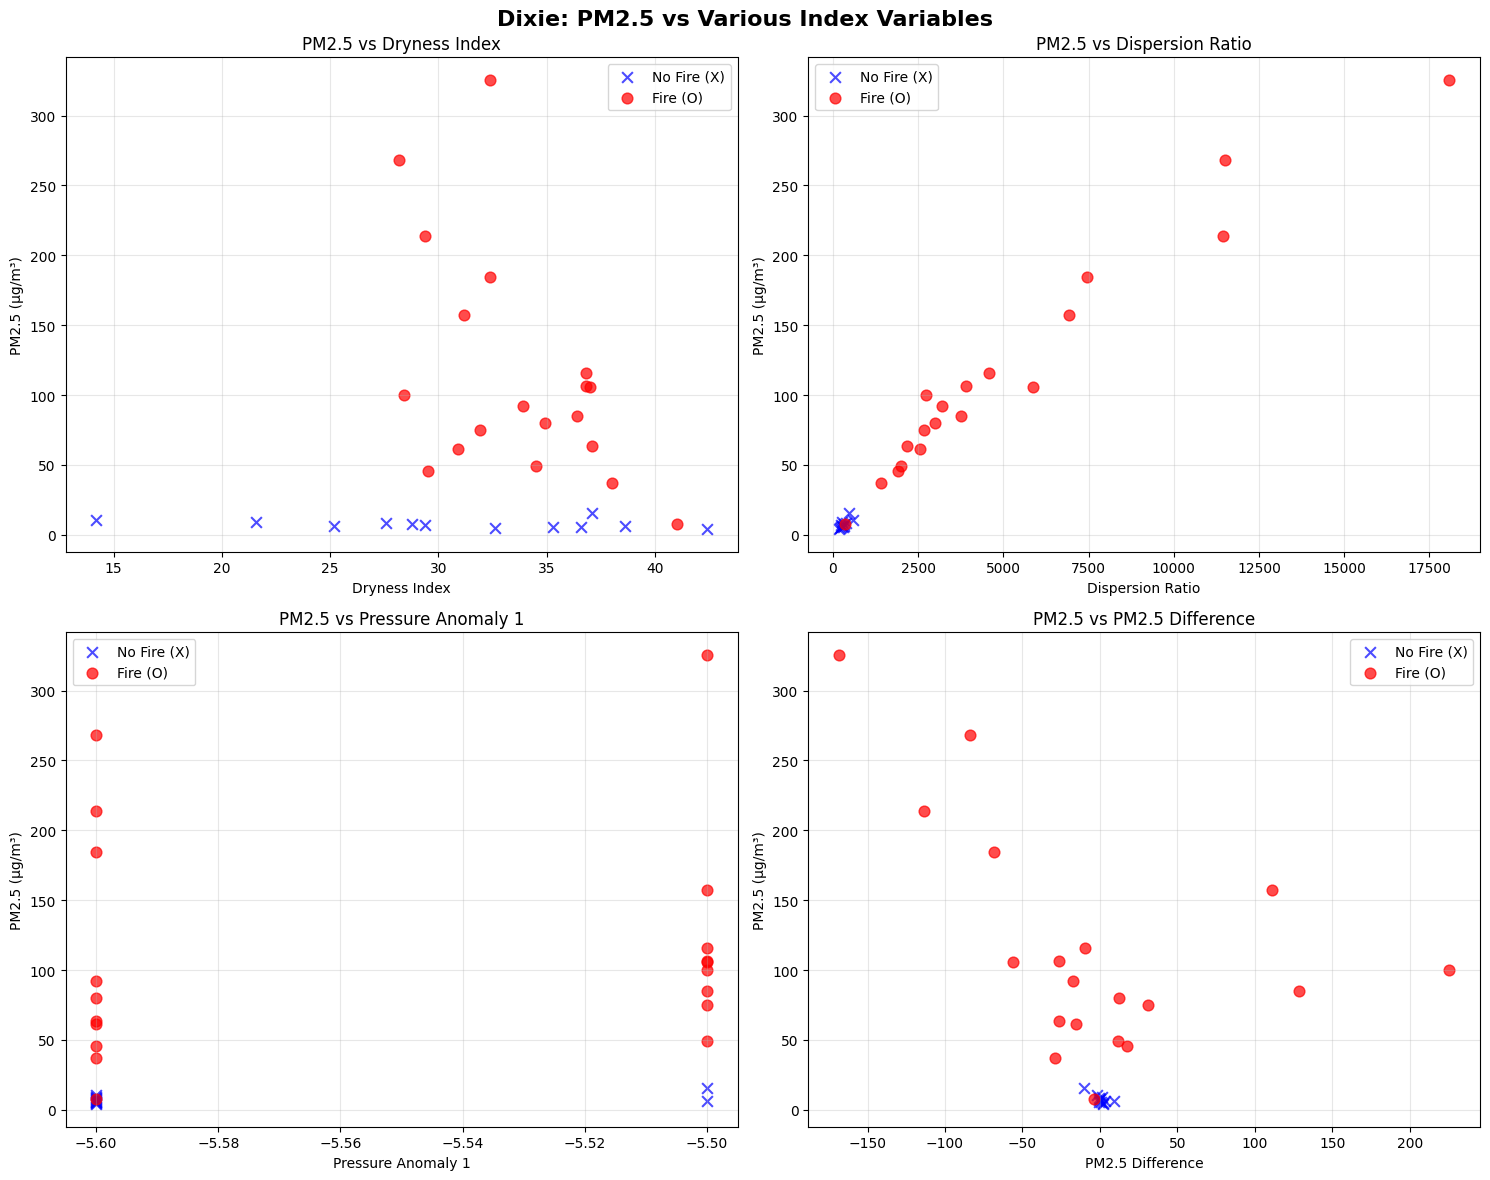

In [193]:
# Create separate scatter plots for Dixie data: PM2.5 vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Dixie: PM2.5 vs Various Index Variables', fontsize=16, fontweight='bold')

# Separate data by fire events for Dixie
dixie_no_fire = dixie[dixie['Wildfire_Event'] == 0]
dixie_fire = dixie[dixie['Wildfire_Event'] == 1]

print(f"Dixie data summary:")
print(f"Total records: {len(dixie)}")
print(f"No fire events: {len(dixie_no_fire)}")
print(f"Fire events: {len(dixie_fire)}")
print(f"PM2.5 range: {dixie['PM25_ug_m3'].min():.1f} to {dixie['PM25_ug_m3'].max():.1f} μg/m³")

# Plot 1: PM2.5 vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(dixie_no_fire['dryness_index '], dixie_no_fire['PM25_ug_m3'],
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(dixie_fire['dryness_index '], dixie_fire['PM25_ug_m3'],
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('PM2.5 (μg/m³)')
ax1.set_title('PM2.5 vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: PM2.5 vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(dixie_no_fire['dispersion_ratio'], dixie_no_fire['PM25_ug_m3'],
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(dixie_fire['dispersion_ratio'], dixie_fire['PM25_ug_m3'],
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('PM2.5 (μg/m³)')
ax2.set_title('PM2.5 vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: PM2.5 vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(dixie_no_fire['PressureAnomaly1'], dixie_no_fire['PM25_ug_m3'],
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(dixie_fire['PressureAnomaly1'], dixie_fire['PM25_ug_m3'],
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('PM2.5 (μg/m³)')
ax3.set_title('PM2.5 vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: PM2.5 vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(dixie_no_fire['pm25_difference'], dixie_no_fire['PM25_ug_m3'],
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(dixie_fire['pm25_difference'], dixie_fire['PM25_ug_m3'],
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('PM2.5 (μg/m³)')
ax4.set_title('PM2.5 vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [194]:
# Add correlation analysis and summary statistics for Dixie PM2.5
print("\n=== DIXIE PM2.5 CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = dixie['PM25_ug_m3'].corr(dixie[var])
    print(f"PM2.5 vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR DIXIE PM2.5 ===")
print("PM2.5 levels:")
print(f"  No Fire - Mean: {dixie_no_fire['PM25_ug_m3'].mean():.2f}, Std: {dixie_no_fire['PM25_ug_m3'].std():.2f}")
print(f"  Fire    - Mean: {dixie_fire['PM25_ug_m3'].mean():.2f}, Std: {dixie_fire['PM25_ug_m3'].std():.2f}")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {dixie_no_fire[var].mean():.2f}, Std: {dixie_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {dixie_fire[var].mean():.2f}, Std: {dixie_fire[var].std():.2f}")

# Compare with other locations
print(f"\n=== COMPARISON: DIXIE vs OTHER LOCATIONS PM2.5 ===")
print(f"Dixie PM2.5 mean: {dixie['PM25_ug_m3'].mean():.2f}")
print(f"Santa Rosa PM2.5 mean: {santa_rosa['PM25_ug_m3'].mean():.2f}")
print(f"Palisades/LA PM25_ug_m3 mean: {palisades_la['PM25_ug_m3'].mean():.2f}")
print(f"Paradise/Butte PM2.5 mean: {paradise_butte['PM25_ug_m3'].mean():.2f}")
print(f"Difference from Santa Rosa: {dixie['PM25_ug_m3'].mean() - santa_rosa['PM25_ug_m3'].mean():.2f}")
print(f"Difference from Palisades/LA: {dixie['PM25_ug_m3'].mean() - palisades_la['PM25_ug_m3'].mean():.2f}")
print(f"Difference from Paradise/Butte: {dixie['PM25_ug_m3'].mean() - paradise_butte['PM25_ug_m3'].mean():.2f}")

# Show PM2.5 ranges for fire vs no-fire events
print(f"\n=== DIXIE PM2.5 RANGES ===")
print(f"No Fire Events - Min: {dixie_no_fire['PM25_ug_m3'].min():.1f}, Max: {dixie_no_fire['PM25_ug_m3'].max():.1f}")
print(f"Fire Events - Min: {dixie_fire['PM25_ug_m3'].min():.1f}, Max: {dixie_fire['PM25_ug_m3'].max():.1f}")

# Check fire event percentage
fire_percentage = (len(dixie_fire) / len(dixie)) * 100
print(f"\nFire event percentage in Dixie: {fire_percentage:.1f}%")

# Compare fire percentages between all locations
santa_rosa_fire_pct = (len(santa_rosa_fire) / len(santa_rosa)) * 100
palisades_la_fire_pct = (len(palisades_la_fire) / len(palisades_la)) * 100
paradise_butte_fire_pct = (len(paradise_butte_fire) / len(paradise_butte)) * 100
print(f"Fire event percentages:")
print(f"  Santa Rosa: {santa_rosa_fire_pct:.1f}%")
print(f"  Palisades/LA: {palisades_la_fire_pct:.1f}%")
print(f"  Paradise/Butte: {paradise_butte_fire_pct:.1f}%")
print(f"  Dixie: {fire_percentage:.1f}%")

# Check if Dixie has the highest PM2.5 levels during fires
print(f"\n=== FIRE EVENT PM2.5 COMPARISON ===")
fire_means = {
    'Santa Rosa': santa_rosa_fire['PM25_ug_m3'].mean(),
    'Palisades/LA': palisades_la_fire['PM25_ug_m3'].mean(),
    'Paradise/Butte': paradise_butte_fire['PM25_ug_m3'].mean(),
    'Dixie': dixie_fire['PM25_ug_m3'].mean()
}
highest_fire_location = max(fire_means, key=fire_means.get)
print(f"Highest PM2.5 during fire events: {highest_fire_location} ({fire_means[highest_fire_location]:.1f})")
print(f"Dixie fire PM2.5: {fire_means['Dixie']:.1f}")
print(f"Santa Rosa fire PM2.5: {fire_means['Santa Rosa']:.1f}")
print(f"Palisades/LA fire PM2.5: {fire_means['Palisades/LA']:.1f}")
print(f"Paradise/Butte fire PM2.5: {fire_means['Paradise/Butte']:.1f}")

# Check PM2.5 vs other variables correlations
print(f"\n=== DIXIE PM2.5 vs OTHER VARIABLES CORRELATIONS ===")
print(f"PM2.5 vs NOx_ppb correlation: {dixie['PM25_ug_m3'].corr(dixie['NOx_ppb']):.3f}")
print(f"PM2.5 vs Avg_Humidity correlation: {dixie['PM25_ug_m3'].corr(dixie['Avg_Humidity_Percent']):.3f}")
print(f"PM2.5 vs Avg_Temp correlation: {dixie['PM25_ug_m3'].corr(dixie['Avg_Temp_F']):.3f}")
print(f"PM2.5 vs Avg_Wind_Speed correlation: {dixie['PM25_ug_m3'].corr(dixie['Avg_Wind_Speed_mph']):.3f}")

# Check PM2.5 vs dispersion relationship (should be negative - better dispersion = lower PM2.5)
print(f"\n=== DIXIE PM2.5 vs DISPERSION RELATIONSHIP ===")
pm25_disp_corr = dixie['PM25_ug_m3'].corr(dixie['dispersion_ratio'])
print(f"Expected: Higher dispersion should correlate with lower PM2.5")
print(f"Actual correlation: {pm25_disp_corr:.3f}")
if pm25_disp_corr < 0:
    print("✓ As expected: Higher dispersion correlates with lower PM2.5")
else:
    print("⚠ Unexpected: Higher dispersion does not correlate with lower PM2.5")

# Check PM2.5 vs dryness relationship (should be positive - higher dryness = higher PM2.5)
print(f"\n=== DIXIE PM2.5 vs DRYNESS RELATIONSHIP ===")
pm25_dry_corr = dixie['PM25_ug_m3'].corr(dixie['dryness_index '])
print(f"Expected: Higher dryness should correlate with higher PM2.5")
print(f"Actual correlation: {pm25_dry_corr:.3f}")
if pm25_dry_corr > 0:
    print("✓ As expected: Higher dryness correlates with higher PM2.5")
else:
    print("⚠ Unexpected: Higher dryness does not correlate with higher PM2.5")



=== DIXIE PM2.5 CORRELATION ANALYSIS ===
PM2.5 vs dryness_index: r = -0.032
PM2.5 vs dispersion_ratio: r = 0.980
PM2.5 vs PressureAnomaly1: r = 0.280
PM2.5 vs pm25_difference: r = -0.403

=== FIRE vs NO-FIRE STATISTICS FOR DIXIE PM2.5 ===
PM2.5 levels:
  No Fire - Mean: 7.63, Std: 3.16
  Fire    - Mean: 114.37, Std: 81.99

dryness_index:
  No Fire - Mean: 30.78, Std: 7.98
  Fire    - Mean: 33.72, Std: 3.64

dispersion_ratio:
  No Fire - Mean: 314.82, Std: 117.06
  Fire    - Mean: 5026.52, Std: 4432.09

PressureAnomaly1:
  No Fire - Mean: -5.58, Std: 0.04
  Fire    - Mean: -5.55, Std: 0.05

pm25_difference:
  No Fire - Mean: 0.34, Std: 4.36
  Fire    - Mean: -4.26, Std: 88.26

=== COMPARISON: DIXIE vs OTHER LOCATIONS PM2.5 ===
Dixie PM2.5 mean: 73.05
Santa Rosa PM2.5 mean: 14.44
Palisades/LA PM25_ug_m3 mean: 24.85
Paradise/Butte PM2.5 mean: 88.95
Difference from Santa Rosa: 58.61
Difference from Palisades/LA: 48.20
Difference from Paradise/Butte: -15.90

=== DIXIE PM2.5 RANGES ===
No F

Dixie NOx data summary:
Total records: 31
No fire events: 12
Fire events: 19
NOx range: 0.1 to 0.1 ppb


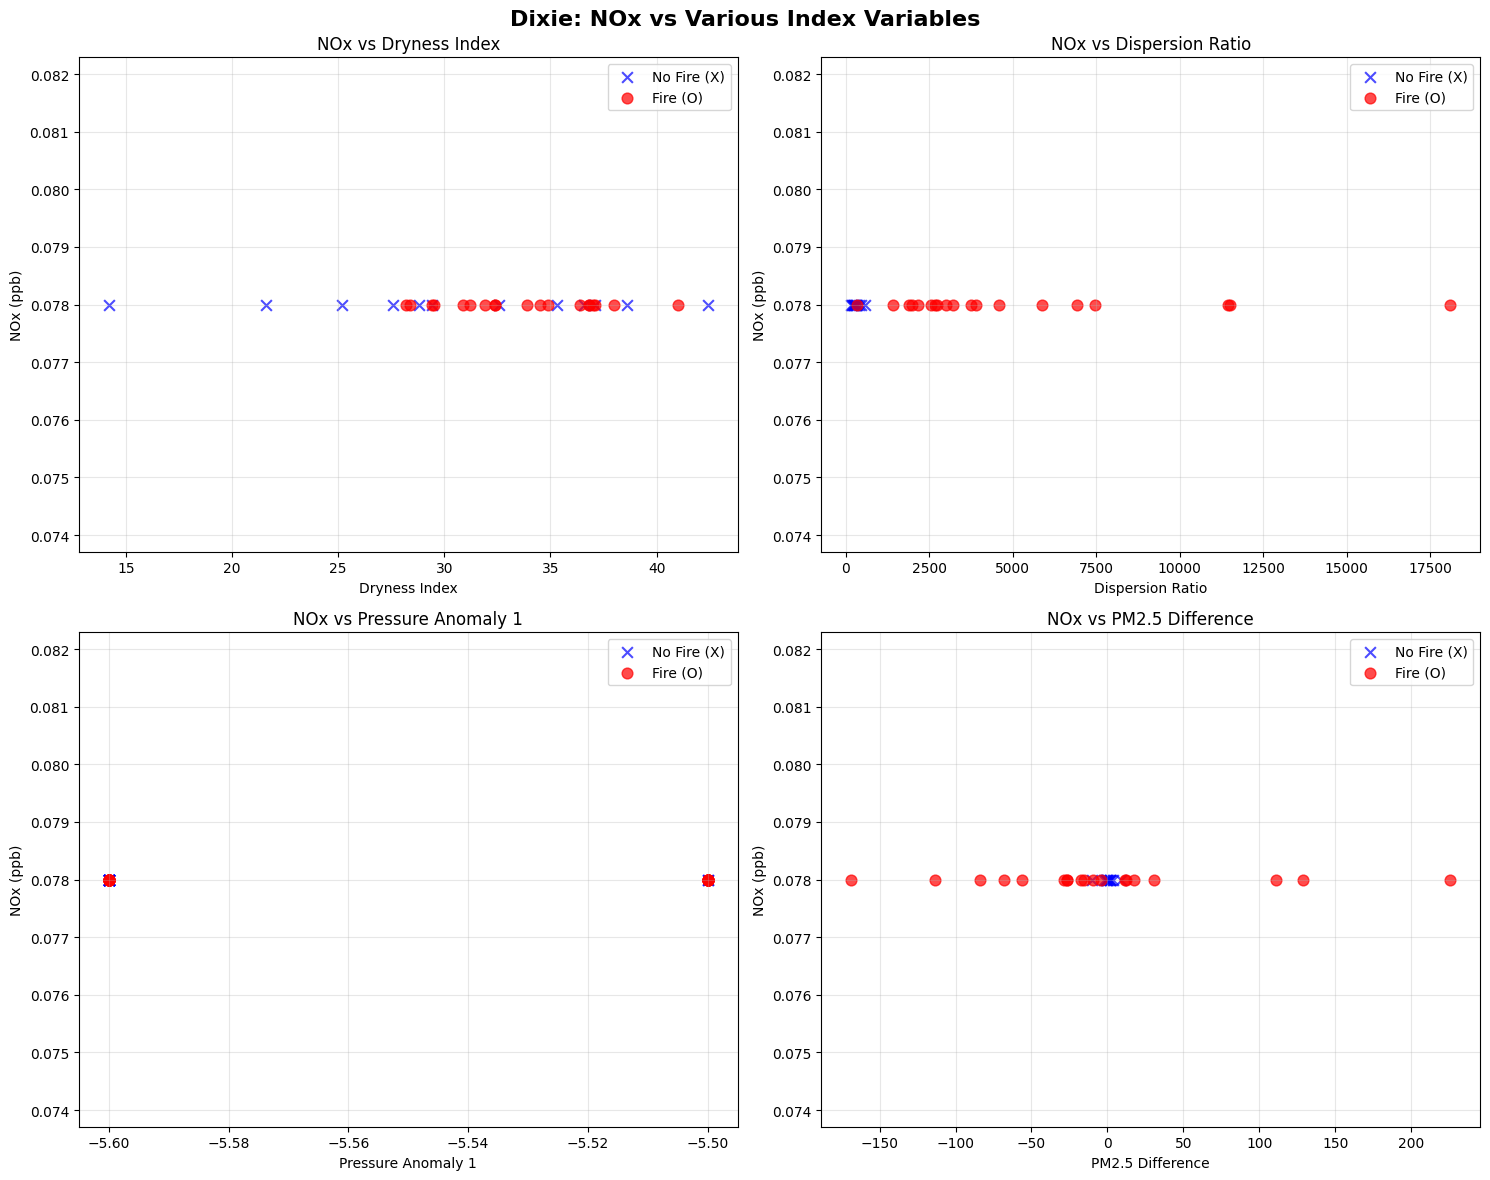

In [195]:
# Create separate scatter plots for Dixie data: NOx_ppb vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Dixie: NOx vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Dixie NOx data summary:")
print(f"Total records: {len(dixie)}")
print(f"No fire events: {len(dixie_no_fire)}")
print(f"Fire events: {len(dixie_fire)}")
print(f"NOx range: {dixie['NOx_ppb'].min():.1f} to {dixie['NOx_ppb'].max():.1f} ppb")

# Plot 1: NOx_ppb vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(dixie_no_fire['dryness_index '], dixie_no_fire['NOx_ppb'],
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(dixie_fire['dryness_index '], dixie_fire['NOx_ppb'],
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('NOx (ppb)')
ax1.set_title('NOx vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: NOx_ppb vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(dixie_no_fire['dispersion_ratio'], dixie_no_fire['NOx_ppb'],
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(dixie_fire['dispersion_ratio'], dixie_fire['NOx_ppb'],
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('NOx (ppb)')
ax2.set_title('NOx vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: NOx_ppb vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(dixie_no_fire['PressureAnomaly1'], dixie_no_fire['NOx_ppb'],
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(dixie_fire['PressureAnomaly1'], dixie_fire['NOx_ppb'],
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('NOx (ppb)')
ax3.set_title('NOx vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: NOx_ppb vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(dixie_no_fire['pm25_difference'], dixie_no_fire['NOx_ppb'],
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(dixie_fire['pm25_difference'], dixie_fire['NOx_ppb'],
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('NOx (ppb)')
ax4.set_title('NOx vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [196]:
# Add correlation analysis and summary statistics for Dixie NOx
print("\n=== DIXIE NOx CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = dixie['NOx_ppb'].corr(dixie[var])
    print(f"NOx_ppb vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR DIXIE NOx ===")
print("NOx levels:")
print(f"  No Fire - Mean: {dixie_no_fire['NOx_ppb'].mean():.2f}, Std: {dixie_no_fire['NOx_ppb'].std():.2f}")
print(f"  Fire    - Mean: {dixie_fire['NOx_ppb'].mean():.2f}, Std: {dixie_fire['NOx_ppb'].std():.2f}")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {dixie_no_fire[var].mean():.2f}, Std: {dixie_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {dixie_fire[var].mean():.2f}, Std: {dixie_fire[var].std():.2f}")

# Compare with other locations
print(f"\n=== COMPARISON: DIXIE vs OTHER LOCATIONS NOx ===")
print(f"Dixie NOx mean: {dixie['NOx_ppb'].mean():.2f}")
print(f"Santa Rosa NOx mean: {santa_rosa['NOx_ppb'].mean():.2f}")
print(f"Palisades/LA NOx mean: {palisades_la['NOx_ppb'].mean():.2f}")
print(f"Paradise/Butte NOx mean: {paradise_butte['NOx_ppb'].mean():.2f}")
print(f"Difference from Santa Rosa: {dixie['NOx_ppb'].mean() - santa_rosa['NOx_ppb'].mean():.2f}")
print(f"Difference from Palisades/LA: {dixie['NOx_ppb'].mean() - palisades_la['NOx_ppb'].mean():.2f}")
print(f"Difference from Paradise/Butte: {dixie['NOx_ppb'].mean() - paradise_butte['NOx_ppb'].mean():.2f}")

# Show NOx ranges for fire vs no-fire events
print(f"\n=== DIXIE NOx RANGES ===")
print(f"No Fire Events - Min: {dixie_no_fire['NOx_ppb'].min():.1f}, Max: {dixie_no_fire['NOx_ppb'].max():.1f}")
print(f"Fire Events - Min: {dixie_fire['NOx_ppb'].min():.1f}, Max: {dixie_fire['NOx_ppb'].max():.1f}")

# Check if Dixie has the highest NOx levels during fires
print(f"\n=== FIRE EVENT NOx COMPARISON ===")
fire_nox_means = {
    'Santa Rosa': santa_rosa_fire['NOx_ppb'].mean(),
    'Palisades/LA': palisades_la_fire['NOx_ppb'].mean(),
    'Paradise/Butte': paradise_butte_fire['NOx_ppb'].mean(),
    'Dixie': dixie_fire['NOx_ppb'].mean()
}
highest_fire_nox_location = max(fire_nox_means, key=fire_nox_means.get)
print(f"Highest NOx during fire events: {highest_fire_nox_location} ({fire_nox_means[highest_fire_nox_location]:.1f})")
print(f"Dixie fire NOx: {fire_nox_means['Dixie']:.1f}")
print(f"Santa Rosa fire NOx: {fire_nox_means['Santa Rosa']:.1f}")
print(f"Palisades/LA fire NOx: {fire_nox_means['Palisades/LA']:.1f}")
print(f"Paradise/Butte fire NOx: {fire_nox_means['Paradise/Butte']:.1f}")

# Check NOx vs other variables correlations
print(f"\n=== DIXIE NOx vs OTHER VARIABLES CORRELATIONS ===")
print(f"NOx vs PM2.5 correlation: {dixie['NOx_ppb'].corr(dixie['PM25_ug_m3']):.3f}")
print(f"NOx vs Avg_Humidity correlation: {dixie['NOx_ppb'].corr(dixie['Avg_Humidity_Percent']):.3f}")
print(f"NOx vs Avg_Temp correlation: {dixie['NOx_ppb'].corr(dixie['Avg_Temp_F']):.3f}")
print(f"NOx vs Avg_Wind_Speed correlation: {dixie['NOx_ppb'].corr(dixie['Avg_Wind_Speed_mph']):.3f}")

# Check NOx vs dispersion relationship (should be negative - better dispersion = lower NOx)
print(f"\n=== DIXIE NOx vs DISPERSION RELATIONSHIP ===")
nox_disp_corr = dixie['NOx_ppb'].corr(dixie['dispersion_ratio'])
print(f"Expected: Higher dispersion should correlate with lower NOx")
print(f"Actual correlation: {nox_disp_corr:.3f}")
if nox_disp_corr < 0:
    print("✓ As expected: Higher dispersion correlates with lower NOx")
else:
    print("⚠ Unexpected: Higher dispersion does not correlate with lower NOx")

# Check NOx vs dryness relationship (should be positive - higher dryness = higher NOx)
print(f"\n=== DIXIE NOx vs DRYNESS RELATIONSHIP ===")
nox_dry_corr = dixie['NOx_ppb'].corr(dixie['dryness_index '])
print(f"Expected: Higher dryness should correlate with higher NOx")
print(f"Actual correlation: {nox_dry_corr:.3f}")
if nox_dry_corr > 0:
    print("✓ As expected: Higher dryness correlates with higher NOx")
else:
    print("⚠ Unexpected: Higher dryness does not correlate with higher NOx")

# Check NOx vs PM2.5 relationship (should be positive - both are pollutants)
print(f"\n=== DIXIE NOx vs PM2.5 RELATIONSHIP ===")
nox_pm25_corr = dixie['NOx_ppb'].corr(dixie['PM25_ug_m3'])
print(f"Expected: NOx and PM2.5 should be positively correlated (both are pollutants)")
print(f"Actual correlation: {nox_pm25_corr:.3f}")
if nox_pm25_corr > 0:
    print("✓ As expected: NOx and PM2.5 are positively correlated")
else:
    print("⚠ Unexpected: NOx and PM2.5 are not positively correlated")

# Compare NOx patterns between all locations
print(f"\n=== NOx PATTERN COMPARISON ACROSS ALL LOCATIONS ===")
nox_fire_diffs = {
    'Santa Rosa': santa_rosa_fire['NOx_ppb'].mean() - santa_rosa_no_fire['NOx_ppb'].mean(),
    'Palisades/LA': palisades_la_fire['NOx_ppb'].mean() - palisades_la_no_fire['NOx_ppb'].mean(),
    'Paradise/Butte': paradise_butte_fire['NOx_ppb'].mean() - paradise_butte_no_fire['NOx_ppb'].mean(),
    'Dixie': dixie_fire['NOx_ppb'].mean() - dixie_no_fire['NOx_ppb'].mean()
}

print(f"NOx fire vs no-fire differences:")
for location, diff in nox_fire_diffs.items():
    print(f"  {location}: {diff:.1f} ppb")

# Check if all locations show similar patterns
all_positive = all(diff > 0 for diff in nox_fire_diffs.values())
all_negative = all(diff < 0 for diff in nox_fire_diffs.values())
if all_positive or all_negative:
    print("✓ All locations show similar NOx fire vs no-fire patterns")
else:
    print("⚠ Locations show different NOx fire vs no-fire patterns")

# Check which location has the most extreme NOx difference
most_extreme_location = max(nox_fire_diffs, key=lambda x: abs(nox_fire_diffs[x]))
print(f"Most extreme NOx fire vs no-fire difference: {most_extreme_location} ({nox_fire_diffs[most_extreme_location]:.1f} ppb)")



=== DIXIE NOx CORRELATION ANALYSIS ===
NOx_ppb vs dryness_index: r = -0.000
NOx_ppb vs dispersion_ratio: r = 0.000
NOx_ppb vs PressureAnomaly1: r = -0.000
NOx_ppb vs pm25_difference: r = -0.000

=== FIRE vs NO-FIRE STATISTICS FOR DIXIE NOx ===
NOx levels:
  No Fire - Mean: 0.08, Std: 0.00
  Fire    - Mean: 0.08, Std: 0.00

dryness_index:
  No Fire - Mean: 30.78, Std: 7.98
  Fire    - Mean: 33.72, Std: 3.64

dispersion_ratio:
  No Fire - Mean: 314.82, Std: 117.06
  Fire    - Mean: 5026.52, Std: 4432.09

PressureAnomaly1:
  No Fire - Mean: -5.58, Std: 0.04
  Fire    - Mean: -5.55, Std: 0.05

pm25_difference:
  No Fire - Mean: 0.34, Std: 4.36
  Fire    - Mean: -4.26, Std: 88.26

=== COMPARISON: DIXIE vs OTHER LOCATIONS NOx ===
Dixie NOx mean: 0.08
Santa Rosa NOx mean: 15.96
Palisades/LA NOx mean: 0.09
Paradise/Butte NOx mean: 0.03
Difference from Santa Rosa: -15.88
Difference from Palisades/LA: -0.01
Difference from Paradise/Butte: 0.05

=== DIXIE NOx RANGES ===
No Fire Events - Min: 0.1

Dixie Average Humidity data summary:
Total records: 31
No fire events: 12
Fire events: 19
Avg Humidity range: 35.5% to 75.7%


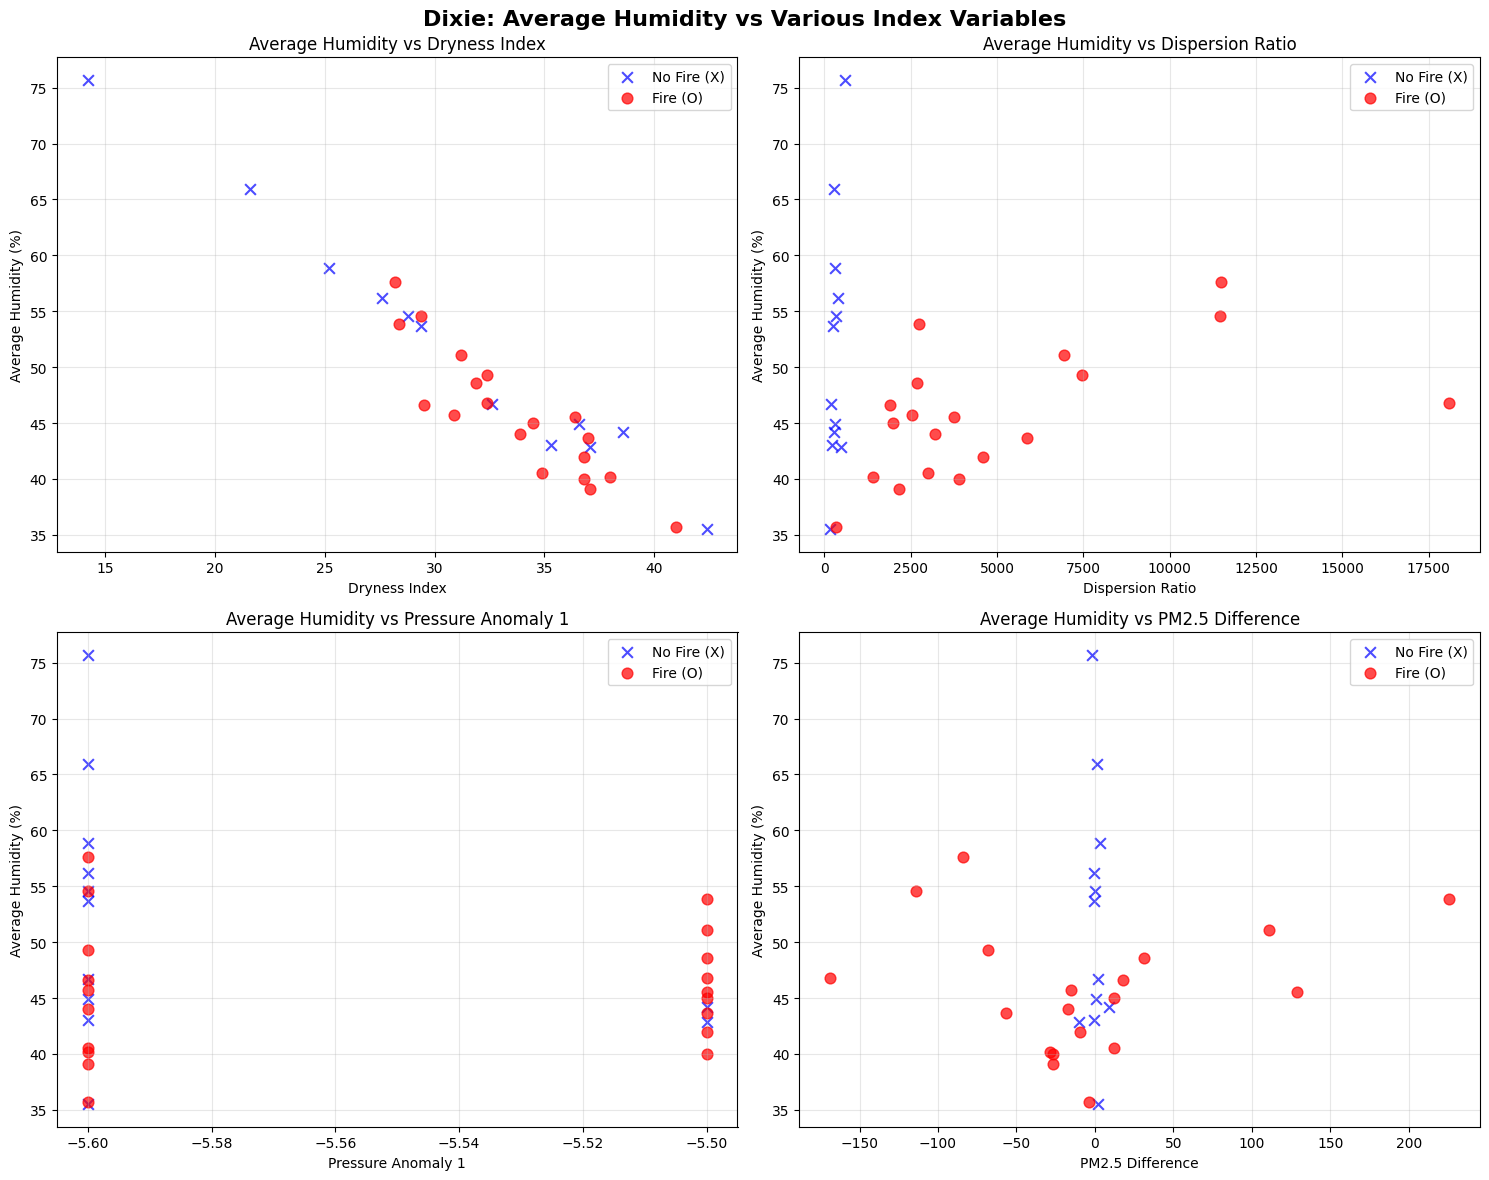

In [197]:
# Create separate scatter plots for Dixie data: Avg_Humidity_Percent vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Dixie: Average Humidity vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Dixie Average Humidity data summary:")
print(f"Total records: {len(dixie)}")
print(f"No fire events: {len(dixie_no_fire)}")
print(f"Fire events: {len(dixie_fire)}")
print(f"Avg Humidity range: {dixie['Avg_Humidity_Percent'].min():.1f}% to {dixie['Avg_Humidity_Percent'].max():.1f}%")

# Plot 1: Avg_Humidity_Percent vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(dixie_no_fire['dryness_index '], dixie_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(dixie_fire['dryness_index '], dixie_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('Average Humidity (%)')
ax1.set_title('Average Humidity vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Avg_Humidity_Percent vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(dixie_no_fire['dispersion_ratio'], dixie_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(dixie_fire['dispersion_ratio'], dixie_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('Average Humidity (%)')
ax2.set_title('Average Humidity vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Avg_Humidity_Percent vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(dixie_no_fire['PressureAnomaly1'], dixie_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(dixie_fire['PressureAnomaly1'], dixie_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('Average Humidity (%)')
ax3.set_title('Average Humidity vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Avg_Humidity_Percent vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(dixie_no_fire['pm25_difference'], dixie_no_fire['Avg_Humidity_Percent'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(dixie_fire['pm25_difference'], dixie_fire['Avg_Humidity_Percent'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('Average Humidity (%)')
ax4.set_title('Average Humidity vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [198]:
# Add correlation analysis and summary statistics for Dixie Average Humidity
print("\n=== DIXIE AVERAGE HUMIDITY CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = dixie['Avg_Humidity_Percent'].corr(dixie[var])
    print(f"Avg_Humidity_Percent vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR DIXIE AVERAGE HUMIDITY ===")
print("Average Humidity levels:")
print(f"  No Fire - Mean: {dixie_no_fire['Avg_Humidity_Percent'].mean():.1f}%, Std: {dixie_no_fire['Avg_Humidity_Percent'].std():.1f}%")
print(f"  Fire    - Mean: {dixie_fire['Avg_Humidity_Percent'].mean():.1f}%, Std: {dixie_fire['Avg_Humidity_Percent'].std():.1f}%")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {dixie_no_fire[var].mean():.2f}, Std: {dixie_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {dixie_fire[var].mean():.2f}, Std: {dixie_fire[var].std():.2f}")

# Compare with other locations
print(f"\n=== COMPARISON: DIXIE vs OTHER LOCATIONS AVERAGE HUMIDITY ===")
print(f"Dixie Avg Humidity mean: {dixie['Avg_Humidity_Percent'].mean():.1f}%")
print(f"Santa Rosa Avg Humidity mean: {santa_rosa['Avg_Humidity_Percent'].mean():.1f}%")
print(f"Palisades/LA Avg Humidity mean: {palisades_la['Avg_Humidity_Percent'].mean():.1f}%")
print(f"Paradise/Butte Avg Humidity mean: {paradise_butte['Avg_Humidity_Percent'].mean():.1f}%")
print(f"Difference from Santa Rosa: {dixie['Avg_Humidity_Percent'].mean() - santa_rosa['Avg_Humidity_Percent'].mean():.1f}%")
print(f"Difference from Palisades/LA: {dixie['Avg_Humidity_Percent'].mean() - palisades_la['Avg_Humidity_Percent'].mean():.1f}%")
print(f"Difference from Paradise/Butte: {dixie['Avg_Humidity_Percent'].mean() - paradise_butte['Avg_Humidity_Percent'].mean():.1f}%")

# Compare humidity with other variables
print(f"\n=== COMPARISON: HUMIDITY vs OTHER VARIABLES IN DIXIE ===")
print(f"Avg_Humidity vs PM2.5 correlation: {dixie['Avg_Humidity_Percent'].corr(dixie['PM25_ug_m3']):.3f}")
print(f"Avg_Humidity vs NOx_ppb correlation: {dixie['Avg_Humidity_Percent'].corr(dixie['NOx_ppb']):.3f}")
print(f"Avg_Humidity vs Avg_Temp correlation: {dixie['Avg_Humidity_Percent'].corr(dixie['Avg_Temp_F']):.3f}")
print(f"Avg_Humidity vs Avg_Wind_Speed correlation: {dixie['Avg_Humidity_Percent'].corr(dixie['Avg_Wind_Speed_mph']):.3f}")

# Show humidity ranges for fire vs no-fire events
print(f"\n=== DIXIE AVERAGE HUMIDITY RANGES ===")
print(f"No Fire Events - Min: {dixie_no_fire['Avg_Humidity_Percent'].min():.1f}%, Max: {dixie_no_fire['Avg_Humidity_Percent'].max():.1f}%")
print(f"Fire Events - Min: {dixie_fire['Avg_Humidity_Percent'].min():.1f}%, Max: {dixie_fire['Avg_Humidity_Percent'].max():.1f}%")

# Check relationship with dryness index (humidity should decrease dryness)
print(f"\n=== HUMIDITY vs DRYNESS RELATIONSHIP IN DIXIE ===")
hum_dry_corr = dixie['Avg_Humidity_Percent'].corr(dixie['dryness_index '])
print(f"Expected: Higher humidity should correlate with lower dryness index")
print(f"Actual correlation: {hum_dry_corr:.3f}")
if hum_dry_corr < 0:
    print("✓ As expected: Higher humidity correlates with lower dryness index")
else:
    print("⚠ Unexpected: Higher humidity does not correlate with lower dryness index")

# Compare humidity patterns between all locations
print(f"\n=== HUMIDITY PATTERN COMPARISON ACROSS ALL LOCATIONS ===")
hum_fire_diffs = {
    'Santa Rosa': santa_rosa_fire['Avg_Humidity_Percent'].mean() - santa_rosa_no_fire['Avg_Humidity_Percent'].mean(),
    'Palisades/LA': palisades_la_fire['Avg_Humidity_Percent'].mean() - palisades_la_no_fire['Avg_Humidity_Percent'].mean(),
    'Paradise/Butte': paradise_butte_fire['Avg_Humidity_Percent'].mean() - paradise_butte_no_fire['Avg_Humidity_Percent'].mean(),
    'Dixie': dixie_fire['Avg_Humidity_Percent'].mean() - dixie_no_fire['Avg_Humidity_Percent'].mean()
}

print(f"Humidity fire vs no-fire differences:")
for location, diff in hum_fire_diffs.items():
    print(f"  {location}: {diff:.1f}%")

# Check if all locations show similar patterns
all_positive = all(diff > 0 for diff in hum_fire_diffs.values())
all_negative = all(diff < 0 for diff in hum_fire_diffs.values())
if all_positive or all_negative:
    print("✓ All locations show similar humidity fire vs no-fire patterns")
else:
    print("⚠ Locations show different humidity fire vs no-fire patterns")

# Check which location has the most extreme humidity difference
most_extreme_location = max(hum_fire_diffs, key=lambda x: abs(hum_fire_diffs[x]))
print(f"Most extreme humidity fire vs no-fire difference: {most_extreme_location} ({hum_fire_diffs[most_extreme_location]:.1f}%)")

# Check humidity vs temperature relationship (should be negative)
print(f"\n=== HUMIDITY vs TEMPERATURE RELATIONSHIP IN DIXIE ===")
hum_temp_corr = dixie['Avg_Humidity_Percent'].corr(dixie['Avg_Temp_F'])
print(f"Expected: Higher humidity should correlate with lower temperature")
print(f"Actual correlation: {hum_temp_corr:.3f}")
if hum_temp_corr < 0:
    print("✓ As expected: Higher humidity correlates with lower temperature")
else:
    print("⚠ Unexpected: Higher humidity does not correlate with lower temperature")

# Check which location has the highest humidity during fire events
print(f"\n=== FIRE EVENT HUMIDITY COMPARISON ===")
fire_hum_means = {
    'Santa Rosa': santa_rosa_fire['Avg_Humidity_Percent'].mean(),
    'Palisades/LA': palisades_la_fire['Avg_Humidity_Percent'].mean(),
    'Paradise/Butte': paradise_butte_fire['Avg_Humidity_Percent'].mean(),
    'Dixie': dixie_fire['Avg_Humidity_Percent'].mean()
}
most_humid_fire_location = max(fire_hum_means, key=fire_hum_means.get)
print(f"Most humid location during fire events: {most_humid_fire_location} ({fire_hum_means[most_humid_fire_location]:.1f}%)")
print(f"Dixie fire humidity: {fire_hum_means['Dixie']:.1f}%")
print(f"Santa Rosa fire humidity: {fire_hum_means['Santa Rosa']:.1f}%")
print(f"Palisades/LA fire humidity: {fire_hum_means['Palisades/LA']:.1f}%")
print(f"Paradise/Butte fire humidity: {fire_hum_means['Paradise/Butte']:.1f}%")



=== DIXIE AVERAGE HUMIDITY CORRELATION ANALYSIS ===
Avg_Humidity_Percent vs dryness_index: r = -0.962
Avg_Humidity_Percent vs dispersion_ratio: r = 0.042
Avg_Humidity_Percent vs PressureAnomaly1: r = -0.203
Avg_Humidity_Percent vs pm25_difference: r = 0.051

=== FIRE vs NO-FIRE STATISTICS FOR DIXIE AVERAGE HUMIDITY ===
Average Humidity levels:
  No Fire - Mean: 51.9%, Std: 11.3%
  Fire    - Mean: 45.8%, Std: 5.7%

dryness_index:
  No Fire - Mean: 30.78, Std: 7.98
  Fire    - Mean: 33.72, Std: 3.64

dispersion_ratio:
  No Fire - Mean: 314.82, Std: 117.06
  Fire    - Mean: 5026.52, Std: 4432.09

PressureAnomaly1:
  No Fire - Mean: -5.58, Std: 0.04
  Fire    - Mean: -5.55, Std: 0.05

pm25_difference:
  No Fire - Mean: 0.34, Std: 4.36
  Fire    - Mean: -4.26, Std: 88.26

=== COMPARISON: DIXIE vs OTHER LOCATIONS AVERAGE HUMIDITY ===
Dixie Avg Humidity mean: 48.1%
Santa Rosa Avg Humidity mean: 58.6%
Palisades/LA Avg Humidity mean: 54.8%
Paradise/Butte Avg Humidity mean: 65.8%
Difference fro

Dixie Average Temperature data summary:
Total records: 31
No fire events: 12
Fire events: 19
Avg Temperature range: 55.3°F to 69.1°F


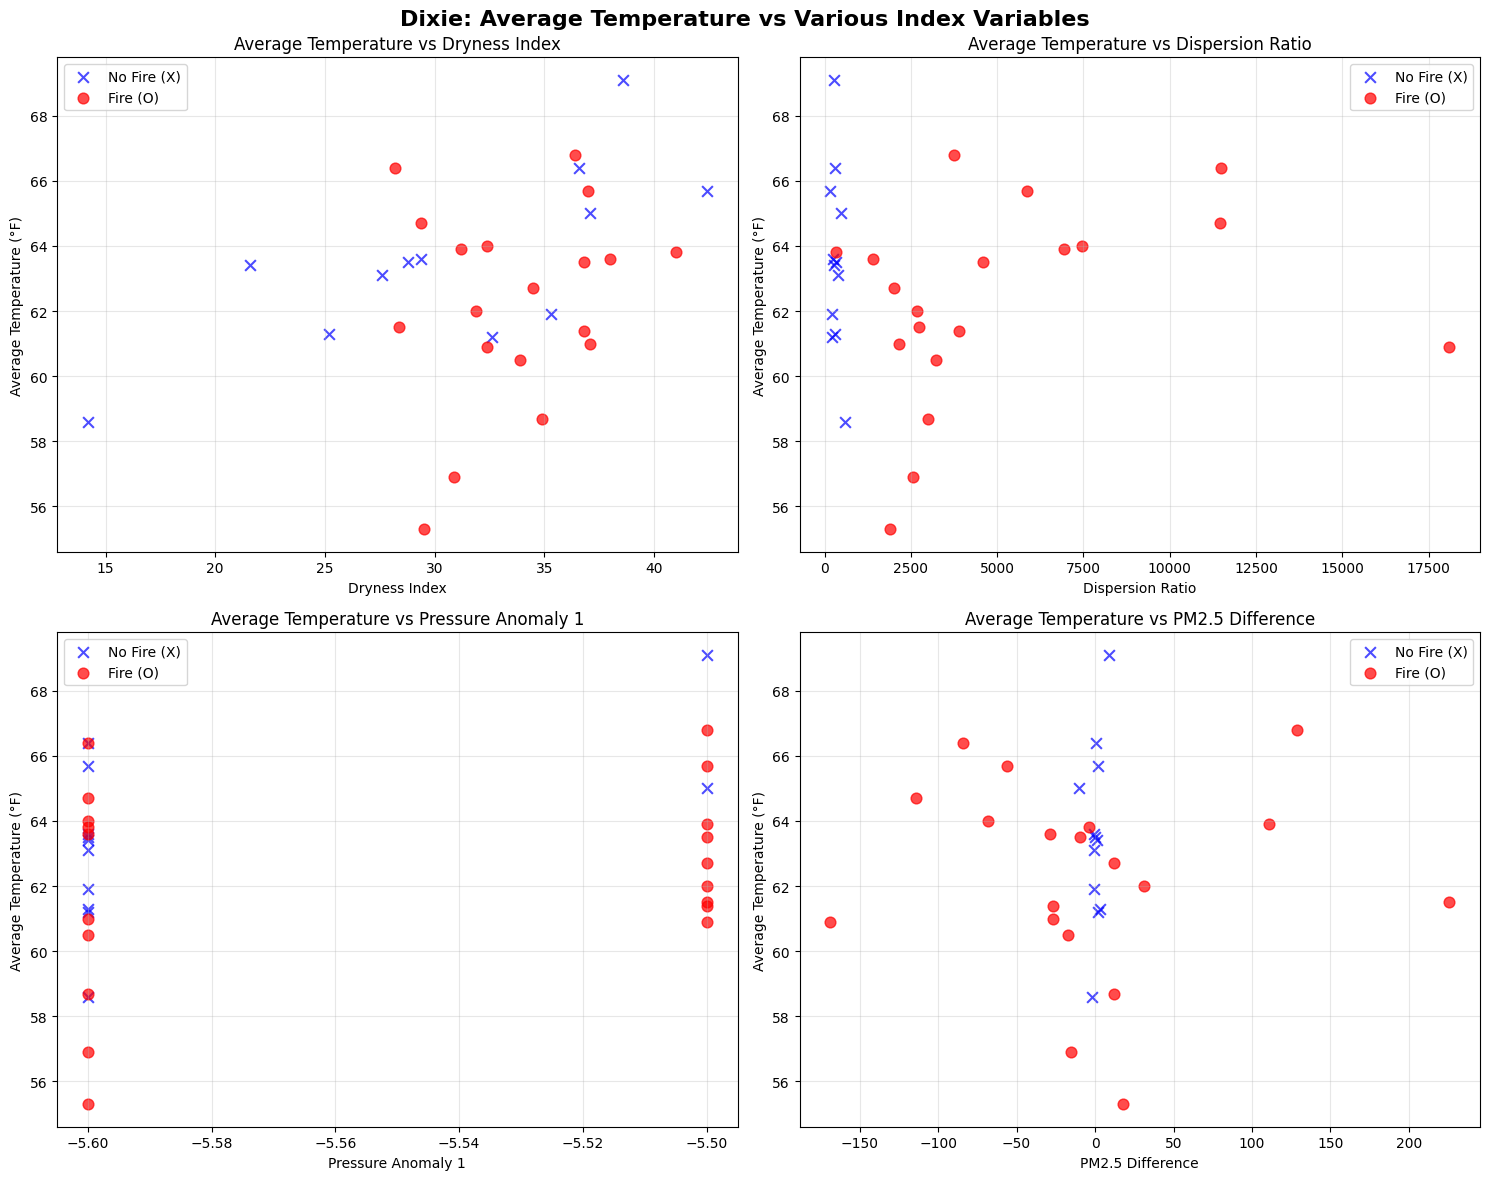

In [199]:
# Create separate scatter plots for Dixie data: Avg_Temp_F vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Dixie: Average Temperature vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Dixie Average Temperature data summary:")
print(f"Total records: {len(dixie)}")
print(f"No fire events: {len(dixie_no_fire)}")
print(f"Fire events: {len(dixie_fire)}")
print(f"Avg Temperature range: {dixie['Avg_Temp_F'].min():.1f}°F to {dixie['Avg_Temp_F'].max():.1f}°F")

# Plot 1: Avg_Temp_F vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(dixie_no_fire['dryness_index '], dixie_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(dixie_fire['dryness_index '], dixie_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('Average Temperature (°F)')
ax1.set_title('Average Temperature vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Avg_Temp_F vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(dixie_no_fire['dispersion_ratio'], dixie_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(dixie_fire['dispersion_ratio'], dixie_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('Average Temperature (°F)')
ax2.set_title('Average Temperature vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Avg_Temp_F vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(dixie_no_fire['PressureAnomaly1'], dixie_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(dixie_fire['PressureAnomaly1'], dixie_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('Average Temperature (°F)')
ax3.set_title('Average Temperature vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Avg_Temp_F vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(dixie_no_fire['pm25_difference'], dixie_no_fire['Avg_Temp_F'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(dixie_fire['pm25_difference'], dixie_fire['Avg_Temp_F'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('Average Temperature (°F)')
ax4.set_title('Average Temperature vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [200]:
# Add correlation analysis and summary statistics for Dixie Average Temperature
print("\n=== DIXIE AVERAGE TEMPERATURE CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = dixie['Avg_Temp_F'].corr(dixie[var])
    print(f"Avg_Temp_F vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR DIXIE AVERAGE TEMPERATURE ===")
print("Average Temperature levels:")
print(f"  No Fire - Mean: {dixie_no_fire['Avg_Temp_F'].mean():.1f}°F, Std: {dixie_no_fire['Avg_Temp_F'].std():.1f}°F")
print(f"  Fire    - Mean: {dixie_fire['Avg_Temp_F'].mean():.1f}°F, Std: {dixie_fire['Avg_Temp_F'].std():.1f}°F")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {dixie_no_fire[var].mean():.2f}, Std: {dixie_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {dixie_fire[var].mean():.2f}, Std: {dixie_fire[var].std():.2f}")

# Compare with other locations
print(f"\n=== COMPARISON: DIXIE vs OTHER LOCATIONS AVERAGE TEMPERATURE ===")
print(f"Dixie Avg Temperature mean: {dixie['Avg_Temp_F'].mean():.1f}°F")
print(f"Santa Rosa Avg Temperature mean: {santa_rosa['Avg_Temp_F'].mean():.1f}°F")
print(f"Palisades/LA Avg Temperature mean: {palisades_la['Avg_Temp_F'].mean():.1f}°F")
print(f"Paradise/Butte Avg Temperature mean: {paradise_butte['Avg_Temp_F'].mean():.1f}°F")
print(f"Difference from Santa Rosa: {dixie['Avg_Temp_F'].mean() - santa_rosa['Avg_Temp_F'].mean():.1f}°F")
print(f"Difference from Palisades/LA: {dixie['Avg_Temp_F'].mean() - palisades_la['Avg_Temp_F'].mean():.1f}°F")
print(f"Difference from Paradise/Butte: {dixie['Avg_Temp_F'].mean() - paradise_butte['Avg_Temp_F'].mean():.1f}°F")

# Compare temperature with other variables
print(f"\n=== COMPARISON: TEMPERATURE vs OTHER VARIABLES IN DIXIE ===")
print(f"Avg_Temp vs PM2.5 correlation: {dixie['Avg_Temp_F'].corr(dixie['PM25_ug_m3']):.3f}")
print(f"Avg_Temp vs NOx_ppb correlation: {dixie['Avg_Temp_F'].corr(dixie['NOx_ppb']):.3f}")
print(f"Avg_Temp vs Avg_Humidity correlation: {dixie['Avg_Temp_F'].corr(dixie['Avg_Humidity_Percent']):.3f}")
print(f"Avg_Temp vs Avg_Wind_Speed correlation: {dixie['Avg_Temp_F'].corr(dixie['Avg_Wind_Speed_mph']):.3f}")

# Show temperature ranges for fire vs no-fire events
print(f"\n=== DIXIE AVERAGE TEMPERATURE RANGES ===")
print(f"No Fire Events - Min: {dixie_no_fire['Avg_Temp_F'].min():.1f}°F, Max: {dixie_no_fire['Avg_Temp_F'].max():.1f}°F")
print(f"Fire Events - Min: {dixie_fire['Avg_Temp_F'].min():.1f}°F, Max: {dixie_fire['Avg_Temp_F'].max():.1f}°F")

# Check relationship with dryness index (temperature should increase dryness)
print(f"\n=== TEMPERATURE vs DRYNESS RELATIONSHIP IN DIXIE ===")
temp_dry_corr = dixie['Avg_Temp_F'].corr(dixie['dryness_index '])
print(f"Expected: Higher temperature should correlate with higher dryness index")
print(f"Actual correlation: {temp_dry_corr:.3f}")
if temp_dry_corr > 0:
    print("✓ As expected: Higher temperature correlates with higher dryness index")
else:
    print("⚠ Unexpected: Higher temperature does not correlate with higher dryness index")

# Compare temperature patterns between all locations
print(f"\n=== TEMPERATURE PATTERN COMPARISON ACROSS ALL LOCATIONS ===")
temp_fire_diffs = {
    'Santa Rosa': santa_rosa_fire['Avg_Temp_F'].mean() - santa_rosa_no_fire['Avg_Temp_F'].mean(),
    'Palisades/LA': palisades_la_fire['Avg_Temp_F'].mean() - palisades_la_no_fire['Avg_Temp_F'].mean(),
    'Paradise/Butte': paradise_butte_fire['Avg_Temp_F'].mean() - paradise_butte_no_fire['Avg_Temp_F'].mean(),
    'Dixie': dixie_fire['Avg_Temp_F'].mean() - dixie_no_fire['Avg_Temp_F'].mean()
}

print(f"Temperature fire vs no-fire differences:")
for location, diff in temp_fire_diffs.items():
    print(f"  {location}: {diff:.1f}°F")

# Check if all locations show similar patterns
all_positive = all(diff > 0 for diff in temp_fire_diffs.values())
all_negative = all(diff < 0 for diff in temp_fire_diffs.values())
if all_positive or all_negative:
    print("✓ All locations show similar temperature fire vs no-fire patterns")
else:
    print("⚠ Locations show different temperature fire vs no-fire patterns")

# Check which location has the most extreme temperature difference
most_extreme_location = max(temp_fire_diffs, key=lambda x: abs(temp_fire_diffs[x]))
print(f"Most extreme temperature fire vs no-fire difference: {most_extreme_location} ({temp_fire_diffs[most_extreme_location]:.1f}°F)")

# Check temperature-humidity relationship (should be negative)
print(f"\n=== TEMPERATURE vs HUMIDITY RELATIONSHIP IN DIXIE ===")
temp_hum_corr = dixie['Avg_Temp_F'].corr(dixie['Avg_Humidity_Percent'])
print(f"Expected: Higher temperature should correlate with lower humidity")
print(f"Actual correlation: {temp_hum_corr:.3f}")
if temp_hum_corr < 0:
    print("✓ As expected: Higher temperature correlates with lower humidity")
else:
    print("⚠ Unexpected: Higher temperature does not correlate with lower humidity")

# Check which location has the highest temperatures during fire events
print(f"\n=== FIRE EVENT TEMPERATURE COMPARISON ===")
fire_temp_means = {
    'Santa Rosa': santa_rosa_fire['Avg_Temp_F'].mean(),
    'Palisades/LA': palisades_la_fire['Avg_Temp_F'].mean(),
    'Paradise/Butte': paradise_butte_fire['Avg_Temp_F'].mean(),
    'Dixie': dixie_fire['Avg_Temp_F'].mean()
}
hottest_fire_location = max(fire_temp_means, key=fire_temp_means.get)
print(f"Hottest location during fire events: {hottest_fire_location} ({fire_temp_means[hottest_fire_location]:.1f}°F)")
print(f"Dixie fire temperature: {fire_temp_means['Dixie']:.1f}°F")
print(f"Santa Rosa fire temperature: {fire_temp_means['Santa Rosa']:.1f}°F")
print(f"Palisades/LA fire temperature: {fire_temp_means['Palisades/LA']:.1f}°F")
print(f"Paradise/Butte fire temperature: {fire_temp_means['Paradise/Butte']:.1f}°F")

# Check temperature vs PM2.5 relationship
print(f"\n=== TEMPERATURE vs PM2.5 RELATIONSHIP IN DIXIE ===")
temp_pm25_corr = dixie['Avg_Temp_F'].corr(dixie['PM25_ug_m3'])
print(f"Temperature vs PM2.5 correlation: {temp_pm25_corr:.3f}")
if abs(temp_pm25_corr) > 0.3:
    print("✓ Strong relationship between temperature and PM2.5")
else:
    print("⚠ Weak relationship between temperature and PM2.5")

# Check temperature vs wind speed relationship
print(f"\n=== TEMPERATURE vs WIND SPEED RELATIONSHIP IN DIXIE ===")
temp_wind_corr = dixie['Avg_Temp_F'].corr(dixie['Avg_Wind_Speed_mph'])
print(f"Temperature vs Wind Speed correlation: {temp_wind_corr:.3f}")
if abs(temp_wind_corr) > 0.3:
    print("✓ Strong relationship between temperature and wind speed")
else:
    print("⚠ Weak relationship between temperature and wind speed")



=== DIXIE AVERAGE TEMPERATURE CORRELATION ANALYSIS ===
Avg_Temp_F vs dryness_index: r = 0.384
Avg_Temp_F vs dispersion_ratio: r = 0.059
Avg_Temp_F vs PressureAnomaly1: r = 0.278
Avg_Temp_F vs pm25_difference: r = -0.014

=== FIRE vs NO-FIRE STATISTICS FOR DIXIE AVERAGE TEMPERATURE ===
Average Temperature levels:
  No Fire - Mean: 63.6°F, Std: 2.8°F
  Fire    - Mean: 62.3°F, Std: 3.0°F

dryness_index:
  No Fire - Mean: 30.78, Std: 7.98
  Fire    - Mean: 33.72, Std: 3.64

dispersion_ratio:
  No Fire - Mean: 314.82, Std: 117.06
  Fire    - Mean: 5026.52, Std: 4432.09

PressureAnomaly1:
  No Fire - Mean: -5.58, Std: 0.04
  Fire    - Mean: -5.55, Std: 0.05

pm25_difference:
  No Fire - Mean: 0.34, Std: 4.36
  Fire    - Mean: -4.26, Std: 88.26

=== COMPARISON: DIXIE vs OTHER LOCATIONS AVERAGE TEMPERATURE ===
Dixie Avg Temperature mean: 62.8°F
Santa Rosa Avg Temperature mean: 57.2°F
Palisades/LA Avg Temperature mean: 56.4°F
Paradise/Butte Avg Temperature mean: 52.5°F
Difference from Santa Ro

Dixie Average Wind Speed data summary:
Total records: 31
No fire events: 12
Fire events: 19
Avg Wind Speed range: 2.6 mph to 5.4 mph


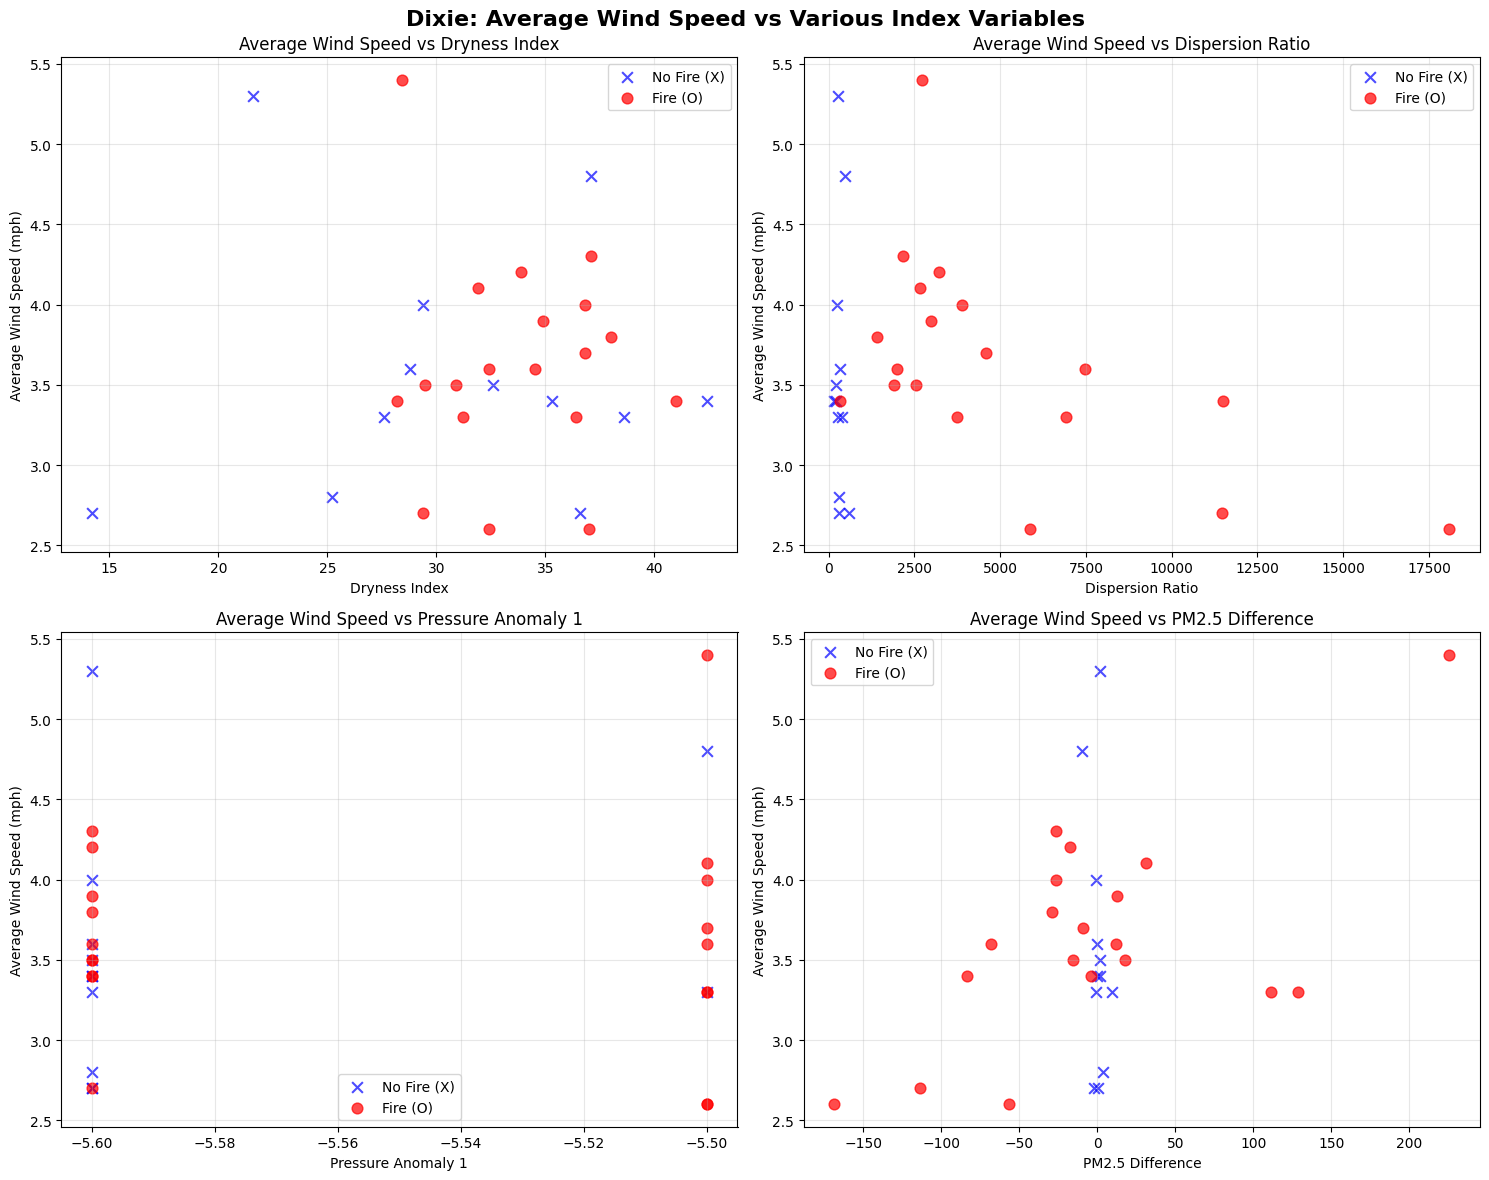

In [201]:
# Create separate scatter plots for Dixie data: Avg_Wind_Speed_mph vs each variable
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Dixie: Average Wind Speed vs Various Index Variables', fontsize=16, fontweight='bold')

print(f"Dixie Average Wind Speed data summary:")
print(f"Total records: {len(dixie)}")
print(f"No fire events: {len(dixie_no_fire)}")
print(f"Fire events: {len(dixie_fire)}")
print(f"Avg Wind Speed range: {dixie['Avg_Wind_Speed_mph'].min():.1f} mph to {dixie['Avg_Wind_Speed_mph'].max():.1f} mph")

# Plot 1: Avg_Wind_Speed_mph vs dryness_index
ax1 = axes[0, 0]
ax1.scatter(dixie_no_fire['dryness_index '], dixie_no_fire['Avg_Wind_Speed_mph'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax1.scatter(dixie_fire['dryness_index '], dixie_fire['Avg_Wind_Speed_mph'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax1.set_xlabel('Dryness Index')
ax1.set_ylabel('Average Wind Speed (mph)')
ax1.set_title('Average Wind Speed vs Dryness Index')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Avg_Wind_Speed_mph vs dispersion_ratio
ax2 = axes[0, 1]
ax2.scatter(dixie_no_fire['dispersion_ratio'], dixie_no_fire['Avg_Wind_Speed_mph'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax2.scatter(dixie_fire['dispersion_ratio'], dixie_fire['Avg_Wind_Speed_mph'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax2.set_xlabel('Dispersion Ratio')
ax2.set_ylabel('Average Wind Speed (mph)')
ax2.set_title('Average Wind Speed vs Dispersion Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Avg_Wind_Speed_mph vs PressureAnomaly1
ax3 = axes[1, 0]
ax3.scatter(dixie_no_fire['PressureAnomaly1'], dixie_no_fire['Avg_Wind_Speed_mph'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax3.scatter(dixie_fire['PressureAnomaly1'], dixie_fire['Avg_Wind_Speed_mph'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax3.set_xlabel('Pressure Anomaly 1')
ax3.set_ylabel('Average Wind Speed (mph)')
ax3.set_title('Average Wind Speed vs Pressure Anomaly 1')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Avg_Wind_Speed_mph vs pm25_difference
ax4 = axes[1, 1]
ax4.scatter(dixie_no_fire['pm25_difference'], dixie_no_fire['Avg_Wind_Speed_mph'], 
           marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
ax4.scatter(dixie_fire['pm25_difference'], dixie_fire['Avg_Wind_Speed_mph'], 
           marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')

ax4.set_xlabel('PM2.5 Difference')
ax4.set_ylabel('Average Wind Speed (mph)')
ax4.set_title('Average Wind Speed vs PM2.5 Difference')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [202]:
# Add correlation analysis and summary statistics for Dixie Average Wind Speed
print("\n=== DIXIE AVERAGE WIND SPEED CORRELATION ANALYSIS ===")
variables = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm25_difference']
for var in variables:
    corr = dixie['Avg_Wind_Speed_mph'].corr(dixie[var])
    print(f"Avg_Wind_Speed_mph vs {var.strip()}: r = {corr:.3f}")

print("\n=== FIRE vs NO-FIRE STATISTICS FOR DIXIE AVERAGE WIND SPEED ===")
print("Average Wind Speed levels:")
print(f"  No Fire - Mean: {dixie_no_fire['Avg_Wind_Speed_mph'].mean():.1f} mph, Std: {dixie_no_fire['Avg_Wind_Speed_mph'].std():.1f} mph")
print(f"  Fire    - Mean: {dixie_fire['Avg_Wind_Speed_mph'].mean():.1f} mph, Std: {dixie_fire['Avg_Wind_Speed_mph'].std():.1f} mph")

for var in variables:
    print(f"\n{var.strip()}:")
    print(f"  No Fire - Mean: {dixie_no_fire[var].mean():.2f}, Std: {dixie_no_fire[var].std():.2f}")
    print(f"  Fire    - Mean: {dixie_fire[var].mean():.2f}, Std: {dixie_fire[var].std():.2f}")

# Compare with other locations
print(f"\n=== COMPARISON: DIXIE vs OTHER LOCATIONS AVERAGE WIND SPEED ===")
print(f"Dixie Avg Wind Speed mean: {dixie['Avg_Wind_Speed_mph'].mean():.1f} mph")
print(f"Santa Rosa Avg Wind Speed mean: {santa_rosa['Avg_Wind_Speed_mph'].mean():.1f} mph")
print(f"Palisades/LA Avg Wind Speed mean: {palisades_la['Avg_Wind_Speed_mph'].mean():.1f} mph")
print(f"Paradise/Butte Avg Wind Speed mean: {paradise_butte['Avg_Wind_Speed_mph'].mean():.1f} mph")
print(f"Difference from Santa Rosa: {dixie['Avg_Wind_Speed_mph'].mean() - santa_rosa['Avg_Wind_Speed_mph'].mean():.1f} mph")
print(f"Difference from Palisades/LA: {dixie['Avg_Wind_Speed_mph'].mean() - palisades_la['Avg_Wind_Speed_mph'].mean():.1f} mph")
print(f"Difference from Paradise/Butte: {dixie['Avg_Wind_Speed_mph'].mean() - paradise_butte['Avg_Wind_Speed_mph'].mean():.1f} mph")

# Compare wind speed with other variables
print(f"\n=== COMPARISON: WIND SPEED vs OTHER VARIABLES IN DIXIE ===")
print(f"Avg_Wind_Speed vs PM2.5 correlation: {dixie['Avg_Wind_Speed_mph'].corr(dixie['PM25_ug_m3']):.3f}")
print(f"Avg_Wind_Speed vs NOx_ppb correlation: {dixie['Avg_Wind_Speed_mph'].corr(dixie['NOx_ppb']):.3f}")
print(f"Avg_Wind_Speed vs Avg_Humidity correlation: {dixie['Avg_Wind_Speed_mph'].corr(dixie['Avg_Humidity_Percent']):.3f}")
print(f"Avg_Wind_Speed vs Avg_Temp correlation: {dixie['Avg_Wind_Speed_mph'].corr(dixie['Avg_Temp_F']):.3f}")

# Show wind speed ranges for fire vs no-fire events
print(f"\n=== DIXIE AVERAGE WIND SPEED RANGES ===")
print(f"No Fire Events - Min: {dixie_no_fire['Avg_Wind_Speed_mph'].min():.1f} mph, Max: {dixie_no_fire['Avg_Wind_Speed_mph'].max():.1f} mph")
print(f"Fire Events - Min: {dixie_fire['Avg_Wind_Speed_mph'].min():.1f} mph, Max: {dixie_fire['Avg_Wind_Speed_mph'].max():.1f} mph")

# Check relationship with dispersion ratio (wind speed should increase dispersion)
print(f"\n=== WIND SPEED vs DISPERSION RELATIONSHIP IN DIXIE ===")
wind_disp_corr = dixie['Avg_Wind_Speed_mph'].corr(dixie['dispersion_ratio'])
print(f"Expected: Higher wind speed should correlate with higher dispersion ratio")
print(f"Actual correlation: {wind_disp_corr:.3f}")
if wind_disp_corr > 0:
    print("✓ As expected: Higher wind speed correlates with higher dispersion ratio")
else:
    print("⚠ Unexpected: Higher wind speed does not correlate with higher dispersion ratio")

# Compare wind speed patterns between all locations
print(f"\n=== WIND SPEED PATTERN COMPARISON ACROSS ALL LOCATIONS ===")
wind_fire_diffs = {
    'Santa Rosa': santa_rosa_fire['Avg_Wind_Speed_mph'].mean() - santa_rosa_no_fire['Avg_Wind_Speed_mph'].mean(),
    'Palisades/LA': palisades_la_fire['Avg_Wind_Speed_mph'].mean() - palisades_la_no_fire['Avg_Wind_Speed_mph'].mean(),
    'Paradise/Butte': paradise_butte_fire['Avg_Wind_Speed_mph'].mean() - paradise_butte_no_fire['Avg_Wind_Speed_mph'].mean(),
    'Dixie': dixie_fire['Avg_Wind_Speed_mph'].mean() - dixie_no_fire['Avg_Wind_Speed_mph'].mean()
}

print(f"Wind Speed fire vs no-fire differences:")
for location, diff in wind_fire_diffs.items():
    print(f"  {location}: {diff:.1f} mph")

# Check if all locations show similar patterns
all_positive = all(diff > 0 for diff in wind_fire_diffs.values())
all_negative = all(diff < 0 for diff in wind_fire_diffs.values())
if all_positive or all_negative:
    print("✓ All locations show similar wind speed fire vs no-fire patterns")
else:
    print("⚠ Locations show different wind speed fire vs no-fire patterns")

# Check which location has the most extreme wind speed difference
most_extreme_location = max(wind_fire_diffs, key=lambda x: abs(wind_fire_diffs[x]))
print(f"Most extreme wind speed fire vs no-fire difference: {most_extreme_location} ({wind_fire_diffs[most_extreme_location]:.1f} mph)")

# Check which location has the highest wind speeds during fire events
print(f"\n=== FIRE EVENT WIND SPEED COMPARISON ===")
fire_wind_means = {
    'Santa Rosa': santa_rosa_fire['Avg_Wind_Speed_mph'].mean(),
    'Palisades/LA': palisades_la_fire['Avg_Wind_Speed_mph'].mean(),
    'Paradise/Butte': paradise_butte_fire['Avg_Wind_Speed_mph'].mean(),
    'Dixie': dixie_fire['Avg_Wind_Speed_mph'].mean()
}
windiest_fire_location = max(fire_wind_means, key=fire_wind_means.get)
print(f"Windiest location during fire events: {windiest_fire_location} ({fire_wind_means[windiest_fire_location]:.1f} mph)")
print(f"Dixie fire wind speed: {fire_wind_means['Dixie']:.1f} mph")
print(f"Santa Rosa fire wind speed: {fire_wind_means['Santa Rosa']:.1f} mph")
print(f"Palisades/LA fire wind speed: {fire_wind_means['Palisades/LA']:.1f} mph")
print(f"Paradise/Butte fire wind speed: {fire_wind_means['Paradise/Butte']:.1f} mph")

# Check wind speed vs PM2.5 relationship (wind should help disperse pollutants)
print(f"\n=== WIND SPEED vs PM2.5 RELATIONSHIP IN DIXIE ===")
wind_pm25_corr = dixie['Avg_Wind_Speed_mph'].corr(dixie['PM25_ug_m3'])
print(f"Expected: Higher wind speed should correlate with lower PM2.5 (better dispersion)")
print(f"Actual correlation: {wind_pm25_corr:.3f}")
if wind_pm25_corr < 0:
    print("✓ As expected: Higher wind speed correlates with lower PM2.5")
else:
    print("⚠ Unexpected: Higher wind speed does not correlate with lower PM2.5")

# Check wind speed vs pressure anomaly relationship
print(f"\n=== WIND SPEED vs PRESSURE ANOMALY RELATIONSHIP IN DIXIE ===")
wind_press_corr = dixie['Avg_Wind_Speed_mph'].corr(dixie['PressureAnomaly1'])
print(f"Pressure anomaly vs wind speed correlation: {wind_press_corr:.3f}")
if abs(wind_press_corr) > 0.3:
    print("✓ Strong relationship between pressure anomaly and wind speed")
else:
    print("⚠ Weak relationship between pressure anomaly and wind speed")

# Check wind speed vs NOx relationship (wind should help disperse pollutants)
print(f"\n=== WIND SPEED vs NOx RELATIONSHIP IN DIXIE ===")
wind_nox_corr = dixie['Avg_Wind_Speed_mph'].corr(dixie['NOx_ppb'])
print(f"Expected: Higher wind speed should correlate with lower NOx (better dispersion)")
print(f"Actual correlation: {wind_nox_corr:.3f}")
if wind_nox_corr < 0:
    print("✓ As expected: Higher wind speed correlates with lower NOx")
else:
    print("⚠ Unexpected: Higher wind speed does not correlate with lower NOx")

# Check wind speed vs humidity relationship
print(f"\n=== WIND SPEED vs HUMIDITY RELATIONSHIP IN DIXIE ===")
wind_hum_corr = dixie['Avg_Wind_Speed_mph'].corr(dixie['Avg_Humidity_Percent'])
print(f"Wind speed vs humidity correlation: {wind_hum_corr:.3f}")
if abs(wind_hum_corr) > 0.3:
    print("✓ Strong relationship between wind speed and humidity")
else:
    print("⚠ Weak relationship between wind speed and humidity")



=== DIXIE AVERAGE WIND SPEED CORRELATION ANALYSIS ===
Avg_Wind_Speed_mph vs dryness_index: r = -0.008
Avg_Wind_Speed_mph vs dispersion_ratio: r = -0.320
Avg_Wind_Speed_mph vs PressureAnomaly1: r = 0.104
Avg_Wind_Speed_mph vs pm25_difference: r = 0.443

=== FIRE vs NO-FIRE STATISTICS FOR DIXIE AVERAGE WIND SPEED ===
Average Wind Speed levels:
  No Fire - Mean: 3.6 mph, Std: 0.8 mph
  Fire    - Mean: 3.6 mph, Std: 0.7 mph

dryness_index:
  No Fire - Mean: 30.78, Std: 7.98
  Fire    - Mean: 33.72, Std: 3.64

dispersion_ratio:
  No Fire - Mean: 314.82, Std: 117.06
  Fire    - Mean: 5026.52, Std: 4432.09

PressureAnomaly1:
  No Fire - Mean: -5.58, Std: 0.04
  Fire    - Mean: -5.55, Std: 0.05

pm25_difference:
  No Fire - Mean: 0.34, Std: 4.36
  Fire    - Mean: -4.26, Std: 88.26

=== COMPARISON: DIXIE vs OTHER LOCATIONS AVERAGE WIND SPEED ===
Dixie Avg Wind Speed mean: 3.6 mph
Santa Rosa Avg Wind Speed mean: 4.1 mph
Palisades/LA Avg Wind Speed mean: 2.6 mph
Paradise/Butte Avg Wind Speed mea

No fire data available - plotting all data points


KeyError: 'PM25_ug_m3'

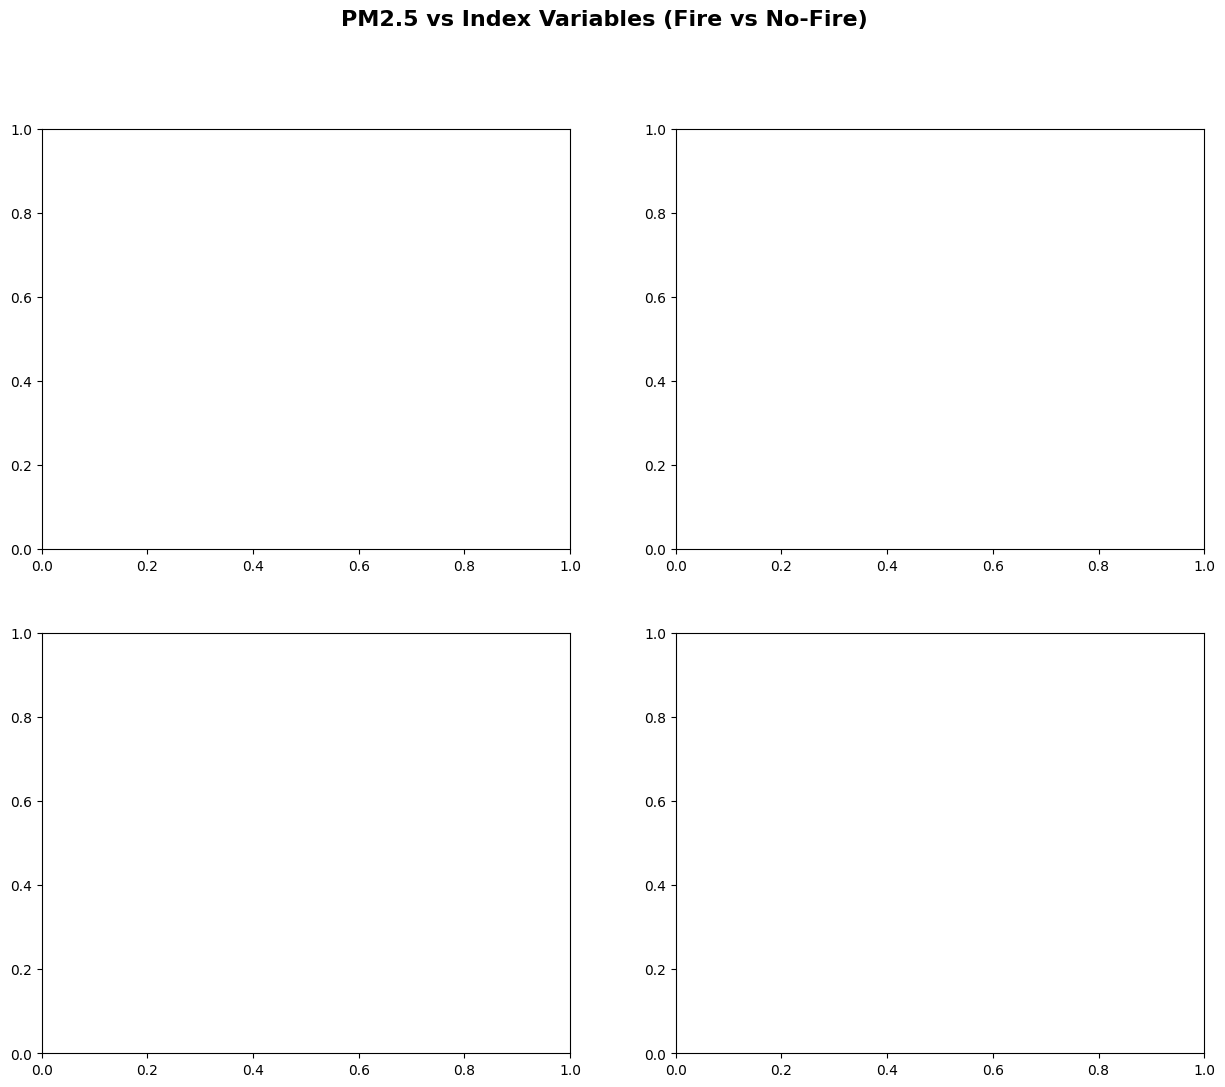

In [210]:
# Create scatter plots for PM2.5 vs index variables with fire/no-fire markers
# X = no fire (0), O = fire (1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('PM2.5 vs Index Variables (Fire vs No-Fire)', fontsize=16, fontweight='bold')

# Check if we have fire data available
if 'fire_col' in locals():
    print(f"Using fire column: {fire_col}")
    print(f"Fire events: {len(df_fire)}, No fire events: {len(df_no_fire)}")
    
    # Plot 1: PM2.5 vs dryness_index
    ax1 = axes[0, 0]
    ax1.scatter(df_no_fire['dryness_index '], df_no_fire['PM25_ug_m3'],
               marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
    ax1.scatter(df_fire['dryness_index '], df_fire['PM25_ug_m3'],
               marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')
    
    ax1.set_xlabel('Dryness Index')
    ax1.set_ylabel('PM2.5 (μg/m³)')
    ax1.set_title('PM2.5 vs Dryness Index')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: PM2.5 vs PressureAnomaly1
    ax2 = axes[0, 1]
    ax2.scatter(df_no_fire['PressureAnomaly1'], df_no_fire['PM25_ug_m3'],
               marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
    ax2.scatter(df_fire['PressureAnomaly1'], df_fire['PM25_ug_m3'],
               marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')
    
    ax2.set_xlabel('Pressure Anomaly 1')
    ax2.set_ylabel('PM2.5 (μg/m³)')
    ax2.set_title('PM2.5 vs Pressure Anomaly 1')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: PM2.5 vs dispersion_ratio
    ax3 = axes[1, 0]
    ax3.scatter(df_no_fire['dispersion_ratio'], df_no_fire['PM25_ug_m3'],
               marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
    ax3.scatter(df_fire['dispersion_ratio'], df_fire['PM25_ug_m3'],
               marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')
    
    ax3.set_xlabel('Dispersion Ratio')
    ax3.set_ylabel('PM2.5 (μg/m³)')
    ax3.set_title('PM2.5 vs Dispersion Ratio')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: PM2.5 vs pm25_difference
    ax4 = axes[1, 1]
    ax4.scatter(df_no_fire['pm25_difference'], df_no_fire['PM25_ug_m3'],
               marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
    ax4.scatter(df_fire['pm25_difference'], df_fire['PM25_ug_m3'],
               marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')
    
    ax4.set_xlabel('PM2.5 Difference')
    ax4.set_ylabel('PM2.5 (μg/m³)')
    ax4.set_title('PM2.5 vs PM2.5 Difference')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
else:
    print("No fire data available - plotting all data points")
    
    # Plot 1: PM2.5 vs dryness_index
    ax1 = axes[0, 0]
    ax1.scatter(df['dryness_index '], df['PM25_ug_m3'],
               marker='o', color='blue', s=60, alpha=0.7, label='All Data')
    
    ax1.set_xlabel('Dryness Index')
    ax1.set_ylabel('PM2.5 (μg/m³)')
    ax1.set_title('PM2.5 vs Dryness Index')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: PM2.5 vs PressureAnomaly1
    ax2 = axes[0, 1]
    ax2.scatter(df['PressureAnomaly1'], df['PM25_ug_m3'],
               marker='o', color='blue', s=60, alpha=0.7, label='All Data')
    
    ax2.set_xlabel('Pressure Anomaly 1')
    ax2.set_ylabel('PM2.5 (μg/m³)')
    ax2.set_title('PM2.5 vs Pressure Anomaly 1')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: PM2.5 vs dispersion_ratio
    ax3 = axes[1, 0]
    ax3.scatter(df['dispersion_ratio'], df['PM25_ug_m3'],
               marker='o', color='blue', s=60, alpha=0.7, label='All Data')
    
    ax3.set_xlabel('Dispersion Ratio')
    ax3.set_ylabel('PM2.5 (μg/m³)')
    ax3.set_title('PM2.5 vs Dispersion Ratio')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: PM2.5 vs pm25_difference
    ax4 = axes[1, 1]
    ax4.scatter(df['pm25_difference'], df['PM25_ug_m3'],
               marker='o', color='blue', s=60, alpha=0.7, label='All Data')
    
    ax4.set_xlabel('PM2.5 Difference')
    ax4.set_ylabel('PM2.5 (μg/m³)')
    ax4.set_title('PM2.5 vs PM2.5 Difference')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Data Visualization with Index Variables and Location Limitations

In [ ]:
# Check dataframe structure and create PM2.5 scatter plots
print("=== DATAFRAME STRUCTURE CHECK ===")
print(f"Dataframe shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Look for PM2.5 related columns
pm25_columns = [col for col in df.columns if 'pm25' in col.lower() or 'pm2.5' in col.lower()]
print(f"PM2.5 related columns: {pm25_columns}")

# Look for index variables
index_vars = ['dryness_index ', 'PressureAnomaly1', 'dispersion_ratio', 'pm25_difference']
available_index_vars = [var for var in index_vars if var in df.columns]
print(f"Available index variables: {available_index_vars}")

# Check for fire event column
fire_columns = [col for col in df.columns if 'fire' in col.lower() or 'wildfire' in col.lower()]
print(f"Fire-related columns: {fire_columns}")

if not pm25_columns:
    print("ERROR: No PM2.5 columns found!")
    print("Available columns with 'ug' or 'm3':")
    ug_columns = [col for col in df.columns if 'ug' in col.lower() or 'm3' in col.lower()]
    print(ug_columns)
else:
    pm25_col = pm25_columns[0]
    print(f"Using PM2.5 column: {pm25_col}")
    
    # Create the plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('PM2.5 vs Index Variables', fontsize=16, fontweight='bold')
    
    # Check if we have fire data
    if fire_columns:
        fire_col = fire_columns[0]
        print(f"Using fire column: {fire_col}")
        df_no_fire = df[df[fire_col] == 0]
        df_fire = df[df[fire_col] == 1]
        print(f"Fire events: {len(df_fire)}, No fire events: {len(df_no_fire)}")
        
        # Plot 1: PM2.5 vs dryness_index
        ax1 = axes[0, 0]
        ax1.scatter(df_no_fire['dryness_index '], df_no_fire[pm25_col],
                   marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
        ax1.scatter(df_fire['dryness_index '], df_fire[pm25_col],
                   marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')
        
        ax1.set_xlabel('Dryness Index')
        ax1.set_ylabel('PM2.5 (μg/m³)')
        ax1.set_title('PM2.5 vs Dryness Index')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: PM2.5 vs PressureAnomaly1
        ax2 = axes[0, 1]
        ax2.scatter(df_no_fire['PressureAnomaly1'], df_no_fire[pm25_col],
                   marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
        ax2.scatter(df_fire['PressureAnomaly1'], df_fire[pm25_col],
                   marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')
        
        ax2.set_xlabel('Pressure Anomaly 1')
        ax2.set_ylabel('PM2.5 (μg/m³)')
        ax2.set_title('PM2.5 vs Pressure Anomaly 1')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: PM2.5 vs dispersion_ratio
        ax3 = axes[1, 0]
        ax3.scatter(df_no_fire['dispersion_ratio'], df_no_fire[pm25_col],
                   marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
        ax3.scatter(df_fire['dispersion_ratio'], df_fire[pm25_col],
                   marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')
        
        ax3.set_xlabel('Dispersion Ratio')
        ax3.set_ylabel('PM2.5 (μg/m³)')
        ax3.set_title('PM2.5 vs Dispersion Ratio')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: PM2.5 vs pm25_difference
        ax4 = axes[1, 1]
        ax4.scatter(df_no_fire['pm25_difference'], df_no_fire[pm25_col],
                   marker='x', color='blue', s=60, alpha=0.7, label='No Fire (X)')
        ax4.scatter(df_fire['pm25_difference'], df_fire[pm25_col],
                   marker='o', color='red', s=60, alpha=0.7, label='Fire (O)')
        
        ax4.set_xlabel('PM2.5 Difference')
        ax4.set_ylabel('PM2.5 (μg/m³)')
        ax4.set_title('PM2.5 vs PM2.5 Difference')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
    else:
        print("No fire data available - plotting all data points")
        
        # Plot 1: PM2.5 vs dryness_index
        ax1 = axes[0, 0]
        ax1.scatter(df['dryness_index '], df[pm25_col],
                   marker='o', color='blue', s=60, alpha=0.7, label='All Data')
        
        ax1.set_xlabel('Dryness Index')
        ax1.set_ylabel('PM2.5 (μg/m³)')
        ax1.set_title('PM2.5 vs Dryness Index')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: PM2.5 vs PressureAnomaly1
        ax2 = axes[0, 1]
        ax2.scatter(df['PressureAnomaly1'], df[pm25_col],
                   marker='o', color='blue', s=60, alpha=0.7, label='All Data')
        
        ax2.set_xlabel('Pressure Anomaly 1')
        ax2.set_ylabel('PM2.5 (μg/m³)')
        ax2.set_title('PM2.5 vs Pressure Anomaly 1')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: PM2.5 vs dispersion_ratio
        ax3 = axes[1, 0]
        ax3.scatter(df['dispersion_ratio'], df[pm25_col],
                   marker='o', color='blue', s=60, alpha=0.7, label='All Data')
        
        ax3.set_xlabel('Dispersion Ratio')
        ax3.set_ylabel('PM2.5 (μg/m³)')
        ax3.set_title('PM2.5 vs Dispersion Ratio')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: PM2.5 vs pm25_difference
        ax4 = axes[1, 1]
        ax4.scatter(df['pm25_difference'], df[pm25_col],
                   marker='o', color='blue', s=60, alpha=0.7, label='All Data')
        
        ax4.set_xlabel('PM2.5 Difference')
        ax4.set_ylabel('PM2.5 (μg/m³)')
        ax4.set_title('PM2.5 vs PM2.5 Difference')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
